In [1]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import cross_val_score
import tensorflow
from tensorflow.keras.layers import Dense, GlobalAvgPool2D, InputLayer
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input as mod_preprocess
from tensorflow.keras.utils import multi_gpu_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Lambda
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
train_dir = '/home/ec2-user/SageMaker/Approach 3/train/'
test_dir = '/home/ec2-user/SageMaker/Approach 3/test/'
print(len(os.listdir(train_dir)))
print(len(os.listdir(test_dir)))

# Create a dictionary {'emotion': int value} to assign each class to a number
classes_dict = {"negative": 0, "positive": 1}
img_size = (224, 224, 3)

2
2


In [3]:
# Training, load all images as array
def preprocess_input(path):
    img_size = (224, 224, 3)
    n_train = 35104
    images = np.zeros([n_train, img_size[0], img_size[1], img_size[2]], dtype=np.uint8)
    labels = np.zeros([n_train], dtype=np.uint8)
    i = 0

    all_folders = os.listdir(path)
    print(all_folders)
    for folder in all_folders:
        print(folder)
        for file in os.listdir('/home/ec2-user/SageMaker/Approach 3/train/{}'.format(folder)):
            img_path = os.path.join(path, folder + '/', file)
            print(img_path)
            img = load_img(img_path, target_size=img_size, color_mode='rgb')
            images[i] = img
            labels[i] = classes_dict[folder]
            print(labels)
            i += 1
            print(i)

    return images, labels

In [4]:
train_images, train_labels = preprocess_input(train_dir)

['positive', 'negative']
positive
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_74897042.jpg
[1 0 0 ... 0 0 0]
1
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_27144898.jpg
[1 1 0 ... 0 0 0]
2
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_2562878.jpg
[1 1 1 ... 0 0 0]
3
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_53152280.jpg
[1 1 1 ... 0 0 0]
4
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_4751179.jpg
[1 1 1 ... 0 0 0]
5
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_34055541.jpg
[1 1 1 ... 0 0 0]
6
/home/ec2-user/SageMaker/Approach 3/train/positive/AF35HAHL_00.jpg
[1 1 1 ... 0 0 0]
7
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_39_Kid_male_happy_right_00.jpg
[1 1 1 ... 0 0 0]
8
/home/ec2-user/SageMaker/Approach 3/train/positive/AM34NES_01.jpg
[1 1 1 ... 0 0 0]
9
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_27142078.jpg
[1 1 1 ... 0 0 0]
10
/home/ec2-user/SageMaker/Approach

[1 1 1 ... 0 0 0]
89
/home/ec2-user/SageMaker/Approach 3/train/positive/AM04NEHR_02.jpg
[1 1 1 ... 0 0 0]
90
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_41610788.jpg
[1 1 1 ... 0 0 0]
91
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_67_Moroccan_male_happy_right_01.jpg
[1 1 1 ... 0 0 0]
92
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_29050965.jpg
[1 1 1 ... 0 0 0]
93
/home/ec2-user/SageMaker/Approach 3/train/positive/BM04NEHR_00.jpg
[1 1 1 ... 0 0 0]
94
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_71652242.jpg
[1 1 1 ... 0 0 0]
95
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_52589967.jpg
[1 1 1 ... 0 0 0]
96
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_35_Moroccan_male_neutral_left_01.jpg
[1 1 1 ... 0 0 0]
97
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_23_Caucasian_male_neutral_right_01.jpg
[1 1 1 ... 0 0 0]
98
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_73379433.jpg
[1

[1 1 1 ... 0 0 0]
175
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_27693309.jpg
[1 1 1 ... 0 0 0]
176
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_55_Moroccan_male_happy_left.jpg
[1 1 1 ... 0 0 0]
177
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_22_Caucasian_female_happy_frontal_01.jpg
[1 1 1 ... 0 0 0]
178
/home/ec2-user/SageMaker/Approach 3/train/positive/AF09NES_02.jpg
[1 1 1 ... 0 0 0]
179
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_57_Caucasian_female_happy_left.jpg
[1 1 1 ... 0 0 0]
180
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_52401239.jpg
[1 1 1 ... 0 0 0]
181
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_68367519.jpg
[1 1 1 ... 0 0 0]
182
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_30317702.jpg
[1 1 1 ... 0 0 0]
183
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_39_Kid_male_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
184
/home/ec2-user/SageMaker/Approach 3/train/pos

[1 1 1 ... 0 0 0]
262
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_42294990.jpg
[1 1 1 ... 0 0 0]
263
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_31424340.jpg
[1 1 1 ... 0 0 0]
264
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_32984457.jpg
[1 1 1 ... 0 0 0]
265
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_32783475.jpg
[1 1 1 ... 0 0 0]
266
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_41_Kid_female_neutral_left_00.jpg
[1 1 1 ... 0 0 0]
267
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_64_Kid_female_neutral_frontal_01.jpg
[1 1 1 ... 0 0 0]
268
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_14669195.jpg
[1 1 1 ... 0 0 0]
269
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_27_Caucasian_female_neutral_left_00.jpg
[1 1 1 ... 0 0 0]
270
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_98667765.jpg
[1 1 1 ... 0 0 0]
271
/home/ec2-user/SageMaker/Approach 3/train/positive/Tra

[1 1 1 ... 0 0 0]
359
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_13991207.jpg
[1 1 1 ... 0 0 0]
360
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_73780202.jpg
[1 1 1 ... 0 0 0]
361
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_86722235.jpg
[1 1 1 ... 0 0 0]
362
/home/ec2-user/SageMaker/Approach 3/train/positive/AF20HAHL_01.jpg
[1 1 1 ... 0 0 0]
363
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_40636222.jpg
[1 1 1 ... 0 0 0]
364
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_49944562.jpg
[1 1 1 ... 0 0 0]
365
/home/ec2-user/SageMaker/Approach 3/train/positive/BM18HAHL_00.jpg
[1 1 1 ... 0 0 0]
366
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_68_Moroccan_male_neutral_frontal_00.jpg
[1 1 1 ... 0 0 0]
367
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AF02NES.png
[1 1 1 ... 0 0 0]
368
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_7845176.jpg
[1 1 1 ... 0 0 0]
369
/home/ec

[1 1 1 ... 0 0 0]
454
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_65873012.jpg
[1 1 1 ... 0 0 0]
455
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_9721375.jpg
[1 1 1 ... 0 0 0]
456
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_85112475.jpg
[1 1 1 ... 0 0 0]
457
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_30831908.jpg
[1 1 1 ... 0 0 0]
458
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_13938543.jpg
[1 1 1 ... 0 0 0]
459
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_9301495.jpg
[1 1 1 ... 0 0 0]
460
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_69151239.jpg
[1 1 1 ... 0 0 0]
461
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_20467815.jpg
[1 1 1 ... 0 0 0]
462
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_47904010.jpg
[1 1 1 ... 0 0 0]
463
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_4250285.jpg
[1 1 1 ... 0 0 0]
464
/home/ec2-user/SageMaker/Approa

[1 1 1 ... 0 0 0]
538
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_6342271.jpg
[1 1 1 ... 0 0 0]
539
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_10724979.jpg
[1 1 1 ... 0 0 0]
540
/home/ec2-user/SageMaker/Approach 3/train/positive/AM07NES_02.jpg
[1 1 1 ... 0 0 0]
541
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_53_Moroccan_male_happy_left.jpg
[1 1 1 ... 0 0 0]
542
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_52_Moroccan_male_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
543
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_34931272.jpg
[1 1 1 ... 0 0 0]
544
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_58990550.jpg
[1 1 1 ... 0 0 0]
545
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_4359760.jpg
[1 1 1 ... 0 0 0]
546
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_94135970.jpg
[1 1 1 ... 0 0 0]
547
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_80793693.jpg
[1 1 1 ... 0 0 0]


[1 1 1 ... 0 0 0]
623
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_98737978.jpg
[1 1 1 ... 0 0 0]
624
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_50_Moroccan_male_happy_right_00.jpg
[1 1 1 ... 0 0 0]
625
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_47_Caucasian_male_happy_left_01.jpg
[1 1 1 ... 0 0 0]
626
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_25152762.jpg
[1 1 1 ... 0 0 0]
627
/home/ec2-user/SageMaker/Approach 3/train/positive/AF23HAHR_00.jpg
[1 1 1 ... 0 0 0]
628
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_55_Moroccan_male_neutral_left_00.jpg
[1 1 1 ... 0 0 0]
629
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_09_Caucasian_male_happy_frontal.jpg
[1 1 1 ... 0 0 0]
630
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_71_Caucasian_male_happy_right.jpg
[1 1 1 ... 0 0 0]
631
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_54598522.jpg
[1 1 1 ... 0 0 0]
632
/home/ec2-user/SageM

[1 1 1 ... 0 0 0]
711
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_35_Moroccan_male_neutral_right_01.jpg
[1 1 1 ... 0 0 0]
712
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_61315716.jpg
[1 1 1 ... 0 0 0]
713
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_08_Caucasian_female_neutral_right.jpg
[1 1 1 ... 0 0 0]
714
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_14632348.jpg
[1 1 1 ... 0 0 0]
715
/home/ec2-user/SageMaker/Approach 3/train/positive/AF28HAS_00.jpg
[1 1 1 ... 0 0 0]
716
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_96098997.jpg
[1 1 1 ... 0 0 0]
717
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_81687060.jpg
[1 1 1 ... 0 0 0]
718
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_39228027.jpg
[1 1 1 ... 0 0 0]
719
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_12_Caucasian_female_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
720
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd

[1 1 1 ... 0 0 0]
810
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_02_Caucasian_female_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
811
/home/ec2-user/SageMaker/Approach 3/train/positive/KM.NE2.2.tiff
[1 1 1 ... 0 0 0]
812
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_66315621.jpg
[1 1 1 ... 0 0 0]
813
/home/ec2-user/SageMaker/Approach 3/train/positive/BM16NES_02.jpg
[1 1 1 ... 0 0 0]
814
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_3462837.jpg
[1 1 1 ... 0 0 0]
815
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_32823741.jpg
[1 1 1 ... 0 0 0]
816
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_83572162.jpg
[1 1 1 ... 0 0 0]
817
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_18446154.jpg
[1 1 1 ... 0 0 0]
818
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_50_Moroccan_male_happy_right.jpg
[1 1 1 ... 0 0 0]
819
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_18957136.jpg
[1 1 1 ... 0 0 0]
820

[1 1 1 ... 0 0 0]
920
/home/ec2-user/SageMaker/Approach 3/train/positive/AF10HAHR_01.jpg
[1 1 1 ... 0 0 0]
921
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_37_Caucasian_female_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
922
/home/ec2-user/SageMaker/Approach 3/train/positive/AF26NEHL_02.jpg
[1 1 1 ... 0 0 0]
923
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_34183408.jpg
[1 1 1 ... 0 0 0]
924
/home/ec2-user/SageMaker/Approach 3/train/positive/AM26HAHR_01.jpg
[1 1 1 ... 0 0 0]
925
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_3377136.jpg
[1 1 1 ... 0 0 0]
926
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_69874790.jpg
[1 1 1 ... 0 0 0]
927
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_59258851.jpg
[1 1 1 ... 0 0 0]
928
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_60859368.jpg
[1 1 1 ... 0 0 0]
929
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_90754340.jpg
[1 1 1 ... 0 0 0]
930
/home/ec2-user/SageM

[1 1 1 ... 0 0 0]
1018
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_64_Kid_female_happy_frontal.jpg
[1 1 1 ... 0 0 0]
1019
/home/ec2-user/SageMaker/Approach 3/train/positive/BF02NES_01.jpg
[1 1 1 ... 0 0 0]
1020
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_94500840.jpg
[1 1 1 ... 0 0 0]
1021
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_97472978.jpg
[1 1 1 ... 0 0 0]
1022
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_25352630.jpg
[1 1 1 ... 0 0 0]
1023
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_04_Caucasian_female_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
1024
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_15784986.jpg
[1 1 1 ... 0 0 0]
1025
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_68_Moroccan_male_neutral_frontal_00.jpg
[1 1 1 ... 0 0 0]
1026
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_37714635.jpg
[1 1 1 ... 0 0 0]
1027
/home/ec2-user/SageMaker/Approach 3/train/positive

[1 1 1 ... 0 0 0]
1114
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_60360877.jpg
[1 1 1 ... 0 0 0]
1115
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_42675066.jpg
[1 1 1 ... 0 0 0]
1116
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_46447165.jpg
[1 1 1 ... 0 0 0]
1117
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_37_Caucasian_female_neutral_left.jpg
[1 1 1 ... 0 0 0]
1118
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_04_Caucasian_female_neutral_frontal_02.jpg
[1 1 1 ... 0 0 0]
1119
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_52677215.jpg
[1 1 1 ... 0 0 0]
1120
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_37475756.jpg
[1 1 1 ... 0 0 0]
1121
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_11_Kid_female_neutral_frontal_02.jpg
[1 1 1 ... 0 0 0]
1122
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_17767061.jpg
[1 1 1 ... 0 0 0]
1123
/home/ec2-user/SageMaker/Approach 3/tr

[1 1 1 ... 0 0 0]
1207
/home/ec2-user/SageMaker/Approach 3/train/positive/BM18NES.JPG
[1 1 1 ... 0 0 0]
1208
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_27127398.jpg
[1 1 1 ... 0 0 0]
1209
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_92445906.jpg
[1 1 1 ... 0 0 0]
1210
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_95553390.jpg
[1 1 1 ... 0 0 0]
1211
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_50_Moroccan_male_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
1212
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_65773221.jpg
[1 1 1 ... 0 0 0]
1213
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_177442.jpg
[1 1 1 ... 0 0 0]
1214
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_05_Caucasian_male_happy_left_00.jpg
[1 1 1 ... 0 0 0]
1215
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_96135041.jpg
[1 1 1 ... 0 0 0]
1216
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_73722737.jpg
[1 1 1 

[1 1 1 ... 0 0 0]
1288
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_72133442.jpg
[1 1 1 ... 0 0 0]
1289
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_2429948.jpg
[1 1 1 ... 0 0 0]
1290
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_09_Caucasian_male_neutral_left.jpg
[1 1 1 ... 0 0 0]
1291
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_20116337.jpg
[1 1 1 ... 0 0 0]
1292
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AF16HAS_01.jpg
[1 1 1 ... 0 0 0]
1293
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_48423300.jpg
[1 1 1 ... 0 0 0]
1294
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_22_Caucasian_female_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
1295
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_49862858.jpg
[1 1 1 ... 0 0 0]
1296
/home/ec2-user/SageMaker/Approach 3/train/positive/AM05HAHL_00.jpg
[1 1 1 ... 0 0 0]
1297
/home/ec2-user/SageMaker/Approach 3/train/positive/AM16

[1 1 1 ... 0 0 0]
1406
/home/ec2-user/SageMaker/Approach 3/train/positive/BM24HAHL.JPG
[1 1 1 ... 0 0 0]
1407
/home/ec2-user/SageMaker/Approach 3/train/positive/BF21HAS_00.jpg
[1 1 1 ... 0 0 0]
1408
/home/ec2-user/SageMaker/Approach 3/train/positive/BF10NES_00.jpg
[1 1 1 ... 0 0 0]
1409
/home/ec2-user/SageMaker/Approach 3/train/positive/AF30HAHR_00.jpg
[1 1 1 ... 0 0 0]
1410
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_61_Caucasian_female_happy_right_01.jpg
[1 1 1 ... 0 0 0]
1411
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_95271707.jpg
[1 1 1 ... 0 0 0]
1412
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_71178158.jpg
[1 1 1 ... 0 0 0]
1413
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_25026673.jpg
[1 1 1 ... 0 0 0]
1414
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_23483610.jpg
[1 1 1 ... 0 0 0]
1415
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_69823677.jpg
[1 1 1 ... 0 0 0]
1416
/home/ec2-user/SageMa

[1 1 1 ... 0 0 0]
1489
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_93001555.jpg
[1 1 1 ... 0 0 0]
1490
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_04_Caucasian_female_neutral_left_01.jpg
[1 1 1 ... 0 0 0]
1491
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_2189524.jpg
[1 1 1 ... 0 0 0]
1492
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_41803027.jpg
[1 1 1 ... 0 0 0]
1493
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_68_Moroccan_male_neutral_right.jpg
[1 1 1 ... 0 0 0]
1494
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_16474445.jpg
[1 1 1 ... 0 0 0]
1495
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_29_Moroccan_male_happy_left_01.jpg
[1 1 1 ... 0 0 0]
1496
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_59_Moroccan_male_happy_left_00.jpg
[1 1 1 ... 0 0 0]
1497
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_42_Kid_male_neutral_left_01.jpg
[1 1 1 ... 0 0 0]
1498
/home/e

[1 1 1 ... 0 0 0]
1595
/home/ec2-user/SageMaker/Approach 3/train/positive/BM08HAHR_01.jpg
[1 1 1 ... 0 0 0]
1596
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_51702421.jpg
[1 1 1 ... 0 0 0]
1597
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_4791031.jpg
[1 1 1 ... 0 0 0]
1598
/home/ec2-user/SageMaker/Approach 3/train/positive/BM28HAHR_01.jpg
[1 1 1 ... 0 0 0]
1599
/home/ec2-user/SageMaker/Approach 3/train/positive/BF07HAHR_01.jpg
[1 1 1 ... 0 0 0]
1600
/home/ec2-user/SageMaker/Approach 3/train/positive/BF31NEHL_02.jpg
[1 1 1 ... 0 0 0]
1601
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_27305805.jpg
[1 1 1 ... 0 0 0]
1602
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_53367585.jpg
[1 1 1 ... 0 0 0]
1603
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_96154938.jpg
[1 1 1 ... 0 0 0]
1604
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_33014365.jpg
[1 1 1 ... 0 0 0]
1605
/home/ec2-user/SageMaker/Approach 3/train/

[1 1 1 ... 0 0 0]
1697
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_45_Moroccan_male_happy_frontal_01.jpg
[1 1 1 ... 0 0 0]
1698
/home/ec2-user/SageMaker/Approach 3/train/positive/BM33NES.JPG
[1 1 1 ... 0 0 0]
1699
/home/ec2-user/SageMaker/Approach 3/train/positive/BF26NEHR_00.jpg
[1 1 1 ... 0 0 0]
1700
/home/ec2-user/SageMaker/Approach 3/train/positive/AF04HAS.JPG
[1 1 1 ... 0 0 0]
1701
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_34692743.jpg
[1 1 1 ... 0 0 0]
1702
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_33948195.jpg
[1 1 1 ... 0 0 0]
1703
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_59075460.jpg
[1 1 1 ... 0 0 0]
1704
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_52_Moroccan_male_happy_left.jpg
[1 1 1 ... 0 0 0]
1705
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AM08HAS_00.jpg
[1 1 1 ... 0 0 0]
1706
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_2300493.jpg
[1 1 1 ... 0 0 

[1 1 1 ... 0 0 0]
1807
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_20984273.jpg
[1 1 1 ... 0 0 0]
1808
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_46_Caucasian_male_neutral_left.jpg
[1 1 1 ... 0 0 0]
1809
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_18878169.jpg
[1 1 1 ... 0 0 0]
1810
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_50_Moroccan_male_neutral_frontal_01.jpg
[1 1 1 ... 0 0 0]
1811
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_27629227.jpg
[1 1 1 ... 0 0 0]
1812
/home/ec2-user/SageMaker/Approach 3/train/positive/AM25HAHR.JPG
[1 1 1 ... 0 0 0]
1813
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_52865080.jpg
[1 1 1 ... 0 0 0]
1814
/home/ec2-user/SageMaker/Approach 3/train/positive/BF02HAHR.JPG
[1 1 1 ... 0 0 0]
1815
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_76466865.jpg
[1 1 1 ... 0 0 0]
1816
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_74206769.jpg
[1 1 1 ... 

[1 1 1 ... 0 0 0]
1914
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_25936437.jpg
[1 1 1 ... 0 0 0]
1915
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_61139095.jpg
[1 1 1 ... 0 0 0]
1916
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_53930344.jpg
[1 1 1 ... 0 0 0]
1917
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_72_Moroccan_male_neutral_frontal.jpg
[1 1 1 ... 0 0 0]
1918
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_70_Moroccan_male_happy_right_00.jpg
[1 1 1 ... 0 0 0]
1919
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_26062580.jpg
[1 1 1 ... 0 0 0]
1920
/home/ec2-user/SageMaker/Approach 3/train/positive/BF24NEHL_02.jpg
[1 1 1 ... 0 0 0]
1921
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_13786819.jpg
[1 1 1 ... 0 0 0]
1922
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_22_Caucasian_female_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
1923
/home/ec2-user/SageMaker/Approach 3/train/positi

[1 1 1 ... 0 0 0]
1999
/home/ec2-user/SageMaker/Approach 3/train/positive/BM02HAS_00.jpg
[1 1 1 ... 0 0 0]
2000
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_51_Moroccan_male_happy_right_01.jpg
[1 1 1 ... 0 0 0]
2001
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_11_Kid_female_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
2002
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_53596713.jpg
[1 1 1 ... 0 0 0]
2003
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_12_Caucasian_female_happy_left_00.jpg
[1 1 1 ... 0 0 0]
2004
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_58218094.jpg
[1 1 1 ... 0 0 0]
2005
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_96791074.jpg
[1 1 1 ... 0 0 0]
2006
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_49139625.jpg
[1 1 1 ... 0 0 0]
2007
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_84717927.jpg
[1 1 1 ... 0 0 0]
2008
/home/ec2-user/SageMaker/Approach 3/train/positive/Tra

[1 1 1 ... 0 0 0]
2100
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_84583555.jpg
[1 1 1 ... 0 0 0]
2101
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_59592892.jpg
[1 1 1 ... 0 0 0]
2102
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_72_Moroccan_male_neutral_left_01.jpg
[1 1 1 ... 0 0 0]
2103
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_88377969.jpg
[1 1 1 ... 0 0 0]
2104
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_95315789.jpg
[1 1 1 ... 0 0 0]
2105
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_12807736.jpg
[1 1 1 ... 0 0 0]
2106
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_65_Kid_female_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
2107
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_5571867.jpg
[1 1 1 ... 0 0 0]
2108
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_19776310.jpg
[1 1 1 ... 0 0 0]
2109
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_6949915.jp

[1 1 1 ... 0 0 0]
2192
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_67491344.jpg
[1 1 1 ... 0 0 0]
2193
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_19025151.jpg
[1 1 1 ... 0 0 0]
2194
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_31404890.jpg
[1 1 1 ... 0 0 0]
2195
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_48_Moroccan_male_neutral_right_01.jpg
[1 1 1 ... 0 0 0]
2196
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_4909520.jpg
[1 1 1 ... 0 0 0]
2197
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_7255559.jpg
[1 1 1 ... 0 0 0]
2198
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_1902224.jpg
[1 1 1 ... 0 0 0]
2199
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AF11HAS_01.jpg
[1 1 1 ... 0 0 0]
2200
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_2354823.jpg
[1 1 1 ... 0 0 0]
2201
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_6579496.jpg
[1 1 1 ... 

[1 1 1 ... 0 0 0]
2305
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_17117229.jpg
[1 1 1 ... 0 0 0]
2306
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_74602644.jpg
[1 1 1 ... 0 0 0]
2307
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_54_Moroccan_male_happy_right_01.jpg
[1 1 1 ... 0 0 0]
2308
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_19_Caucasian_female_happy_right_01.jpg
[1 1 1 ... 0 0 0]
2309
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_90068837.jpg
[1 1 1 ... 0 0 0]
2310
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_70_Moroccan_male_happy_right.jpg
[1 1 1 ... 0 0 0]
2311
/home/ec2-user/SageMaker/Approach 3/train/positive/AM14NES_00.jpg
[1 1 1 ... 0 0 0]
2312
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_89401036.jpg
[1 1 1 ... 0 0 0]
2313
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_69239359.jpg
[1 1 1 ... 0 0 0]
2314
/home/ec2-user/SageMaker/Approach 3/train/positive/BM1

[1 1 1 ... 0 0 0]
2421
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AM33HAS_01.jpg
[1 1 1 ... 0 0 0]
2422
/home/ec2-user/SageMaker/Approach 3/train/positive/BF06NES_02.jpg
[1 1 1 ... 0 0 0]
2423
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_20868440.jpg
[1 1 1 ... 0 0 0]
2424
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_43711045.jpg
[1 1 1 ... 0 0 0]
2425
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_52757876.jpg
[1 1 1 ... 0 0 0]
2426
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_81940259.jpg
[1 1 1 ... 0 0 0]
2427
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_50_Moroccan_male_neutral_left_00.jpg
[1 1 1 ... 0 0 0]
2428
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_18_Caucasian_female_neutral_frontal_00.jpg
[1 1 1 ... 0 0 0]
2429
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_70380548.jpg
[1 1 1 ... 0 0 0]
2430
/home/ec2-user/SageMaker/Approach 3/train/positive/

[1 1 1 ... 0 0 0]
2512
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_97056113.jpg
[1 1 1 ... 0 0 0]
2513
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_79020100.jpg
[1 1 1 ... 0 0 0]
2514
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_27995804.jpg
[1 1 1 ... 0 0 0]
2515
/home/ec2-user/SageMaker/Approach 3/train/positive/BF09NEHL_01.jpg
[1 1 1 ... 0 0 0]
2516
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_31106034.jpg
[1 1 1 ... 0 0 0]
2517
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_91620838.jpg
[1 1 1 ... 0 0 0]
2518
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_33191899.jpg
[1 1 1 ... 0 0 0]
2519
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_74905009.jpg
[1 1 1 ... 0 0 0]
2520
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_41_Kid_female_happy_right_01.jpg
[1 1 1 ... 0 0 0]
2521
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_16_Caucasian_female_neutral_left.jpg
[1 1

[1 1 1 ... 0 0 0]
2602
/home/ec2-user/SageMaker/Approach 3/train/positive/faces_11.5_01.jpg
[1 1 1 ... 0 0 0]
2603
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_49665841.jpg
[1 1 1 ... 0 0 0]
2604
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_52_Moroccan_male_happy_left_01.jpg
[1 1 1 ... 0 0 0]
2605
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_54_Moroccan_male_neutral_frontal_02.jpg
[1 1 1 ... 0 0 0]
2606
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_39_Kid_male_neutral_left_00.jpg
[1 1 1 ... 0 0 0]
2607
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_08_Caucasian_female_neutral_frontal_00.jpg
[1 1 1 ... 0 0 0]
2608
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_27399734.jpg
[1 1 1 ... 0 0 0]
2609
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_59548788.jpg
[1 1 1 ... 0 0 0]
2610
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_74733934.jpg
[1 1 1 ... 0 0 0]
2611
/home/ec2-user/SageMake

[1 1 1 ... 0 0 0]
2689
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_45300648.jpg
[1 1 1 ... 0 0 0]
2690
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_15899649.jpg
[1 1 1 ... 0 0 0]
2691
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_62060201.jpg
[1 1 1 ... 0 0 0]
2692
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_41_Kid_female_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
2693
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_69_Moroccan_male_neutral_right_01.jpg
[1 1 1 ... 0 0 0]
2694
/home/ec2-user/SageMaker/Approach 3/train/positive/BF13HAHR_00.jpg
[1 1 1 ... 0 0 0]
2695
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_47629240.jpg
[1 1 1 ... 0 0 0]
2696
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_61_Caucasian_female_happy_right_01.jpg
[1 1 1 ... 0 0 0]
2697
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_66562900.jpg
[1 1 1 ... 0 0 0]
2698
/home/ec2-user/SageMaker/Approach 3/train/positiv

[1 1 1 ... 0 0 0]
2777
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_29558899.jpg
[1 1 1 ... 0 0 0]
2778
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_48_Moroccan_male_happy_right_01.jpg
[1 1 1 ... 0 0 0]
2779
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_84370387.jpg
[1 1 1 ... 0 0 0]
2780
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_64_Kid_female_neutral_right_01.jpg
[1 1 1 ... 0 0 0]
2781
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_22_Caucasian_female_happy_left.jpg
[1 1 1 ... 0 0 0]
2782
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_74521396.jpg
[1 1 1 ... 0 0 0]
2783
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_98747736.jpg
[1 1 1 ... 0 0 0]
2784
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AF01NES_01.jpg
[1 1 1 ... 0 0 0]
2785
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_11_Kid_female_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
2786
/home/ec2-u

[1 1 1 ... 0 0 0]
2895
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_91516775.jpg
[1 1 1 ... 0 0 0]
2896
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AF05HAS_01.jpg
[1 1 1 ... 0 0 0]
2897
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_44_Kid_female_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
2898
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_57358376.jpg
[1 1 1 ... 0 0 0]
2899
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_81027158.jpg
[1 1 1 ... 0 0 0]
2900
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_48099868.jpg
[1 1 1 ... 0 0 0]
2901
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_3740746.jpg
[1 1 1 ... 0 0 0]
2902
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_70_Moroccan_male_neutral_left.jpg
[1 1 1 ... 0 0 0]
2903
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_1548283.jpg
[1 1 1 ... 0 0 0]
2904
/home/ec2-user/SageMaker/Approach 3/train/positive/BM24NES_01.jp

[1 1 1 ... 0 0 0]
2995
/home/ec2-user/SageMaker/Approach 3/train/positive/AF21HAHL_00.jpg
[1 1 1 ... 0 0 0]
2996
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_99010157.jpg
[1 1 1 ... 0 0 0]
2997
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_3388061.jpg
[1 1 1 ... 0 0 0]
2998
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_23492257.jpg
[1 1 1 ... 0 0 0]
2999
/home/ec2-user/SageMaker/Approach 3/train/positive/AM02NEHL_00.jpg
[1 1 1 ... 0 0 0]
3000
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_29250647.jpg
[1 1 1 ... 0 0 0]
3001
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_69_Moroccan_male_happy_left.jpg
[1 1 1 ... 0 0 0]
3002
/home/ec2-user/SageMaker/Approach 3/train/positive/BM16HAHR_01.jpg
[1 1 1 ... 0 0 0]
3003
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_8095694.jpg
[1 1 1 ... 0 0 0]
3004
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_20987350.jpg
[1 1 1 ... 0 0 0]
3005
/home/ec2-user/Sage

[1 1 1 ... 0 0 0]
3108
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_24306769.jpg
[1 1 1 ... 0 0 0]
3109
/home/ec2-user/SageMaker/Approach 3/train/positive/AM17NEHL_01.jpg
[1 1 1 ... 0 0 0]
3110
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_11779317.jpg
[1 1 1 ... 0 0 0]
3111
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_37_Caucasian_female_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
3112
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_53357922.jpg
[1 1 1 ... 0 0 0]
3113
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_17042478.jpg
[1 1 1 ... 0 0 0]
3114
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_99770266.jpg
[1 1 1 ... 0 0 0]
3115
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_69465382.jpg
[1 1 1 ... 0 0 0]
3116
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_71_Caucasian_male_neutral_frontal_00.jpg
[1 1 1 ... 0 0 0]
3117
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_345916

[1 1 1 ... 0 0 0]
3212
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_60_Moroccan_male_neutral_right.jpg
[1 1 1 ... 0 0 0]
3213
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_91691460.jpg
[1 1 1 ... 0 0 0]
3214
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_55142607.jpg
[1 1 1 ... 0 0 0]
3215
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AM18HAS_01.jpg
[1 1 1 ... 0 0 0]
3216
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_56715423.jpg
[1 1 1 ... 0 0 0]
3217
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_22868101.jpg
[1 1 1 ... 0 0 0]
3218
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_46_Caucasian_male_happy_right_01.jpg
[1 1 1 ... 0 0 0]
3219
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_30195180.jpg
[1 1 1 ... 0 0 0]
3220
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_53200410.jpg
[1 1 1 ... 0 0 0]
3221
/home/ec2-user/SageMaker/Approach 3/train/positive/T

[1 1 1 ... 0 0 0]
3372
/home/ec2-user/SageMaker/Approach 3/train/positive/AF28NEHL_02.jpg
[1 1 1 ... 0 0 0]
3373
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_32097744.jpg
[1 1 1 ... 0 0 0]
3374
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_39_Kid_male_neutral_frontal_00.jpg
[1 1 1 ... 0 0 0]
3375
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AF29HAS_01.jpg
[1 1 1 ... 0 0 0]
3376
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_41499078.jpg
[1 1 1 ... 0 0 0]
3377
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AF19HAS_01.jpg
[1 1 1 ... 0 0 0]
3378
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_30746538.jpg
[1 1 1 ... 0 0 0]
3379
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_46109882.jpg
[1 1 1 ... 0 0 0]
3380
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_28_Caucasian_male_neutral_frontal.jpg
[1 1 1 ... 0 0 0]
3381
/home/ec2-user/SageMaker/Approach 3/train/posit

[1 1 1 ... 0 0 0]
3496
/home/ec2-user/SageMaker/Approach 3/train/positive/BM21NES_02.jpg
[1 1 1 ... 0 0 0]
3497
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_11_Kid_female_happy_right_01.jpg
[1 1 1 ... 0 0 0]
3498
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_21743231.jpg
[1 1 1 ... 0 0 0]
3499
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_29_Moroccan_male_happy_frontal_00.jpg
[1 1 1 ... 0 0 0]
3500
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_28_Caucasian_male_neutral_left_01.jpg
[1 1 1 ... 0 0 0]
3501
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_93571817.jpg
[1 1 1 ... 0 0 0]
3502
/home/ec2-user/SageMaker/Approach 3/train/positive/AF15HAHR.JPG
[1 1 1 ... 0 0 0]
3503
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_55_Moroccan_male_neutral_frontal_00.jpg
[1 1 1 ... 0 0 0]
3504
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_16_Caucasian_female_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
3505
/home/ec2-

[1 1 1 ... 0 0 0]
3579
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_58397391.jpg
[1 1 1 ... 0 0 0]
3580
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_01_Caucasian_female_happy_frontal.jpg
[1 1 1 ... 0 0 0]
3581
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_89245845.jpg
[1 1 1 ... 0 0 0]
3582
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_12_Caucasian_female_happy_frontal.jpg
[1 1 1 ... 0 0 0]
3583
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_08_Caucasian_female_happy_right_01.jpg
[1 1 1 ... 0 0 0]
3584
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_78450616.jpg
[1 1 1 ... 0 0 0]
3585
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_53_Moroccan_male_neutral_right_01.jpg
[1 1 1 ... 0 0 0]
3586
/home/ec2-user/SageMaker/Approach 3/train/positive/BF03HAHR_00.jpg
[1 1 1 ... 0 0 0]
3587
/home/ec2-user/SageMaker/Approach 3/train/positive/BF13NES_01.jpg
[1 1 1 ... 0 0 0]
3588
/home/ec2-user/SageMaker/Appr

[1 1 1 ... 0 0 0]
3663
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_91954512.jpg
[1 1 1 ... 0 0 0]
3664
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_48718744.jpg
[1 1 1 ... 0 0 0]
3665
/home/ec2-user/SageMaker/Approach 3/train/positive/AM13NES_01.jpg
[1 1 1 ... 0 0 0]
3666
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_54266927.jpg
[1 1 1 ... 0 0 0]
3667
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_55821603.jpg
[1 1 1 ... 0 0 0]
3668
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_4688703.jpg
[1 1 1 ... 0 0 0]
3669
/home/ec2-user/SageMaker/Approach 3/train/positive/AM23NES_01.jpg
[1 1 1 ... 0 0 0]
3670
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_19266558.jpg
[1 1 1 ... 0 0 0]
3671
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_36358880.jpg
[1 1 1 ... 0 0 0]
3672
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_72_Moroccan_male_happy_frontal.jpg
[1 1 1 ... 0 0 0]
3673
/home/ec2-u

[1 1 1 ... 0 0 0]
3812
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_46_Caucasian_male_neutral_right_02.jpg
[1 1 1 ... 0 0 0]
3813
/home/ec2-user/SageMaker/Approach 3/train/positive/BM34NES_00.jpg
[1 1 1 ... 0 0 0]
3814
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_18_Caucasian_female_happy_frontal.jpg
[1 1 1 ... 0 0 0]
3815
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_51877343.jpg
[1 1 1 ... 0 0 0]
3816
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_61999969.jpg
[1 1 1 ... 0 0 0]
3817
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_77499770.jpg
[1 1 1 ... 0 0 0]
3818
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AF08HAS.png
[1 1 1 ... 0 0 0]
3819
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_5243164.jpg
[1 1 1 ... 0 0 0]
3820
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_73554901.jpg
[1 1 1 ... 0 0 0]
3821
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_43203

[1 1 1 ... 0 0 0]
3921
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_20516208.jpg
[1 1 1 ... 0 0 0]
3922
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_50_Moroccan_male_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
3923
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_68479926.jpg
[1 1 1 ... 0 0 0]
3924
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_98537713.jpg
[1 1 1 ... 0 0 0]
3925
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_94534277.jpg
[1 1 1 ... 0 0 0]
3926
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_64288003.jpg
[1 1 1 ... 0 0 0]
3927
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_26491919.jpg
[1 1 1 ... 0 0 0]
3928
/home/ec2-user/SageMaker/Approach 3/train/positive/BM20NEHL_02.jpg
[1 1 1 ... 0 0 0]
3929
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_6561528.jpg
[1 1 1 ... 0 0 0]
3930
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_99304156.jpg
[1 1 1 ... 0 0 0]
3931


[1 1 1 ... 0 0 0]
4033
/home/ec2-user/SageMaker/Approach 3/train/positive/BM25NEHL_00.jpg
[1 1 1 ... 0 0 0]
4034
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_64466475.jpg
[1 1 1 ... 0 0 0]
4035
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_52_Moroccan_male_neutral_frontal_01.jpg
[1 1 1 ... 0 0 0]
4036
/home/ec2-user/SageMaker/Approach 3/train/positive/BM03NEHR_01.jpg
[1 1 1 ... 0 0 0]
4037
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_21199726.jpg
[1 1 1 ... 0 0 0]
4038
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_29333667.jpg
[1 1 1 ... 0 0 0]
4039
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_31_Caucasian_female_neutral_frontal_00.jpg
[1 1 1 ... 0 0 0]
4040
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_35_Moroccan_male_happy_left_01.jpg
[1 1 1 ... 0 0 0]
4041
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_60_Moroccan_male_neutral_left_01.jpg
[1 1 1 ... 0 0 0]
4042
/home/ec2-user/SageMaker/A

[1 1 1 ... 0 0 0]
4118
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_17794787.jpg
[1 1 1 ... 0 0 0]
4119
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_47295301.jpg
[1 1 1 ... 0 0 0]
4120
/home/ec2-user/SageMaker/Approach 3/train/positive/AM15NES_01.jpg
[1 1 1 ... 0 0 0]
4121
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_44794348.jpg
[1 1 1 ... 0 0 0]
4122
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_31484061.jpg
[1 1 1 ... 0 0 0]
4123
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_14_Caucasian_female_happy_right.jpg
[1 1 1 ... 0 0 0]
4124
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_76265653.jpg
[1 1 1 ... 0 0 0]
4125
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_51843077.jpg
[1 1 1 ... 0 0 0]
4126
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_38019459.jpg
[1 1 1 ... 0 0 0]
4127
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AM24NES_00.jpg
[1 1 1 .

[1 1 1 ... 0 0 0]
4211
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_15704064.jpg
[1 1 1 ... 0 0 0]
4212
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_46153139.jpg
[1 1 1 ... 0 0 0]
4213
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_66564239.jpg
[1 1 1 ... 0 0 0]
4214
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_15_Caucasian_male_neutral_left_01.jpg
[1 1 1 ... 0 0 0]
4215
/home/ec2-user/SageMaker/Approach 3/train/positive/BF17HAS_00.jpg
[1 1 1 ... 0 0 0]
4216
/home/ec2-user/SageMaker/Approach 3/train/positive/BM10HAHR.JPG
[1 1 1 ... 0 0 0]
4217
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_26_Caucasian_female_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
4218
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_61_Caucasian_female_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
4219
/home/ec2-user/SageMaker/Approach 3/train/positive/AF35HAS.JPG
[1 1 1 ... 0 0 0]
4220
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_15

[1 1 1 ... 0 0 0]
4320
/home/ec2-user/SageMaker/Approach 3/train/positive/AM21HAS.JPG
[1 1 1 ... 0 0 0]
4321
/home/ec2-user/SageMaker/Approach 3/train/positive/BF25HAS_01.jpg
[1 1 1 ... 0 0 0]
4322
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_32527232.jpg
[1 1 1 ... 0 0 0]
4323
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_65581683.jpg
[1 1 1 ... 0 0 0]
4324
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_16847290.jpg
[1 1 1 ... 0 0 0]
4325
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_86804158.jpg
[1 1 1 ... 0 0 0]
4326
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_3052963.jpg
[1 1 1 ... 0 0 0]
4327
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_32_Caucasian_female_happy_left.jpg
[1 1 1 ... 0 0 0]
4328
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_24967509.jpg
[1 1 1 ... 0 0 0]
4329
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_34130834.jpg
[1 1 1 ... 0 0 0]
4330
/home/ec2-user

[1 1 1 ... 0 0 0]
4462
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_88266255.jpg
[1 1 1 ... 0 0 0]
4463
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_51_Moroccan_male_neutral_left_01.jpg
[1 1 1 ... 0 0 0]
4464
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_73606174.jpg
[1 1 1 ... 0 0 0]
4465
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_98642129.jpg
[1 1 1 ... 0 0 0]
4466
/home/ec2-user/SageMaker/Approach 3/train/positive/AF04NES_01.jpg
[1 1 1 ... 0 0 0]
4467
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_7032799.jpg
[1 1 1 ... 0 0 0]
4468
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_61_Caucasian_female_happy_frontal.jpg
[1 1 1 ... 0 0 0]
4469
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_66552101.jpg
[1 1 1 ... 0 0 0]
4470
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_82229126.jpg
[1 1 1 ... 0 0 0]
4471
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_26_Caucasian_fe

[1 1 1 ... 0 0 0]
4568
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_54_Moroccan_male_happy_left.jpg
[1 1 1 ... 0 0 0]
4569
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_21620946.jpg
[1 1 1 ... 0 0 0]
4570
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_59376519.jpg
[1 1 1 ... 0 0 0]
4571
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_45_Moroccan_male_neutral_left.jpg
[1 1 1 ... 0 0 0]
4572
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_42_Kid_male_happy_right.jpg
[1 1 1 ... 0 0 0]
4573
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_93707494.jpg
[1 1 1 ... 0 0 0]
4574
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_77318872.jpg
[1 1 1 ... 0 0 0]
4575
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_52157105.jpg
[1 1 1 ... 0 0 0]
4576
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_49059220.jpg
[1 1 1 ... 0 0 0]
4577
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_21

/home/ec2-user/SageMaker/Approach 3/train/positive/Training_67550624.jpg
[1 1 1 ... 0 0 0]
4684
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_69_Moroccan_male_happy_left_01.jpg
[1 1 1 ... 0 0 0]
4685
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AF33HAS.png
[1 1 1 ... 0 0 0]
4686
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_48430434.jpg
[1 1 1 ... 0 0 0]
4687
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_49106721.jpg
[1 1 1 ... 0 0 0]
4688
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_62556558.jpg
[1 1 1 ... 0 0 0]
4689
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_94071193.jpg
[1 1 1 ... 0 0 0]
4690
/home/ec2-user/SageMaker/Approach 3/train/positive/faces_3.4_00.jpg
[1 1 1 ... 0 0 0]
4691
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_80417792.jpg
[1 1 1 ... 0 0 0]
4692
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_01_Caucasian_female_happy_frontal_01.jpg
[1 1 1

[1 1 1 ... 0 0 0]
4806
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_1047878.jpg
[1 1 1 ... 0 0 0]
4807
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_21011442.jpg
[1 1 1 ... 0 0 0]
4808
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_66812576.jpg
[1 1 1 ... 0 0 0]
4809
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_83775808.jpg
[1 1 1 ... 0 0 0]
4810
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AF26HAS.png
[1 1 1 ... 0 0 0]
4811
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_48_Moroccan_male_neutral_right_01.jpg
[1 1 1 ... 0 0 0]
4812
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_66242660.jpg
[1 1 1 ... 0 0 0]
4813
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_49711278.jpg
[1 1 1 ... 0 0 0]
4814
/home/ec2-user/SageMaker/Approach 3/train/positive/BM21NES_01.jpg
[1 1 1 ... 0 0 0]
4815
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_57_Caucasian_female_neut

[1 1 1 ... 0 0 0]
4908
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_40_Kid_male_happy_left.jpg
[1 1 1 ... 0 0 0]
4909
/home/ec2-user/SageMaker/Approach 3/train/positive/AF29NEHR_02.jpg
[1 1 1 ... 0 0 0]
4910
/home/ec2-user/SageMaker/Approach 3/train/positive/AF05HAHR.JPG
[1 1 1 ... 0 0 0]
4911
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_8621864.jpg
[1 1 1 ... 0 0 0]
4912
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_12673371.jpg
[1 1 1 ... 0 0 0]
4913
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AF07NES_00.jpg
[1 1 1 ... 0 0 0]
4914
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_93085773.jpg
[1 1 1 ... 0 0 0]
4915
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_23_Caucasian_male_happy_left_00.jpg
[1 1 1 ... 0 0 0]
4916
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_2258596.jpg
[1 1 1 ... 0 0 0]
4917
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_22874266.jpg
[1 1 1 ... 0

[1 1 1 ... 0 0 0]
5006
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_97564634.jpg
[1 1 1 ... 0 0 0]
5007
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_7681370.jpg
[1 1 1 ... 0 0 0]
5008
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_61866423.jpg
[1 1 1 ... 0 0 0]
5009
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_19650363.jpg
[1 1 1 ... 0 0 0]
5010
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_97392241.jpg
[1 1 1 ... 0 0 0]
5011
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_09_Caucasian_male_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
5012
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_67_Moroccan_male_happy_right_01.jpg
[1 1 1 ... 0 0 0]
5013
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_19_Caucasian_female_neutral_frontal_01.jpg
[1 1 1 ... 0 0 0]
5014
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_6678303.jpg
[1 1 1 ... 0 0 0]
5015
/home/ec2-user/SageMaker/Approach 3/trai

[1 1 1 ... 0 0 0]
5089
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_65789095.jpg
[1 1 1 ... 0 0 0]
5090
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_56763473.jpg
[1 1 1 ... 0 0 0]
5091
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_24_Caucasian_male_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
5092
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_66334293.jpg
[1 1 1 ... 0 0 0]
5093
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AM22NES_00.jpg
[1 1 1 ... 0 0 0]
5094
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_23185540.jpg
[1 1 1 ... 0 0 0]
5095
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_04_Caucasian_female_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
5096
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_46_Caucasian_male_happy_frontal_01.jpg
[1 1 1 ... 0 0 0]
5097
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_39655957.jpg
[1 1 1 ... 0 0 0]
5098
/home/ec2-user/SageMaker/Ap

[1 1 1 ... 0 0 0]
5225
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_76753501.jpg
[1 1 1 ... 0 0 0]
5226
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_48897173.jpg
[1 1 1 ... 0 0 0]
5227
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_67_Moroccan_male_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
5228
/home/ec2-user/SageMaker/Approach 3/train/positive/BM28NEHR_00.jpg
[1 1 1 ... 0 0 0]
5229
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_28812679.jpg
[1 1 1 ... 0 0 0]
5230
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_1742253.jpg
[1 1 1 ... 0 0 0]
5231
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_63_Kid_male_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
5232
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_13863170.jpg
[1 1 1 ... 0 0 0]
5233
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_93904487.jpg
[1 1 1 ... 0 0 0]
5234
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_41_Kid_female_neutra

[1 1 1 ... 0 0 0]
5319
/home/ec2-user/SageMaker/Approach 3/train/positive/AM27NEHL_00.jpg
[1 1 1 ... 0 0 0]
5320
/home/ec2-user/SageMaker/Approach 3/train/positive/BM03NEHR_02.jpg
[1 1 1 ... 0 0 0]
5321
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_17556659.jpg
[1 1 1 ... 0 0 0]
5322
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_41_Kid_female_happy_right_01.jpg
[1 1 1 ... 0 0 0]
5323
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_46757857.jpg
[1 1 1 ... 0 0 0]
5324
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_02_Caucasian_female_neutral_frontal_01.jpg
[1 1 1 ... 0 0 0]
5325
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_66513144.jpg
[1 1 1 ... 0 0 0]
5326
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_97284779.jpg
[1 1 1 ... 0 0 0]
5327
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_12_Caucasian_female_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
5328
/home/ec2-user/SageMaker/Approach 3/train/positive

[1 1 1 ... 0 0 0]
5423
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_57_Caucasian_female_neutral_left.jpg
[1 1 1 ... 0 0 0]
5424
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_63_Kid_male_neutral_frontal.jpg
[1 1 1 ... 0 0 0]
5425
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_47060911.jpg
[1 1 1 ... 0 0 0]
5426
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_27170585.jpg
[1 1 1 ... 0 0 0]
5427
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_65097759.jpg
[1 1 1 ... 0 0 0]
5428
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_71_Caucasian_male_happy_frontal_00.jpg
[1 1 1 ... 0 0 0]
5429
/home/ec2-user/SageMaker/Approach 3/train/positive/AF33NEHL_02.jpg
[1 1 1 ... 0 0 0]
5430
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_37822366.jpg
[1 1 1 ... 0 0 0]
5431
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_69520106.jpg
[1 1 1 ... 0 0 0]
5432
/home/ec2-user/SageMaker/Approach 3/train/positive/Ra

[1 1 1 ... 0 0 0]
5555
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_3385118.jpg
[1 1 1 ... 0 0 0]
5556
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_72723739.jpg
[1 1 1 ... 0 0 0]
5557
/home/ec2-user/SageMaker/Approach 3/train/positive/BF13HAHL_00.jpg
[1 1 1 ... 0 0 0]
5558
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_11039415.jpg
[1 1 1 ... 0 0 0]
5559
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_64123602.jpg
[1 1 1 ... 0 0 0]
5560
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_41089453.jpg
[1 1 1 ... 0 0 0]
5561
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_54039472.jpg
[1 1 1 ... 0 0 0]
5562
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_11288571.jpg
[1 1 1 ... 0 0 0]
5563
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_37_Caucasian_female_happy_left_00.jpg
[1 1 1 ... 0 0 0]
5564
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_03_Caucasian_male_happy_right_01.jpg


[1 1 1 ... 0 0 0]
5649
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_41915741.jpg
[1 1 1 ... 0 0 0]
5650
/home/ec2-user/SageMaker/Approach 3/train/positive/AF18HAHL_01.jpg
[1 1 1 ... 0 0 0]
5651
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_10_Caucasian_male_neutral_left_00.jpg
[1 1 1 ... 0 0 0]
5652
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_96389534.jpg
[1 1 1 ... 0 0 0]
5653
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_52139898.jpg
[1 1 1 ... 0 0 0]
5654
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_70_Moroccan_male_happy_left.jpg
[1 1 1 ... 0 0 0]
5655
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_38_Caucasian_male_happy_right_00.jpg
[1 1 1 ... 0 0 0]
5656
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_69_Moroccan_male_happy_left_01.jpg
[1 1 1 ... 0 0 0]
5657
/home/ec2-user/SageMaker/Approach 3/train/positive/AM34NES.JPG
[1 1 1 ... 0 0 0]
5658
/home/ec2-user/SageMaker/Approach 3/train/p

[1 1 1 ... 0 0 0]
5753
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_39_Kid_male_happy_left.jpg
[1 1 1 ... 0 0 0]
5754
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_54_Moroccan_male_neutral_frontal_00.jpg
[1 1 1 ... 0 0 0]
5755
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_13468440.jpg
[1 1 1 ... 0 0 0]
5756
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_52000058.jpg
[1 1 1 ... 0 0 0]
5757
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_88184126.jpg
[1 1 1 ... 0 0 0]
5758
/home/ec2-user/SageMaker/Approach 3/train/positive/AF05HAHR_01.jpg
[1 1 1 ... 0 0 0]
5759
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_16_Caucasian_female_neutral_left_00.jpg
[1 1 1 ... 0 0 0]
5760
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_32214293.jpg
[1 1 1 ... 0 0 0]
5761
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_82562710.jpg
[1 1 1 ... 0 0 0]
5762
/home/ec2-user/SageMaker/Approach 3/train/positive/Can

[1 1 1 ... 0 0 0]
5869
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_10574339.jpg
[1 1 1 ... 0 0 0]
5870
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_39215134.jpg
[1 1 1 ... 0 0 0]
5871
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_73_Moroccan_male_happy_right.jpg
[1 1 1 ... 0 0 0]
5872
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_1736801.jpg
[1 1 1 ... 0 0 0]
5873
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_66987236.jpg
[1 1 1 ... 0 0 0]
5874
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_98985854.jpg
[1 1 1 ... 0 0 0]
5875
/home/ec2-user/SageMaker/Approach 3/train/positive/BF04NES_02.jpg
[1 1 1 ... 0 0 0]
5876
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_18194604.jpg
[1 1 1 ... 0 0 0]
5877
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_75762808.jpg
[1 1 1 ... 0 0 0]
5878
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_59348825.jpg
[1 1 1 ... 0 0 0]
5879
/home/

[1 1 1 ... 0 0 0]
5977
/home/ec2-user/SageMaker/Approach 3/train/positive/BM06NEHR_00.jpg
[1 1 1 ... 0 0 0]
5978
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_35_Moroccan_male_happy_right_00.jpg
[1 1 1 ... 0 0 0]
5979
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_9925349.jpg
[1 1 1 ... 0 0 0]
5980
/home/ec2-user/SageMaker/Approach 3/train/positive/BF15NEHL_00.jpg
[1 1 1 ... 0 0 0]
5981
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_65771354.jpg
[1 1 1 ... 0 0 0]
5982
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_20_Caucasian_male_neutral_frontal.jpg
[1 1 1 ... 0 0 0]
5983
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_38107093.jpg
[1 1 1 ... 0 0 0]
5984
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_78274013.jpg
[1 1 1 ... 0 0 0]
5985
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_20_Caucasian_male_neutral_frontal_01.jpg
[1 1 1 ... 0 0 0]
5986
/home/ec2-user/SageMaker/Approach 3/train/positive/Tr

[1 1 1 ... 0 0 0]
6084
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_05_Caucasian_male_neutral_left.jpg
[1 1 1 ... 0 0 0]
6085
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_79583121.jpg
[1 1 1 ... 0 0 0]
6086
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_15525266.jpg
[1 1 1 ... 0 0 0]
6087
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_57944429.jpg
[1 1 1 ... 0 0 0]
6088
/home/ec2-user/SageMaker/Approach 3/train/positive/AF35HAHL.JPG
[1 1 1 ... 0 0 0]
6089
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_64028910.jpg
[1 1 1 ... 0 0 0]
6090
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_18_Caucasian_female_happy_right_01.jpg
[1 1 1 ... 0 0 0]
6091
/home/ec2-user/SageMaker/Approach 3/train/positive/AM04HAHL.JPG
[1 1 1 ... 0 0 0]
6092
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_98498717.jpg
[1 1 1 ... 0 0 0]
6093
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_71_Caucasian_male_neutral_

[1 1 1 ... 0 0 0]
6181
/home/ec2-user/SageMaker/Approach 3/train/positive/BF05HAHL_01.jpg
[1 1 1 ... 0 0 0]
6182
/home/ec2-user/SageMaker/Approach 3/train/positive/AM01HAHR_01.jpg
[1 1 1 ... 0 0 0]
6183
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_58131613.jpg
[1 1 1 ... 0 0 0]
6184
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_60732707.jpg
[1 1 1 ... 0 0 0]
6185
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_2765515.jpg
[1 1 1 ... 0 0 0]
6186
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_81940101.jpg
[1 1 1 ... 0 0 0]
6187
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_07_Caucasian_male_neutral_left.jpg
[1 1 1 ... 0 0 0]
6188
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_20490968.jpg
[1 1 1 ... 0 0 0]
6189
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_53_Moroccan_male_happy_right_00.jpg
[1 1 1 ... 0 0 0]
6190
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_12080570.jpg
[1 1 1 ...

[1 1 1 ... 0 0 0]
6296
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_85517320.jpg
[1 1 1 ... 0 0 0]
6297
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_18516644.jpg
[1 1 1 ... 0 0 0]
6298
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_22931625.jpg
[1 1 1 ... 0 0 0]
6299
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_21380529.jpg
[1 1 1 ... 0 0 0]
6300
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_59_Moroccan_male_neutral_right_01.jpg
[1 1 1 ... 0 0 0]
6301
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_31_Caucasian_female_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
6302
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_96270536.jpg
[1 1 1 ... 0 0 0]
6303
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_36622219.jpg
[1 1 1 ... 0 0 0]
6304
/home/ec2-user/SageMaker/Approach 3/train/positive/BF06HAHL_00.jpg
[1 1 1 ... 0 0 0]
6305
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_57012785.

[1 1 1 ... 0 0 0]
6403
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_12828196.jpg
[1 1 1 ... 0 0 0]
6404
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_73_Moroccan_male_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
6405
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_86147882.jpg
[1 1 1 ... 0 0 0]
6406
/home/ec2-user/SageMaker/Approach 3/train/positive/BF05NES_01.jpg
[1 1 1 ... 0 0 0]
6407
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_39457045.jpg
[1 1 1 ... 0 0 0]
6408
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_95066426.jpg
[1 1 1 ... 0 0 0]
6409
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_27309555.jpg
[1 1 1 ... 0 0 0]
6410
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_28886268.jpg
[1 1 1 ... 0 0 0]
6411
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_16579675.jpg
[1 1 1 ... 0 0 0]
6412
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_46371783.jpg
[1 1 1 ... 0 0 0]
6413


[1 1 1 ... 0 0 0]
6491
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_94327673.jpg
[1 1 1 ... 0 0 0]
6492
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_37127892.jpg
[1 1 1 ... 0 0 0]
6493
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_66812819.jpg
[1 1 1 ... 0 0 0]
6494
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_16_Caucasian_female_neutral_frontal_01.jpg
[1 1 1 ... 0 0 0]
6495
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_13177515.jpg
[1 1 1 ... 0 0 0]
6496
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_49_Caucasian_male_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
6497
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_93929505.jpg
[1 1 1 ... 0 0 0]
6498
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_1385299.jpg
[1 1 1 ... 0 0 0]
6499
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_29258676.jpg
[1 1 1 ... 0 0 0]
6500
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_54

[1 1 1 ... 0 0 0]
6622
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_13545878.jpg
[1 1 1 ... 0 0 0]
6623
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_04_Caucasian_female_neutral_frontal_00.jpg
[1 1 1 ... 0 0 0]
6624
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_43_Kid_female_neutral_right_01.jpg
[1 1 1 ... 0 0 0]
6625
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_91433586.jpg
[1 1 1 ... 0 0 0]
6626
/home/ec2-user/SageMaker/Approach 3/train/positive/BM20NES_00.jpg
[1 1 1 ... 0 0 0]
6627
/home/ec2-user/SageMaker/Approach 3/train/positive/BF31NEHR_00.jpg
[1 1 1 ... 0 0 0]
6628
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_49710169.jpg
[1 1 1 ... 0 0 0]
6629
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_11164844.jpg
[1 1 1 ... 0 0 0]
6630
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_47611630.jpg
[1 1 1 ... 0 0 0]
6631
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_55_Moroccan_male_

[1 1 1 ... 0 0 0]
6752
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_45988394.jpg
[1 1 1 ... 0 0 0]
6753
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_93890708.jpg
[1 1 1 ... 0 0 0]
6754
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_70_Moroccan_male_happy_right.jpg
[1 1 1 ... 0 0 0]
6755
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_67011498.jpg
[1 1 1 ... 0 0 0]
6756
/home/ec2-user/SageMaker/Approach 3/train/positive/BF26HAHL_01.jpg
[1 1 1 ... 0 0 0]
6757
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_44451170.jpg
[1 1 1 ... 0 0 0]
6758
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_22167533.jpg
[1 1 1 ... 0 0 0]
6759
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_57_Caucasian_female_neutral_frontal.jpg
[1 1 1 ... 0 0 0]
6760
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AF21NES.png
[1 1 1 ... 0 0 0]
6761
/home/ec2-user/SageMaker/Approach 3/train/positive/BF05NEHL_

[1 1 1 ... 0 0 0]
6839
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_57878788.jpg
[1 1 1 ... 0 0 0]
6840
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_51369743.jpg
[1 1 1 ... 0 0 0]
6841
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_39988823.jpg
[1 1 1 ... 0 0 0]
6842
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_85286320.jpg
[1 1 1 ... 0 0 0]
6843
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_52125145.jpg
[1 1 1 ... 0 0 0]
6844
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_48478631.jpg
[1 1 1 ... 0 0 0]
6845
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_15302677.jpg
[1 1 1 ... 0 0 0]
6846
/home/ec2-user/SageMaker/Approach 3/train/positive/AM09HAHL.JPG
[1 1 1 ... 0 0 0]
6847
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_11446805.jpg
[1 1 1 ... 0 0 0]
6848
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_45_Moroccan_male_happy_right_01.jpg
[1 1 1 ... 0 0 0]
6849
/hom

[1 1 1 ... 0 0 0]
6928
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_73670713.jpg
[1 1 1 ... 0 0 0]
6929
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_34954165.jpg
[1 1 1 ... 0 0 0]
6930
/home/ec2-user/SageMaker/Approach 3/train/positive/BM17HAHR.JPG
[1 1 1 ... 0 0 0]
6931
/home/ec2-user/SageMaker/Approach 3/train/positive/BF04HAS.JPG
[1 1 1 ... 0 0 0]
6932
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_74286535.jpg
[1 1 1 ... 0 0 0]
6933
/home/ec2-user/SageMaker/Approach 3/train/positive/AM28HAHL.JPG
[1 1 1 ... 0 0 0]
6934
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_73307483.jpg
[1 1 1 ... 0 0 0]
6935
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_1615815.jpg
[1 1 1 ... 0 0 0]
6936
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_6902246.jpg
[1 1 1 ... 0 0 0]
6937
/home/ec2-user/SageMaker/Approach 3/train/positive/AM27HAHL_00.jpg
[1 1 1 ... 0 0 0]
6938
/home/ec2-user/SageMaker/Approach 3/train/positive/BF

[1 1 1 ... 0 0 0]
7090
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_61690514.jpg
[1 1 1 ... 0 0 0]
7091
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_36_Caucasian_male_happy_right_01.jpg
[1 1 1 ... 0 0 0]
7092
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_81065096.jpg
[1 1 1 ... 0 0 0]
7093
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_85791364.jpg
[1 1 1 ... 0 0 0]
7094
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_50010725.jpg
[1 1 1 ... 0 0 0]
7095
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_47512288.jpg
[1 1 1 ... 0 0 0]
7096
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AF13NES_01.jpg
[1 1 1 ... 0 0 0]
7097
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_96825126.jpg
[1 1 1 ... 0 0 0]
7098
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_16974929.jpg
[1 1 1 ... 0 0 0]
7099
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AF12N

[1 1 1 ... 0 0 0]
7191
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_24127540.jpg
[1 1 1 ... 0 0 0]
7192
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_49381505.jpg
[1 1 1 ... 0 0 0]
7193
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_79038058.jpg
[1 1 1 ... 0 0 0]
7194
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_27_Caucasian_female_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
7195
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_83752068.jpg
[1 1 1 ... 0 0 0]
7196
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AF21NES_00.jpg
[1 1 1 ... 0 0 0]
7197
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_19387154.jpg
[1 1 1 ... 0 0 0]
7198
/home/ec2-user/SageMaker/Approach 3/train/positive/BF18HAHR_01.jpg
[1 1 1 ... 0 0 0]
7199
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_10055498.jpg
[1 1 1 ... 0 0 0]
7200
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_90777588.jpg
[1 1 1 ..

[1 1 1 ... 0 0 0]
7284
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_41_Kid_female_happy_frontal.jpg
[1 1 1 ... 0 0 0]
7285
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_72_Moroccan_male_neutral_frontal_02.jpg
[1 1 1 ... 0 0 0]
7286
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_28918268.jpg
[1 1 1 ... 0 0 0]
7287
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_4490501.jpg
[1 1 1 ... 0 0 0]
7288
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_70240309.jpg
[1 1 1 ... 0 0 0]
7289
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_47056432.jpg
[1 1 1 ... 0 0 0]
7290
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_27_Caucasian_female_neutral_frontal_00.jpg
[1 1 1 ... 0 0 0]
7291
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_79717820.jpg
[1 1 1 ... 0 0 0]
7292
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_66555915.jpg
[1 1 1 ... 0 0 0]
7293
/home/ec2-user/SageMaker/Approach 3/train

[1 1 1 ... 0 0 0]
7428
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_4695555.jpg
[1 1 1 ... 0 0 0]
7429
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_25336844.jpg
[1 1 1 ... 0 0 0]
7430
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_23147095.jpg
[1 1 1 ... 0 0 0]
7431
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AF11HAS_01.jpg
[1 1 1 ... 0 0 0]
7432
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_87591754.jpg
[1 1 1 ... 0 0 0]
7433
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_29_Moroccan_male_happy_right.jpg
[1 1 1 ... 0 0 0]
7434
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_46807852.jpg
[1 1 1 ... 0 0 0]
7435
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_37534884.jpg
[1 1 1 ... 0 0 0]
7436
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_71_Caucasian_male_neutral_frontal_01.jpg
[1 1 1 ... 0 0 0]
7437
/home/ec2-user/SageMaker/Approach 3/train/positive/

[1 1 1 ... 0 0 0]
7511
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_55788740.jpg
[1 1 1 ... 0 0 0]
7512
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_29_Moroccan_male_neutral_right_01.jpg
[1 1 1 ... 0 0 0]
7513
/home/ec2-user/SageMaker/Approach 3/train/positive/AM13HAS.JPG
[1 1 1 ... 0 0 0]
7514
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_17675277.jpg
[1 1 1 ... 0 0 0]
7515
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_1900051.jpg
[1 1 1 ... 0 0 0]
7516
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_84801220.jpg
[1 1 1 ... 0 0 0]
7517
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_37_Caucasian_female_neutral_right_02.jpg
[1 1 1 ... 0 0 0]
7518
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_54507663.jpg
[1 1 1 ... 0 0 0]
7519
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_87881412.jpg
[1 1 1 ... 0 0 0]
7520
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_08_Caucasian_f

[1 1 1 ... 0 0 0]
7659
/home/ec2-user/SageMaker/Approach 3/train/positive/BM21HAS_01.jpg
[1 1 1 ... 0 0 0]
7660
/home/ec2-user/SageMaker/Approach 3/train/positive/AM31HAHL_01.jpg
[1 1 1 ... 0 0 0]
7661
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AF35NES_02.jpg
[1 1 1 ... 0 0 0]
7662
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_48684005.jpg
[1 1 1 ... 0 0 0]
7663
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_82247914.jpg
[1 1 1 ... 0 0 0]
7664
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_30893731.jpg
[1 1 1 ... 0 0 0]
7665
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_42588871.jpg
[1 1 1 ... 0 0 0]
7666
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_20665780.jpg
[1 1 1 ... 0 0 0]
7667
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_16393310.jpg
[1 1 1 ... 0 0 0]
7668
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_33814032.jpg
[1 1 1 ... 0 0 0]
7669
/home/ec2-user/SageM

[1 1 1 ... 0 0 0]
7834
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_61835094.jpg
[1 1 1 ... 0 0 0]
7835
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_08_Caucasian_female_happy_frontal_01.jpg
[1 1 1 ... 0 0 0]
7836
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_92325282.jpg
[1 1 1 ... 0 0 0]
7837
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_25288636.jpg
[1 1 1 ... 0 0 0]
7838
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_79664042.jpg
[1 1 1 ... 0 0 0]
7839
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_43466935.jpg
[1 1 1 ... 0 0 0]
7840
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_82209687.jpg
[1 1 1 ... 0 0 0]
7841
/home/ec2-user/SageMaker/Approach 3/train/positive/AM17NES_01.jpg
[1 1 1 ... 0 0 0]
7842
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_85392443.jpg
[1 1 1 ... 0 0 0]
7843
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_88364170.jpg
[1 1 1 ... 0 0 0]
78

[1 1 1 ... 0 0 0]
7918
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_08_Caucasian_female_happy_right.jpg
[1 1 1 ... 0 0 0]
7919
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_60_Moroccan_male_happy_frontal_00.jpg
[1 1 1 ... 0 0 0]
7920
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_59410997.jpg
[1 1 1 ... 0 0 0]
7921
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_01_Caucasian_female_happy_right_01.jpg
[1 1 1 ... 0 0 0]
7922
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_12_Caucasian_female_happy_left_00.jpg
[1 1 1 ... 0 0 0]
7923
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_34330652.jpg
[1 1 1 ... 0 0 0]
7924
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_44984163.jpg
[1 1 1 ... 0 0 0]
7925
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_85635315.jpg
[1 1 1 ... 0 0 0]
7926
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_88541888.jpg
[1 1 1 ... 0 0 0]
7927
/home/ec2-user/Sag

[1 1 1 ... 0 0 0]
8001
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_74861214.jpg
[1 1 1 ... 0 0 0]
8002
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_40_Kid_male_neutral_left_01.jpg
[1 1 1 ... 0 0 0]
8003
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_44451520.jpg
[1 1 1 ... 0 0 0]
8004
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_20730503.jpg
[1 1 1 ... 0 0 0]
8005
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_9110066.jpg
[1 1 1 ... 0 0 0]
8006
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_49255459.jpg
[1 1 1 ... 0 0 0]
8007
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_47_Caucasian_male_neutral_right.jpg
[1 1 1 ... 0 0 0]
8008
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_14_Caucasian_female_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
8009
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_43_Kid_female_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
8010
/home/ec2-user/SageMaker/Ap

[1 1 1 ... 0 0 0]
8088
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_42760420.jpg
[1 1 1 ... 0 0 0]
8089
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_35_Moroccan_male_neutral_frontal_01.jpg
[1 1 1 ... 0 0 0]
8090
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_64517571.jpg
[1 1 1 ... 0 0 0]
8091
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_29526233.jpg
[1 1 1 ... 0 0 0]
8092
/home/ec2-user/SageMaker/Approach 3/train/positive/AM08NEHL.JPG
[1 1 1 ... 0 0 0]
8093
/home/ec2-user/SageMaker/Approach 3/train/positive/BF11NEHL_01.jpg
[1 1 1 ... 0 0 0]
8094
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_2815616.jpg
[1 1 1 ... 0 0 0]
8095
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_27_Caucasian_female_neutral_frontal.jpg
[1 1 1 ... 0 0 0]
8096
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_75381331.jpg
[1 1 1 ... 0 0 0]
8097
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_26_Caucasian_femal

[1 1 1 ... 0 0 0]
8229
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AM28NES_01.jpg
[1 1 1 ... 0 0 0]
8230
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_11_Kid_female_happy_left_00.jpg
[1 1 1 ... 0 0 0]
8231
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_3994277.jpg
[1 1 1 ... 0 0 0]
8232
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_24187541.jpg
[1 1 1 ... 0 0 0]
8233
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_81534147.jpg
[1 1 1 ... 0 0 0]
8234
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_42801560.jpg
[1 1 1 ... 0 0 0]
8235
/home/ec2-user/SageMaker/Approach 3/train/positive/AM23HAS_00.jpg
[1 1 1 ... 0 0 0]
8236
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_69853347.jpg
[1 1 1 ... 0 0 0]
8237
/home/ec2-user/SageMaker/Approach 3/train/positive/BM27HAHR_01.jpg
[1 1 1 ... 0 0 0]
8238
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_74950914.jpg
[1 1 1 ... 0 0 0]
8

[1 1 1 ... 0 0 0]
8376
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_1155391.jpg
[1 1 1 ... 0 0 0]
8377
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_41_Kid_female_neutral_left_00.jpg
[1 1 1 ... 0 0 0]
8378
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_27_Caucasian_female_happy_right.jpg
[1 1 1 ... 0 0 0]
8379
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_60_Moroccan_male_happy_frontal_01.jpg
[1 1 1 ... 0 0 0]
8380
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_11887844.jpg
[1 1 1 ... 0 0 0]
8381
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_56423491.jpg
[1 1 1 ... 0 0 0]
8382
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_49069958.jpg
[1 1 1 ... 0 0 0]
8383
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_45060858.jpg
[1 1 1 ... 0 0 0]
8384
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_26081471.jpg
[1 1 1 ... 0 0 0]
8385
/home/ec2-user/SageMaker/Approach 3/train/positi

[1 1 1 ... 0 0 0]
8471
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_05_Caucasian_male_happy_left_00.jpg
[1 1 1 ... 0 0 0]
8472
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_09_Caucasian_male_neutral_frontal_00.jpg
[1 1 1 ... 0 0 0]
8473
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_57_Caucasian_female_happy_right_01.jpg
[1 1 1 ... 0 0 0]
8474
/home/ec2-user/SageMaker/Approach 3/train/positive/BM16HAS_01.jpg
[1 1 1 ... 0 0 0]
8475
/home/ec2-user/SageMaker/Approach 3/train/positive/BF11NEHR_01.jpg
[1 1 1 ... 0 0 0]
8476
/home/ec2-user/SageMaker/Approach 3/train/positive/AM29HAHL_00.jpg
[1 1 1 ... 0 0 0]
8477
/home/ec2-user/SageMaker/Approach 3/train/positive/BM32NEHR_01.jpg
[1 1 1 ... 0 0 0]
8478
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_85091522.jpg
[1 1 1 ... 0 0 0]
8479
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_43367374.jpg
[1 1 1 ... 0 0 0]
8480
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_6133

[1 1 1 ... 0 0 0]
8588
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_47583515.jpg
[1 1 1 ... 0 0 0]
8589
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_32309591.jpg
[1 1 1 ... 0 0 0]
8590
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_69_Moroccan_male_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
8591
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_46710927.jpg
[1 1 1 ... 0 0 0]
8592
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_10580345.jpg
[1 1 1 ... 0 0 0]
8593
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_19896259.jpg
[1 1 1 ... 0 0 0]
8594
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_28254322.jpg
[1 1 1 ... 0 0 0]
8595
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_2223754.jpg
[1 1 1 ... 0 0 0]
8596
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_31354829.jpg
[1 1 1 ... 0 0 0]
8597
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_11149790.jpg
[1 1 1 ... 0 0 0]


[1 1 1 ... 0 0 0]
8725
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_48338474.jpg
[1 1 1 ... 0 0 0]
8726
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_89443933.jpg
[1 1 1 ... 0 0 0]
8727
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_32_Caucasian_female_happy_frontal_01.jpg
[1 1 1 ... 0 0 0]
8728
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_42700566.jpg
[1 1 1 ... 0 0 0]
8729
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_48775304.jpg
[1 1 1 ... 0 0 0]
8730
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_89014555.jpg
[1 1 1 ... 0 0 0]
8731
/home/ec2-user/SageMaker/Approach 3/train/positive/BM14HAHR_01.jpg
[1 1 1 ... 0 0 0]
8732
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_20_Caucasian_male_happy_frontal.jpg
[1 1 1 ... 0 0 0]
8733
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_67_Moroccan_male_neutral_left.jpg
[1 1 1 ... 0 0 0]
8734
/home/ec2-user/SageMaker/Approach 3/train/positive

[1 1 1 ... 0 0 0]
8841
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_73889296.jpg
[1 1 1 ... 0 0 0]
8842
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_01_Caucasian_female_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
8843
/home/ec2-user/SageMaker/Approach 3/train/positive/AF15NEHL.JPG
[1 1 1 ... 0 0 0]
8844
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_65178944.jpg
[1 1 1 ... 0 0 0]
8845
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_6312930.jpg
[1 1 1 ... 0 0 0]
8846
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_93023688.jpg
[1 1 1 ... 0 0 0]
8847
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_51_Moroccan_male_happy_frontal_00.jpg
[1 1 1 ... 0 0 0]
8848
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_42_Kid_male_happy_left_01.jpg
[1 1 1 ... 0 0 0]
8849
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AM02NES.png
[1 1 1 ... 0 0 0]
8850
/home/ec2-user/SageMaker/Approach 3/train/positiv

[1 1 1 ... 0 0 0]
8936
/home/ec2-user/SageMaker/Approach 3/train/positive/AF20HAHR_01.jpg
[1 1 1 ... 0 0 0]
8937
/home/ec2-user/SageMaker/Approach 3/train/positive/AM15HAHL_00.jpg
[1 1 1 ... 0 0 0]
8938
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_12198049.jpg
[1 1 1 ... 0 0 0]
8939
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_13990170.jpg
[1 1 1 ... 0 0 0]
8940
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_76919512.jpg
[1 1 1 ... 0 0 0]
8941
/home/ec2-user/SageMaker/Approach 3/train/positive/AF17NES_01.jpg
[1 1 1 ... 0 0 0]
8942
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_23256509.jpg
[1 1 1 ... 0 0 0]
8943
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_20_Caucasian_male_neutral_frontal_02.jpg
[1 1 1 ... 0 0 0]
8944
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_16395535.jpg
[1 1 1 ... 0 0 0]
8945
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_18_Caucasian_female_neutral_right_01.jpg
[1 1 

[1 1 1 ... 0 0 0]
9088
/home/ec2-user/SageMaker/Approach 3/train/positive/AM21NEHL.JPG
[1 1 1 ... 0 0 0]
9089
/home/ec2-user/SageMaker/Approach 3/train/positive/BM06NEHR_01.jpg
[1 1 1 ... 0 0 0]
9090
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_33423535.jpg
[1 1 1 ... 0 0 0]
9091
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_73074966.jpg
[1 1 1 ... 0 0 0]
9092
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_64170841.jpg
[1 1 1 ... 0 0 0]
9093
/home/ec2-user/SageMaker/Approach 3/train/positive/BM31NEHR_02.jpg
[1 1 1 ... 0 0 0]
9094
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_16_Caucasian_female_neutral_left.jpg
[1 1 1 ... 0 0 0]
9095
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_22398160.jpg
[1 1 1 ... 0 0 0]
9096
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_19460719.jpg
[1 1 1 ... 0 0 0]
9097
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_8526459.jpg
[1 1 1 ... 0 0 0]
9098
/home/ec2-user/S

[1 1 1 ... 0 0 0]
9204
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_86096897.jpg
[1 1 1 ... 0 0 0]
9205
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_8960188.jpg
[1 1 1 ... 0 0 0]
9206
/home/ec2-user/SageMaker/Approach 3/train/positive/AM31HAHR_00.jpg
[1 1 1 ... 0 0 0]
9207
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AF19NES.png
[1 1 1 ... 0 0 0]
9208
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_55718843.jpg
[1 1 1 ... 0 0 0]
9209
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_36047336.jpg
[1 1 1 ... 0 0 0]
9210
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_18_Caucasian_female_neutral_left.jpg
[1 1 1 ... 0 0 0]
9211
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_73599260.jpg
[1 1 1 ... 0 0 0]
9212
/home/ec2-user/SageMaker/Approach 3/train/positive/AM33NES.JPG
[1 1 1 ... 0 0 0]
9213
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_96667335.jpg
[1 1 1 ... 0 0 0]
92

[1 1 1 ... 0 0 0]
9292
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_14687754.jpg
[1 1 1 ... 0 0 0]
9293
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_98372437.jpg
[1 1 1 ... 0 0 0]
9294
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_3091752.jpg
[1 1 1 ... 0 0 0]
9295
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_01_Caucasian_female_neutral_left_01.jpg
[1 1 1 ... 0 0 0]
9296
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AF34HAS_01.jpg
[1 1 1 ... 0 0 0]
9297
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_87946315.jpg
[1 1 1 ... 0 0 0]
9298
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AF14HAS_01.jpg
[1 1 1 ... 0 0 0]
9299
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_12004274.jpg
[1 1 1 ... 0 0 0]
9300
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_53809298.jpg
[1 1 1 ... 0 0 0]
9301
/home/ec2-user/SageMaker/Approach 3/train/positive/Raf

[1 1 1 ... 0 0 0]
9412
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_19240391.jpg
[1 1 1 ... 0 0 0]
9413
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_99069402.jpg
[1 1 1 ... 0 0 0]
9414
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_1278231.jpg
[1 1 1 ... 0 0 0]
9415
/home/ec2-user/SageMaker/Approach 3/train/positive/AM07NEHL.JPG
[1 1 1 ... 0 0 0]
9416
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_74041190.jpg
[1 1 1 ... 0 0 0]
9417
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AF30HAS_01.jpg
[1 1 1 ... 0 0 0]
9418
/home/ec2-user/SageMaker/Approach 3/train/positive/BF25NEHR_01.jpg
[1 1 1 ... 0 0 0]
9419
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_66517720.jpg
[1 1 1 ... 0 0 0]
9420
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_94082306.jpg
[1 1 1 ... 0 0 0]
9421
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_70988378.jpg
[1 1 1 ... 0 0 0]
9422
/home/ec2-user/SageMake

[1 1 1 ... 0 0 0]
9495
/home/ec2-user/SageMaker/Approach 3/train/positive/BM12NES_01.jpg
[1 1 1 ... 0 0 0]
9496
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_27832558.jpg
[1 1 1 ... 0 0 0]
9497
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_69_Moroccan_male_happy_frontal_01.jpg
[1 1 1 ... 0 0 0]
9498
/home/ec2-user/SageMaker/Approach 3/train/positive/BF13HAS_00.jpg
[1 1 1 ... 0 0 0]
9499
/home/ec2-user/SageMaker/Approach 3/train/positive/BM22NEHR.JPG
[1 1 1 ... 0 0 0]
9500
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_36047037.jpg
[1 1 1 ... 0 0 0]
9501
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_01_Caucasian_female_happy_frontal.jpg
[1 1 1 ... 0 0 0]
9502
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_5683040.jpg
[1 1 1 ... 0 0 0]
9503
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_40864518.jpg
[1 1 1 ... 0 0 0]
9504
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_2372163.jpg
[1 1 1 ... 0 0 0]

[1 1 1 ... 0 0 0]
9580
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_94257884.jpg
[1 1 1 ... 0 0 0]
9581
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_83289234.jpg
[1 1 1 ... 0 0 0]
9582
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_1204614.jpg
[1 1 1 ... 0 0 0]
9583
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_65_Kid_female_neutral_left_01.jpg
[1 1 1 ... 0 0 0]
9584
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_49111677.jpg
[1 1 1 ... 0 0 0]
9585
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_73479620.jpg
[1 1 1 ... 0 0 0]
9586
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_78098191.jpg
[1 1 1 ... 0 0 0]
9587
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_53194972.jpg
[1 1 1 ... 0 0 0]
9588
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_38_Caucasian_male_happy_left_01.jpg
[1 1 1 ... 0 0 0]
9589
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_48362543.jpg

[1 1 1 ... 0 0 0]
9719
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_19321275.jpg
[1 1 1 ... 0 0 0]
9720
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_87214996.jpg
[1 1 1 ... 0 0 0]
9721
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AM18NES_00.jpg
[1 1 1 ... 0 0 0]
9722
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_91967364.jpg
[1 1 1 ... 0 0 0]
9723
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_92857559.jpg
[1 1 1 ... 0 0 0]
9724
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AM01NES_00.jpg
[1 1 1 ... 0 0 0]
9725
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_56_Caucasian_female_neutral_frontal_01.jpg
[1 1 1 ... 0 0 0]
9726
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_54420347.jpg
[1 1 1 ... 0 0 0]
9727
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_46218047.jpg
[1 1 1 ... 0 0 0]
9728
/home/ec2-user/SageMaker/Approach 3/train/positive/BM27NE

[1 1 1 ... 0 0 0]
9898
/home/ec2-user/SageMaker/Approach 3/train/positive/BF30NES_00.jpg
[1 1 1 ... 0 0 0]
9899
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_74122159.jpg
[1 1 1 ... 0 0 0]
9900
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_34264602.jpg
[1 1 1 ... 0 0 0]
9901
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_62272449.jpg
[1 1 1 ... 0 0 0]
9902
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_77868334.jpg
[1 1 1 ... 0 0 0]
9903
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_85665695.jpg
[1 1 1 ... 0 0 0]
9904
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_22775223.jpg
[1 1 1 ... 0 0 0]
9905
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_15566832.jpg
[1 1 1 ... 0 0 0]
9906
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_03_Caucasian_male_neutral_left_01.jpg
[1 1 1 ... 0 0 0]
9907
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_10081559.jpg
[1 1 1 ... 0 0 0]
9908


[1 1 1 ... 0 0 0]
10035
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_03_Caucasian_male_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
10036
/home/ec2-user/SageMaker/Approach 3/train/positive/AM29NES.JPG
[1 1 1 ... 0 0 0]
10037
/home/ec2-user/SageMaker/Approach 3/train/positive/AM28HAHR_00.jpg
[1 1 1 ... 0 0 0]
10038
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_8507064.jpg
[1 1 1 ... 0 0 0]
10039
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_12809933.jpg
[1 1 1 ... 0 0 0]
10040
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_26550588.jpg
[1 1 1 ... 0 0 0]
10041
/home/ec2-user/SageMaker/Approach 3/train/positive/BM29HAHR_01.jpg
[1 1 1 ... 0 0 0]
10042
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_2310215.jpg
[1 1 1 ... 0 0 0]
10043
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_19_Caucasian_female_neutral_right_01.jpg
[1 1 1 ... 0 0 0]
10044
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_69_Moroccan_male

[1 1 1 ... 0 0 0]
10151
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_94994029.jpg
[1 1 1 ... 0 0 0]
10152
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_85391388.jpg
[1 1 1 ... 0 0 0]
10153
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_75763519.jpg
[1 1 1 ... 0 0 0]
10154
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_51659708.jpg
[1 1 1 ... 0 0 0]
10155
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_18520262.jpg
[1 1 1 ... 0 0 0]
10156
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_24807064.jpg
[1 1 1 ... 0 0 0]
10157
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_12633904.jpg
[1 1 1 ... 0 0 0]
10158
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_64_Kid_female_neutral_left_00.jpg
[1 1 1 ... 0 0 0]
10159
/home/ec2-user/SageMaker/Approach 3/train/positive/BM13NES.JPG
[1 1 1 ... 0 0 0]
10160
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_3301531.jpg
[1 1 1 ... 0 0 0]
101

[1 1 1 ... 0 0 0]
10238
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_26217652.jpg
[1 1 1 ... 0 0 0]
10239
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_65414325.jpg
[1 1 1 ... 0 0 0]
10240
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AM17NES_00.jpg
[1 1 1 ... 0 0 0]
10241
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_50444251.jpg
[1 1 1 ... 0 0 0]
10242
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_73805694.jpg
[1 1 1 ... 0 0 0]
10243
/home/ec2-user/SageMaker/Approach 3/train/positive/BM29NEHR_00.jpg
[1 1 1 ... 0 0 0]
10244
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_95364050.jpg
[1 1 1 ... 0 0 0]
10245
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_70580968.jpg
[1 1 1 ... 0 0 0]
10246
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_57173041.jpg
[1 1 1 ... 0 0 0]
10247
/home/ec2-user/SageMaker/Approach 3/train/positive/BF33NES.JPG
[1 1 1 ... 0 0 0]
10248
/home/ec2-us

/home/ec2-user/SageMaker/Approach 3/train/positive/Training_87162531.jpg
[1 1 1 ... 0 0 0]
10341
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_28_Caucasian_male_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
10342
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_51418803.jpg
[1 1 1 ... 0 0 0]
10343
/home/ec2-user/SageMaker/Approach 3/train/positive/AM20NES_01.jpg
[1 1 1 ... 0 0 0]
10344
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_78253141.jpg
[1 1 1 ... 0 0 0]
10345
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_81658403.jpg
[1 1 1 ... 0 0 0]
10346
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_70305246.jpg
[1 1 1 ... 0 0 0]
10347
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_69831712.jpg
[1 1 1 ... 0 0 0]
10348
/home/ec2-user/SageMaker/Approach 3/train/positive/AF09NEHR_00.jpg
[1 1 1 ... 0 0 0]
10349
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_4460748.jpg
[1 1 1 ... 0 0 0]
10350
/home/ec2-user/SageM

[1 1 1 ... 0 0 0]
10425
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_23268023.jpg
[1 1 1 ... 0 0 0]
10426
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AF19NES_02.jpg
[1 1 1 ... 0 0 0]
10427
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_66381505.jpg
[1 1 1 ... 0 0 0]
10428
/home/ec2-user/SageMaker/Approach 3/train/positive/AM27NES.JPG
[1 1 1 ... 0 0 0]
10429
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_99961879.jpg
[1 1 1 ... 0 0 0]
10430
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_65489657.jpg
[1 1 1 ... 0 0 0]
10431
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_23162711.jpg
[1 1 1 ... 0 0 0]
10432
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_55070751.jpg
[1 1 1 ... 0 0 0]
10433
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_60_Moroccan_male_neutral_frontal_01.jpg
[1 1 1 ... 0 0 0]
10434
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_60787355.j

[1 1 1 ... 0 0 0]
10550
/home/ec2-user/SageMaker/Approach 3/train/positive/AM15NEHL.JPG
[1 1 1 ... 0 0 0]
10551
/home/ec2-user/SageMaker/Approach 3/train/positive/BM22NEHL_01.jpg
[1 1 1 ... 0 0 0]
10552
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_72956029.jpg
[1 1 1 ... 0 0 0]
10553
/home/ec2-user/SageMaker/Approach 3/train/positive/BM01HAHL_00.jpg
[1 1 1 ... 0 0 0]
10554
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_56666848.jpg
[1 1 1 ... 0 0 0]
10555
/home/ec2-user/SageMaker/Approach 3/train/positive/BM33HAHR_00.jpg
[1 1 1 ... 0 0 0]
10556
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_36737231.jpg
[1 1 1 ... 0 0 0]
10557
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_37_Caucasian_female_happy_frontal_00.jpg
[1 1 1 ... 0 0 0]
10558
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_47_Caucasian_male_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
10559
/home/ec2-user/SageMaker/Approach 3/train/positive/BM02HAHR_01.jpg
[1 1 1 ... 0

[1 1 1 ... 0 0 0]
10635
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_71_Caucasian_male_neutral_left.jpg
[1 1 1 ... 0 0 0]
10636
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_31243949.jpg
[1 1 1 ... 0 0 0]
10637
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AM06HAS_00.jpg
[1 1 1 ... 0 0 0]
10638
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_30156556.jpg
[1 1 1 ... 0 0 0]
10639
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_50345068.jpg
[1 1 1 ... 0 0 0]
10640
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_10195012.jpg
[1 1 1 ... 0 0 0]
10641
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_27_Caucasian_female_happy_left_00.jpg
[1 1 1 ... 0 0 0]
10642
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_72115626.jpg
[1 1 1 ... 0 0 0]
10643
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_25900580.jpg
[1 1 1 ... 0 0 0]
10644
/home/ec2-user/SageMaker/Approach 3/train

[1 1 1 ... 0 0 0]
10748
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_68705570.jpg
[1 1 1 ... 0 0 0]
10749
/home/ec2-user/SageMaker/Approach 3/train/positive/BF25HAS.JPG
[1 1 1 ... 0 0 0]
10750
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_61822828.jpg
[1 1 1 ... 0 0 0]
10751
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_1193951.jpg
[1 1 1 ... 0 0 0]
10752
/home/ec2-user/SageMaker/Approach 3/train/positive/BF10NEHR_01.jpg
[1 1 1 ... 0 0 0]
10753
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_16223589.jpg
[1 1 1 ... 0 0 0]
10754
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_88720851.jpg
[1 1 1 ... 0 0 0]
10755
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AF12NES_02.jpg
[1 1 1 ... 0 0 0]
10756
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_12_Caucasian_female_neutral_left_00.jpg
[1 1 1 ... 0 0 0]
10757
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_79039556.jpg
[1 1 1 ... 

[1 1 1 ... 0 0 0]
10870
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_96005973.jpg
[1 1 1 ... 0 0 0]
10871
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_83222875.jpg
[1 1 1 ... 0 0 0]
10872
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_25986994.jpg
[1 1 1 ... 0 0 0]
10873
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_68125805.jpg
[1 1 1 ... 0 0 0]
10874
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_20426090.jpg
[1 1 1 ... 0 0 0]
10875
/home/ec2-user/SageMaker/Approach 3/train/positive/AM03NES_02.jpg
[1 1 1 ... 0 0 0]
10876
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_47377357.jpg
[1 1 1 ... 0 0 0]
10877
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_46908460.jpg
[1 1 1 ... 0 0 0]
10878
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_9789992.jpg
[1 1 1 ... 0 0 0]
10879
/home/ec2-user/SageMaker/Approach 3/train/positive/AM22NEHL_01.jpg
[1 1 1 ... 0 0 0]
10880
/home/ec2-user/SageM

[1 1 1 ... 0 0 0]
10951
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_30197800.jpg
[1 1 1 ... 0 0 0]
10952
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_45_Moroccan_male_happy_right.jpg
[1 1 1 ... 0 0 0]
10953
/home/ec2-user/SageMaker/Approach 3/train/positive/BM24HAHL_01.jpg
[1 1 1 ... 0 0 0]
10954
/home/ec2-user/SageMaker/Approach 3/train/positive/AM06HAHL_00.jpg
[1 1 1 ... 0 0 0]
10955
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_62554633.jpg
[1 1 1 ... 0 0 0]
10956
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_57286259.jpg
[1 1 1 ... 0 0 0]
10957
/home/ec2-user/SageMaker/Approach 3/train/positive/BM31NEHL_01.jpg
[1 1 1 ... 0 0 0]
10958
/home/ec2-user/SageMaker/Approach 3/train/positive/BM04NES.JPG
[1 1 1 ... 0 0 0]
10959
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_42563622.jpg
[1 1 1 ... 0 0 0]
10960
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_23_Caucasian_male_neutral_right_02.jpg
[1 1 1 ... 0 0

[1 1 1 ... 0 0 0]
11065
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_01_Caucasian_female_neutral_right.jpg
[1 1 1 ... 0 0 0]
11066
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_6586015.jpg
[1 1 1 ... 0 0 0]
11067
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_66282486.jpg
[1 1 1 ... 0 0 0]
11068
/home/ec2-user/SageMaker/Approach 3/train/positive/BF20HAHL_01.jpg
[1 1 1 ... 0 0 0]
11069
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_45674966.jpg
[1 1 1 ... 0 0 0]
11070
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_99068874.jpg
[1 1 1 ... 0 0 0]
11071
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_47071880.jpg
[1 1 1 ... 0 0 0]
11072
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_11_Kid_female_neutral_right.jpg
[1 1 1 ... 0 0 0]
11073
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_27148199.jpg
[1 1 1 ... 0 0 0]
11074
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_69376155

[1 1 1 ... 0 0 0]
11181
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_36147000.jpg
[1 1 1 ... 0 0 0]
11182
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_50801151.jpg
[1 1 1 ... 0 0 0]
11183
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_2620958.jpg
[1 1 1 ... 0 0 0]
11184
/home/ec2-user/SageMaker/Approach 3/train/positive/AM04NEHL_02.jpg
[1 1 1 ... 0 0 0]
11185
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_57103994.jpg
[1 1 1 ... 0 0 0]
11186
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_66464699.jpg
[1 1 1 ... 0 0 0]
11187
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_81983336.jpg
[1 1 1 ... 0 0 0]
11188
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_94517827.jpg
[1 1 1 ... 0 0 0]
11189
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_49_Caucasian_male_neutral_left_00.jpg
[1 1 1 ... 0 0 0]
11190
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_26_Caucasian_female_happy_r

[1 1 1 ... 0 0 0]
11300
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_44215048.jpg
[1 1 1 ... 0 0 0]
11301
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_49298283.jpg
[1 1 1 ... 0 0 0]
11302
/home/ec2-user/SageMaker/Approach 3/train/positive/BM12NEHR_02.jpg
[1 1 1 ... 0 0 0]
11303
/home/ec2-user/SageMaker/Approach 3/train/positive/BF12HAHL_01.jpg
[1 1 1 ... 0 0 0]
11304
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_5669103.jpg
[1 1 1 ... 0 0 0]
11305
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_97261304.jpg
[1 1 1 ... 0 0 0]
11306
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_81807299.jpg
[1 1 1 ... 0 0 0]
11307
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_17843961.jpg
[1 1 1 ... 0 0 0]
11308
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_94695292.jpg
[1 1 1 ... 0 0 0]
11309
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_93727882.jpg
[1 1 1 ... 0 0 0]
11310
/home/ec2-user/Sage

[1 1 1 ... 0 0 0]
11460
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_28093550.jpg
[1 1 1 ... 0 0 0]
11461
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AM04HAS.png
[1 1 1 ... 0 0 0]
11462
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_69910080.jpg
[1 1 1 ... 0 0 0]
11463
/home/ec2-user/SageMaker/Approach 3/train/positive/BF31HAS.JPG
[1 1 1 ... 0 0 0]
11464
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_94572432.jpg
[1 1 1 ... 0 0 0]
11465
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_31401459.jpg
[1 1 1 ... 0 0 0]
11466
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_84946488.jpg
[1 1 1 ... 0 0 0]
11467
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_92750093.jpg
[1 1 1 ... 0 0 0]
11468
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_74703765.jpg
[1 1 1 ... 0 0 0]
11469
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_43445506.jpg
[1 1 1 ... 0 0 0]
11470
/home/ec2

[1 1 1 ... 0 0 0]
11620
/home/ec2-user/SageMaker/Approach 3/train/positive/AF29HAHL_01.jpg
[1 1 1 ... 0 0 0]
11621
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_57253721.jpg
[1 1 1 ... 0 0 0]
11622
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_69275593.jpg
[1 1 1 ... 0 0 0]
11623
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_73_Moroccan_male_happy_frontal.jpg
[1 1 1 ... 0 0 0]
11624
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_40669152.jpg
[1 1 1 ... 0 0 0]
11625
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_20326472.jpg
[1 1 1 ... 0 0 0]
11626
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_51_Moroccan_male_happy_right_00.jpg
[1 1 1 ... 0 0 0]
11627
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_1938153.jpg
[1 1 1 ... 0 0 0]
11628
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_16886659.jpg
[1 1 1 ... 0 0 0]
11629
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_7766426

[1 1 1 ... 0 0 0]
11740
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_48_Moroccan_male_happy_frontal_00.jpg
[1 1 1 ... 0 0 0]
11741
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_55437583.jpg
[1 1 1 ... 0 0 0]
11742
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_24815971.jpg
[1 1 1 ... 0 0 0]
11743
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_29266812.jpg
[1 1 1 ... 0 0 0]
11744
/home/ec2-user/SageMaker/Approach 3/train/positive/BM09NEHR_02.jpg
[1 1 1 ... 0 0 0]
11745
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_09_Caucasian_male_neutral_left.jpg
[1 1 1 ... 0 0 0]
11746
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_47334198.jpg
[1 1 1 ... 0 0 0]
11747
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_32_Caucasian_female_neutral_left.jpg
[1 1 1 ... 0 0 0]
11748
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_77229428.jpg
[1 1 1 ... 0 0 0]
11749
/home/ec2-user/SageMaker/Approach 3/train

[1 1 1 ... 0 0 0]
11912
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_51611300.jpg
[1 1 1 ... 0 0 0]
11913
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_83392022.jpg
[1 1 1 ... 0 0 0]
11914
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_58_Caucasian_female_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
11915
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AF16NES_00.jpg
[1 1 1 ... 0 0 0]
11916
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_64_Kid_female_happy_frontal_00.jpg
[1 1 1 ... 0 0 0]
11917
/home/ec2-user/SageMaker/Approach 3/train/positive/BM29NEHL_02.jpg
[1 1 1 ... 0 0 0]
11918
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_61438035.jpg
[1 1 1 ... 0 0 0]
11919
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_82748040.jpg
[1 1 1 ... 0 0 0]
11920
/home/ec2-user/SageMaker/Approach 3/train/positive/AF04HAHR_00.jpg
[1 1 1 ... 0 0 0]
11921
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd04

[1 1 1 ... 0 0 0]
12064
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_10959134.jpg
[1 1 1 ... 0 0 0]
12065
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_71596731.jpg
[1 1 1 ... 0 0 0]
12066
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_43568591.jpg
[1 1 1 ... 0 0 0]
12067
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_23813998.jpg
[1 1 1 ... 0 0 0]
12068
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_92858175.jpg
[1 1 1 ... 0 0 0]
12069
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_36_Caucasian_male_happy_left_01.jpg
[1 1 1 ... 0 0 0]
12070
/home/ec2-user/SageMaker/Approach 3/train/positive/BF19NEHL.JPG
[1 1 1 ... 0 0 0]
12071
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AF04HAS.png
[1 1 1 ... 0 0 0]
12072
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_53227299.jpg
[1 1 1 ... 0 0 0]
12073
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AM28HAS_00.jpg


[1 1 1 ... 0 0 0]
12196
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_65745509.jpg
[1 1 1 ... 0 0 0]
12197
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_21_Caucasian_male_neutral_left.jpg
[1 1 1 ... 0 0 0]
12198
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_04_Caucasian_female_happy_frontal_00.jpg
[1 1 1 ... 0 0 0]
12199
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_94066694.jpg
[1 1 1 ... 0 0 0]
12200
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_45_Moroccan_male_neutral_frontal_00.jpg
[1 1 1 ... 0 0 0]
12201
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_93839688.jpg
[1 1 1 ... 0 0 0]
12202
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_24831449.jpg
[1 1 1 ... 0 0 0]
12203
/home/ec2-user/SageMaker/Approach 3/train/positive/BM14HAHR_00.jpg
[1 1 1 ... 0 0 0]
12204
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_74960993.jpg
[1 1 1 ... 0 0 0]
12205
/home/ec2-user/SageMaker/Approach 3

[1 1 1 ... 0 0 0]
12275
/home/ec2-user/SageMaker/Approach 3/train/positive/AF34NEHR_02.jpg
[1 1 1 ... 0 0 0]
12276
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_35_Moroccan_male_happy_frontal.jpg
[1 1 1 ... 0 0 0]
12277
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_5568827.jpg
[1 1 1 ... 0 0 0]
12278
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_58_Caucasian_female_happy_left.jpg
[1 1 1 ... 0 0 0]
12279
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_93059094.jpg
[1 1 1 ... 0 0 0]
12280
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_93055343.jpg
[1 1 1 ... 0 0 0]
12281
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_85518149.jpg
[1 1 1 ... 0 0 0]
12282
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AF32NES_01.jpg
[1 1 1 ... 0 0 0]
12283
/home/ec2-user/SageMaker/Approach 3/train/positive/AF07NEHR.JPG
[1 1 1 ... 0 0 0]
12284
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_6408537

[1 1 1 ... 0 0 0]
12384
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_26053362.jpg
[1 1 1 ... 0 0 0]
12385
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_8348544.jpg
[1 1 1 ... 0 0 0]
12386
/home/ec2-user/SageMaker/Approach 3/train/positive/AM30NEHL_02.jpg
[1 1 1 ... 0 0 0]
12387
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_14_Caucasian_female_happy_right_01.jpg
[1 1 1 ... 0 0 0]
12388
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AM17HAS_00.jpg
[1 1 1 ... 0 0 0]
12389
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_83987568.jpg
[1 1 1 ... 0 0 0]
12390
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_44655130.jpg
[1 1 1 ... 0 0 0]
12391
/home/ec2-user/SageMaker/Approach 3/train/positive/BF34NEHR_00.jpg
[1 1 1 ... 0 0 0]
12392
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_10892393.jpg
[1 1 1 ... 0 0 0]
12393
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_5105177.jpg
[1 1 1 ..

[1 1 1 ... 0 0 0]
12487
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_92325877.jpg
[1 1 1 ... 0 0 0]
12488
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_40559352.jpg
[1 1 1 ... 0 0 0]
12489
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_60444404.jpg
[1 1 1 ... 0 0 0]
12490
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_12004750.jpg
[1 1 1 ... 0 0 0]
12491
/home/ec2-user/SageMaker/Approach 3/train/positive/BM28HAHR_00.jpg
[1 1 1 ... 0 0 0]
12492
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_40_Kid_male_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
12493
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_21_Caucasian_male_happy_frontal_01.jpg
[1 1 1 ... 0 0 0]
12494
/home/ec2-user/SageMaker/Approach 3/train/positive/AM02NEHL_01.jpg
[1 1 1 ... 0 0 0]
12495
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_12076274.jpg
[1 1 1 ... 0 0 0]
12496
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_39304265.jpg

/home/ec2-user/SageMaker/Approach 3/train/positive/Training_53188193.jpg
[1 1 1 ... 0 0 0]
12588
/home/ec2-user/SageMaker/Approach 3/train/positive/BM26NES_01.jpg
[1 1 1 ... 0 0 0]
12589
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_55_Moroccan_male_neutral_frontal_02.jpg
[1 1 1 ... 0 0 0]
12590
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_89280816.jpg
[1 1 1 ... 0 0 0]
12591
/home/ec2-user/SageMaker/Approach 3/train/positive/BF30HAS_01.jpg
[1 1 1 ... 0 0 0]
12592
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_90893472.jpg
[1 1 1 ... 0 0 0]
12593
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_77132618.jpg
[1 1 1 ... 0 0 0]
12594
/home/ec2-user/SageMaker/Approach 3/train/positive/BF33HAHR.JPG
[1 1 1 ... 0 0 0]
12595
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_63953182.jpg
[1 1 1 ... 0 0 0]
12596
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_18037810.jpg
[1 1 1 ... 0 0 0]
12597
/home/ec2-user/SageMaker/Ap

[1 1 1 ... 0 0 0]
12740
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_11016029.jpg
[1 1 1 ... 0 0 0]
12741
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_53071098.jpg
[1 1 1 ... 0 0 0]
12742
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_42_Kid_male_happy_left_01.jpg
[1 1 1 ... 0 0 0]
12743
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_32656696.jpg
[1 1 1 ... 0 0 0]
12744
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_97858008.jpg
[1 1 1 ... 0 0 0]
12745
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_05_Caucasian_male_happy_frontal_00.jpg
[1 1 1 ... 0 0 0]
12746
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_13587482.jpg
[1 1 1 ... 0 0 0]
12747
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_91426197.jpg
[1 1 1 ... 0 0 0]
12748
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_19_Caucasian_female_neutral_right_02.jpg
[1 1 1 ... 0 0 0]
12749
/home/ec2-user/SageMaker/Approach 3

[1 1 1 ... 0 0 0]
12851
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_16533970.jpg
[1 1 1 ... 0 0 0]
12852
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AM27NES_00.jpg
[1 1 1 ... 0 0 0]
12853
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_58_Caucasian_female_neutral_right_01.jpg
[1 1 1 ... 0 0 0]
12854
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_48142094.jpg
[1 1 1 ... 0 0 0]
12855
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_26_Caucasian_female_happy_left.jpg
[1 1 1 ... 0 0 0]
12856
/home/ec2-user/SageMaker/Approach 3/train/positive/AM23HAHL_01.jpg
[1 1 1 ... 0 0 0]
12857
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_29027125.jpg
[1 1 1 ... 0 0 0]
12858
/home/ec2-user/SageMaker/Approach 3/train/positive/BM06NEHR.JPG
[1 1 1 ... 0 0 0]
12859
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_68873990.jpg
[1 1 1 ... 0 0 0]
12860
/home/ec2-user/SageMaker/Approach 3/train/positive/Tr

[1 1 1 ... 0 0 0]
12953
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AF04NES_00.jpg
[1 1 1 ... 0 0 0]
12954
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_71_Caucasian_male_neutral_right.jpg
[1 1 1 ... 0 0 0]
12955
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_11348462.jpg
[1 1 1 ... 0 0 0]
12956
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_58420373.jpg
[1 1 1 ... 0 0 0]
12957
/home/ec2-user/SageMaker/Approach 3/train/positive/BF11HAS_00.jpg
[1 1 1 ... 0 0 0]
12958
/home/ec2-user/SageMaker/Approach 3/train/positive/BF02HAHR_00.jpg
[1 1 1 ... 0 0 0]
12959
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_47441763.jpg
[1 1 1 ... 0 0 0]
12960
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_53_Moroccan_male_neutral_right_01.jpg
[1 1 1 ... 0 0 0]
12961
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_68579332.jpg
[1 1 1 ... 0 0 0]
12962
/home/ec2-user/SageMaker/Approach 3/train/positive/Ra

[1 1 1 ... 0 0 0]
13091
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_11270728.jpg
[1 1 1 ... 0 0 0]
13092
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_8417334.jpg
[1 1 1 ... 0 0 0]
13093
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_28752777.jpg
[1 1 1 ... 0 0 0]
13094
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_72_Moroccan_male_neutral_frontal_01.jpg
[1 1 1 ... 0 0 0]
13095
/home/ec2-user/SageMaker/Approach 3/train/positive/BM17NES.JPG
[1 1 1 ... 0 0 0]
13096
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_38_Caucasian_male_happy_right.jpg
[1 1 1 ... 0 0 0]
13097
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_85083789.jpg
[1 1 1 ... 0 0 0]
13098
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_16303536.jpg
[1 1 1 ... 0 0 0]
13099
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_72033303.jpg
[1 1 1 ... 0 0 0]
13100
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_18578422

[1 1 1 ... 0 0 0]
13253
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_97606471.jpg
[1 1 1 ... 0 0 0]
13254
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_75333673.jpg
[1 1 1 ... 0 0 0]
13255
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_76797592.jpg
[1 1 1 ... 0 0 0]
13256
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_29_Moroccan_male_happy_frontal_00.jpg
[1 1 1 ... 0 0 0]
13257
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_66217188.jpg
[1 1 1 ... 0 0 0]
13258
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_87209094.jpg
[1 1 1 ... 0 0 0]
13259
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_73540533.jpg
[1 1 1 ... 0 0 0]
13260
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_48103217.jpg
[1 1 1 ... 0 0 0]
13261
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_77408087.jpg
[1 1 1 ... 0 0 0]
13262
/home/ec2-user/SageMaker/Approach 3/train/positive/AF15NES_01.jpg
[1 1 1 ... 0 

[1 1 1 ... 0 0 0]
13348
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_21_Caucasian_male_happy_right_00.jpg
[1 1 1 ... 0 0 0]
13349
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_42104195.jpg
[1 1 1 ... 0 0 0]
13350
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_66069446.jpg
[1 1 1 ... 0 0 0]
13351
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_21_Caucasian_male_neutral_frontal.jpg
[1 1 1 ... 0 0 0]
13352
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_54727856.jpg
[1 1 1 ... 0 0 0]
13353
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_32530186.jpg
[1 1 1 ... 0 0 0]
13354
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_63668032.jpg
[1 1 1 ... 0 0 0]
13355
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_40995072.jpg
[1 1 1 ... 0 0 0]
13356
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_63827758.jpg
[1 1 1 ... 0 0 0]
13357
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd0

[1 1 1 ... 0 0 0]
13474
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AM29HAS_00.jpg
[1 1 1 ... 0 0 0]
13475
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_63733081.jpg
[1 1 1 ... 0 0 0]
13476
/home/ec2-user/SageMaker/Approach 3/train/positive/BM31HAS_00.jpg
[1 1 1 ... 0 0 0]
13477
/home/ec2-user/SageMaker/Approach 3/train/positive/BF08NES_02.jpg
[1 1 1 ... 0 0 0]
13478
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_55_Moroccan_male_neutral_frontal_01.jpg
[1 1 1 ... 0 0 0]
13479
/home/ec2-user/SageMaker/Approach 3/train/positive/BM07HAHR_00.jpg
[1 1 1 ... 0 0 0]
13480
/home/ec2-user/SageMaker/Approach 3/train/positive/AF16NES.JPG
[1 1 1 ... 0 0 0]
13481
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_17768369.jpg
[1 1 1 ... 0 0 0]
13482
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_46943702.jpg
[1 1 1 ... 0 0 0]
13483
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_57_Caucasian_female_happy_right

/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_37_Caucasian_female_neutral_frontal_02.jpg
[1 1 1 ... 0 0 0]
13577
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_37854184.jpg
[1 1 1 ... 0 0 0]
13578
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_2903091.jpg
[1 1 1 ... 0 0 0]
13579
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_60_Moroccan_male_neutral_frontal.jpg
[1 1 1 ... 0 0 0]
13580
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_67237246.jpg
[1 1 1 ... 0 0 0]
13581
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AM11HAS_00.jpg
[1 1 1 ... 0 0 0]
13582
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_52916330.jpg
[1 1 1 ... 0 0 0]
13583
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_94936724.jpg
[1 1 1 ... 0 0 0]
13584
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AM04HAS_01.jpg
[1 1 1 ... 0 0 0]
13585
/home/ec2-user/SageMaker/Approach 3/train/positiv

[1 1 1 ... 0 0 0]
13678
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_67417746.jpg
[1 1 1 ... 0 0 0]
13679
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_42594649.jpg
[1 1 1 ... 0 0 0]
13680
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_39040123.jpg
[1 1 1 ... 0 0 0]
13681
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_26_Caucasian_female_neutral_right_02.jpg
[1 1 1 ... 0 0 0]
13682
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_4433687.jpg
[1 1 1 ... 0 0 0]
13683
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_66430166.jpg
[1 1 1 ... 0 0 0]
13684
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_43812410.jpg
[1 1 1 ... 0 0 0]
13685
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_47_Caucasian_male_neutral_left_00.jpg
[1 1 1 ... 0 0 0]
13686
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_10_Caucasian_male_happy_frontal_01.jpg
[1 1 1 ... 0 0 0]
13687
/home/ec2-user/SageMaker/App

[1 1 1 ... 0 0 0]
13789
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_62122762.jpg
[1 1 1 ... 0 0 0]
13790
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_11008550.jpg
[1 1 1 ... 0 0 0]
13791
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_53_Moroccan_male_happy_left_00.jpg
[1 1 1 ... 0 0 0]
13792
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_46247041.jpg
[1 1 1 ... 0 0 0]
13793
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_19635308.jpg
[1 1 1 ... 0 0 0]
13794
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_82415946.jpg
[1 1 1 ... 0 0 0]
13795
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_60262543.jpg
[1 1 1 ... 0 0 0]
13796
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_22_Caucasian_female_neutral_frontal_01.jpg
[1 1 1 ... 0 0 0]
13797
/home/ec2-user/SageMaker/Approach 3/train/positive/AF06NEHL.JPG
[1 1 1 ... 0 0 0]
13798
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_93

[1 1 1 ... 0 0 0]
13972
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_46807257.jpg
[1 1 1 ... 0 0 0]
13973
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_37_Caucasian_female_neutral_left.jpg
[1 1 1 ... 0 0 0]
13974
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_14946849.jpg
[1 1 1 ... 0 0 0]
13975
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_50864294.jpg
[1 1 1 ... 0 0 0]
13976
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_1564486.jpg
[1 1 1 ... 0 0 0]
13977
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_9192788.jpg
[1 1 1 ... 0 0 0]
13978
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_96513738.jpg
[1 1 1 ... 0 0 0]
13979
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_94149631.jpg
[1 1 1 ... 0 0 0]
13980
/home/ec2-user/SageMaker/Approach 3/train/positive/AM30HAS_01.jpg
[1 1 1 ... 0 0 0]
13981
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_32_Caucasian_female_neutral_fr

[1 1 1 ... 0 0 0]
14125
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AF08NES_00.jpg
[1 1 1 ... 0 0 0]
14126
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_3479695.jpg
[1 1 1 ... 0 0 0]
14127
/home/ec2-user/SageMaker/Approach 3/train/positive/AF32NEHR_02.jpg
[1 1 1 ... 0 0 0]
14128
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_3426091.jpg
[1 1 1 ... 0 0 0]
14129
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_70551408.jpg
[1 1 1 ... 0 0 0]
14130
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_18279248.jpg
[1 1 1 ... 0 0 0]
14131
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_42422841.jpg
[1 1 1 ... 0 0 0]
14132
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_59_Moroccan_male_neutral_frontal_02.jpg
[1 1 1 ... 0 0 0]
14133
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_25289764.jpg
[1 1 1 ... 0 0 0]
14134
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_2158145.

[1 1 1 ... 0 0 0]
14213
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_47060033.jpg
[1 1 1 ... 0 0 0]
14214
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_60285848.jpg
[1 1 1 ... 0 0 0]
14215
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_32_Caucasian_female_neutral_right.jpg
[1 1 1 ... 0 0 0]
14216
/home/ec2-user/SageMaker/Approach 3/train/positive/BF23HAHR_01.jpg
[1 1 1 ... 0 0 0]
14217
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_99589930.jpg
[1 1 1 ... 0 0 0]
14218
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_97223743.jpg
[1 1 1 ... 0 0 0]
14219
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_57726266.jpg
[1 1 1 ... 0 0 0]
14220
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_55805220.jpg
[1 1 1 ... 0 0 0]
14221
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_37826073.jpg
[1 1 1 ... 0 0 0]
14222
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_38548218.jpg
[1 1 1 ... 0

[1 1 1 ... 0 0 0]
14379
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_10761320.jpg
[1 1 1 ... 0 0 0]
14380
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_44_Kid_female_neutral_frontal.jpg
[1 1 1 ... 0 0 0]
14381
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_18785149.jpg
[1 1 1 ... 0 0 0]
14382
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_54219873.jpg
[1 1 1 ... 0 0 0]
14383
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_76011609.jpg
[1 1 1 ... 0 0 0]
14384
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_69130885.jpg
[1 1 1 ... 0 0 0]
14385
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_90221445.jpg
[1 1 1 ... 0 0 0]
14386
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_13166352.jpg
[1 1 1 ... 0 0 0]
14387
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_498981.jpg
[1 1 1 ... 0 0 0]
14388
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_68_Moroccan_male_happy_lef

/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_05_Caucasian_male_happy_left_00.jpg
[1 1 1 ... 0 0 0]
14499
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_8652202.jpg
[1 1 1 ... 0 0 0]
14500
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_63654650.jpg
[1 1 1 ... 0 0 0]
14501
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_23415446.jpg
[1 1 1 ... 0 0 0]
14502
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_68_Moroccan_male_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
14503
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_07_Caucasian_male_neutral_right.jpg
[1 1 1 ... 0 0 0]
14504
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_37220536.jpg
[1 1 1 ... 0 0 0]
14505
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_12095943.jpg
[1 1 1 ... 0 0 0]
14506
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_59234251.jpg
[1 1 1 ... 0 0 0]
14507
/home/ec2-user/SageMaker/Approach 3/train/positive/AM08HAHR_

[1 1 1 ... 0 0 0]
14651
/home/ec2-user/SageMaker/Approach 3/train/positive/AM16HAHL.JPG
[1 1 1 ... 0 0 0]
14652
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AF17NES_01.jpg
[1 1 1 ... 0 0 0]
14653
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_85886802.jpg
[1 1 1 ... 0 0 0]
14654
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_08_Caucasian_female_happy_right.jpg
[1 1 1 ... 0 0 0]
14655
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_55266438.jpg
[1 1 1 ... 0 0 0]
14656
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_78517627.jpg
[1 1 1 ... 0 0 0]
14657
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AM26NES_00.jpg
[1 1 1 ... 0 0 0]
14658
/home/ec2-user/SageMaker/Approach 3/train/positive/BM16NES_01.jpg
[1 1 1 ... 0 0 0]
14659
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_23_Caucasian_male_neutral_left_00.jpg
[1 1 1 ... 0 0 0]
14660
/home/ec2-user/SageMaker/Approach 3/train/posi

[1 1 1 ... 0 0 0]
14759
/home/ec2-user/SageMaker/Approach 3/train/positive/NM.NE1.92.tiff
[1 1 1 ... 0 0 0]
14760
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_02_Caucasian_female_happy_right_00.jpg
[1 1 1 ... 0 0 0]
14761
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_2542670.jpg
[1 1 1 ... 0 0 0]
14762
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_70_Moroccan_male_happy_frontal_00.jpg
[1 1 1 ... 0 0 0]
14763
/home/ec2-user/SageMaker/Approach 3/train/positive/BF30NEHL_00.jpg
[1 1 1 ... 0 0 0]
14764
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_42_Kid_male_happy_frontal_00.jpg
[1 1 1 ... 0 0 0]
14765
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_01_Caucasian_female_happy_left_00.jpg
[1 1 1 ... 0 0 0]
14766
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_29013082.jpg
[1 1 1 ... 0 0 0]
14767
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_83122685.jpg
[1 1 1 ... 0 0 0]
14768
/home/ec2-user/SageMaker/

[1 1 1 ... 0 0 0]
14852
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_26313029.jpg
[1 1 1 ... 0 0 0]
14853
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_58825105.jpg
[1 1 1 ... 0 0 0]
14854
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_26082518.jpg
[1 1 1 ... 0 0 0]
14855
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_61_Caucasian_female_happy_right.jpg
[1 1 1 ... 0 0 0]
14856
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_70_Moroccan_male_happy_frontal_01.jpg
[1 1 1 ... 0 0 0]
14857
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_59_Moroccan_male_neutral_right.jpg
[1 1 1 ... 0 0 0]
14858
/home/ec2-user/SageMaker/Approach 3/train/positive/BF25NEHR.JPG
[1 1 1 ... 0 0 0]
14859
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_21_Caucasian_male_happy_right.jpg
[1 1 1 ... 0 0 0]
14860
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_96974766.jpg
[1 1 1 ... 0 0 0]
14861
/home/ec2-user/SageMaker/

[1 1 1 ... 0 0 0]
14969
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_44_Kid_female_happy_right_01.jpg
[1 1 1 ... 0 0 0]
14970
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_78282852.jpg
[1 1 1 ... 0 0 0]
14971
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_21784393.jpg
[1 1 1 ... 0 0 0]
14972
/home/ec2-user/SageMaker/Approach 3/train/positive/BF19HAHR_00.jpg
[1 1 1 ... 0 0 0]
14973
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_19603143.jpg
[1 1 1 ... 0 0 0]
14974
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_50676521.jpg
[1 1 1 ... 0 0 0]
14975
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_38188537.jpg
[1 1 1 ... 0 0 0]
14976
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_83129317.jpg
[1 1 1 ... 0 0 0]
14977
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_47009669.jpg
[1 1 1 ... 0 0 0]
14978
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_46_Caucasian_male_happy_left_01

/home/ec2-user/SageMaker/Approach 3/train/positive/Training_24408232.jpg
[1 1 1 ... 0 0 0]
15090
/home/ec2-user/SageMaker/Approach 3/train/positive/AF12NEHL_01.jpg
[1 1 1 ... 0 0 0]
15091
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_24_Caucasian_male_neutral_frontal_00.jpg
[1 1 1 ... 0 0 0]
15092
/home/ec2-user/SageMaker/Approach 3/train/positive/AM09NEHL_02.jpg
[1 1 1 ... 0 0 0]
15093
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_63484648.jpg
[1 1 1 ... 0 0 0]
15094
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AF16HAS_00.jpg
[1 1 1 ... 0 0 0]
15095
/home/ec2-user/SageMaker/Approach 3/train/positive/AM21NEHL_01.jpg
[1 1 1 ... 0 0 0]
15096
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_70472149.jpg
[1 1 1 ... 0 0 0]
15097
/home/ec2-user/SageMaker/Approach 3/train/positive/AF01HAS.JPG
[1 1 1 ... 0 0 0]
15098
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_28_Caucasian_male_neutral_frontal_00.jpg
[1 1 1 ... 

[1 1 1 ... 0 0 0]
15181
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_38_Caucasian_male_happy_frontal_01.jpg
[1 1 1 ... 0 0 0]
15182
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_51549555.jpg
[1 1 1 ... 0 0 0]
15183
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_43_Kid_female_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
15184
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_57_Caucasian_female_happy_frontal.jpg
[1 1 1 ... 0 0 0]
15185
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_71689222.jpg
[1 1 1 ... 0 0 0]
15186
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_78841177.jpg
[1 1 1 ... 0 0 0]
15187
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_83923304.jpg
[1 1 1 ... 0 0 0]
15188
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_88122703.jpg
[1 1 1 ... 0 0 0]
15189
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_60289422.jpg
[1 1 1 ... 0 0 0]
15190
/home/ec2-user/SageMaker/Approach

[1 1 1 ... 0 0 0]
15298
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_24_Caucasian_male_neutral_frontal_02.jpg
[1 1 1 ... 0 0 0]
15299
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_11_Kid_female_happy_frontal.jpg
[1 1 1 ... 0 0 0]
15300
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_42_Kid_male_neutral_left_00.jpg
[1 1 1 ... 0 0 0]
15301
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_09_Caucasian_male_happy_right.jpg
[1 1 1 ... 0 0 0]
15302
/home/ec2-user/SageMaker/Approach 3/train/positive/BF08NEHR_00.jpg
[1 1 1 ... 0 0 0]
15303
/home/ec2-user/SageMaker/Approach 3/train/positive/BM34NEHL_00.jpg
[1 1 1 ... 0 0 0]
15304
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_61287355.jpg
[1 1 1 ... 0 0 0]
15305
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_10_Caucasian_male_happy_frontal_00.jpg
[1 1 1 ... 0 0 0]
15306
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_65079515.jpg
[1 1 1 ... 0 0 0]
15307
/home/e

[1 1 1 ... 0 0 0]
15436
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_05_Caucasian_male_neutral_right_02.jpg
[1 1 1 ... 0 0 0]
15437
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_82087915.jpg
[1 1 1 ... 0 0 0]
15438
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_72761418.jpg
[1 1 1 ... 0 0 0]
15439
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_9280763.jpg
[1 1 1 ... 0 0 0]
15440
/home/ec2-user/SageMaker/Approach 3/train/positive/AF20HAHL_00.jpg
[1 1 1 ... 0 0 0]
15441
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_48660367.jpg
[1 1 1 ... 0 0 0]
15442
/home/ec2-user/SageMaker/Approach 3/train/positive/AF01HAHR_01.jpg
[1 1 1 ... 0 0 0]
15443
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_55606268.jpg
[1 1 1 ... 0 0 0]
15444
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_80742159.jpg
[1 1 1 ... 0 0 0]
15445
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_61883730.jpg
[1 1 1 ... 0 0 0]


[1 1 1 ... 0 0 0]
15549
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_40_Kid_male_happy_frontal.jpg
[1 1 1 ... 0 0 0]
15550
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_21412009.jpg
[1 1 1 ... 0 0 0]
15551
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_24217919.jpg
[1 1 1 ... 0 0 0]
15552
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_93259646.jpg
[1 1 1 ... 0 0 0]
15553
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_71777107.jpg
[1 1 1 ... 0 0 0]
15554
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_56697655.jpg
[1 1 1 ... 0 0 0]
15555
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_43434996.jpg
[1 1 1 ... 0 0 0]
15556
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_54232193.jpg
[1 1 1 ... 0 0 0]
15557
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_36_Caucasian_male_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
15558
/home/ec2-user/SageMaker/Approach 3/train/positive/BF17HAS.JPG

[1 1 1 ... 0 0 0]
15655
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_94776967.jpg
[1 1 1 ... 0 0 0]
15656
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_16057763.jpg
[1 1 1 ... 0 0 0]
15657
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_8740741.jpg
[1 1 1 ... 0 0 0]
15658
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_52789098.jpg
[1 1 1 ... 0 0 0]
15659
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_17763119.jpg
[1 1 1 ... 0 0 0]
15660
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_21947484.jpg
[1 1 1 ... 0 0 0]
15661
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_14449834.jpg
[1 1 1 ... 0 0 0]
15662
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_283630.jpg
[1 1 1 ... 0 0 0]
15663
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_15_Caucasian_male_neutral_frontal.jpg
[1 1 1 ... 0 0 0]
15664
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_22167881.jpg
[1 1 1 ..

[1 1 1 ... 0 0 0]
15737
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_50203529.jpg
[1 1 1 ... 0 0 0]
15738
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_72081559.jpg
[1 1 1 ... 0 0 0]
15739
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_36_Caucasian_male_neutral_frontal_01.jpg
[1 1 1 ... 0 0 0]
15740
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_55766383.jpg
[1 1 1 ... 0 0 0]
15741
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_34833427.jpg
[1 1 1 ... 0 0 0]
15742
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_90303395.jpg
[1 1 1 ... 0 0 0]
15743
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_477915.jpg
[1 1 1 ... 0 0 0]
15744
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_39_Kid_male_neutral_frontal_00.jpg
[1 1 1 ... 0 0 0]
15745
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_83349364.jpg
[1 1 1 ... 0 0 0]
15746
/home/ec2-user/SageMaker/Approach 3/train/positive/Traini

[1 1 1 ... 0 0 0]
15829
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_16_Caucasian_female_neutral_right.jpg
[1 1 1 ... 0 0 0]
15830
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_43613215.jpg
[1 1 1 ... 0 0 0]
15831
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_82253395.jpg
[1 1 1 ... 0 0 0]
15832
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_21992990.jpg
[1 1 1 ... 0 0 0]
15833
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_54_Moroccan_male_neutral_frontal_00.jpg
[1 1 1 ... 0 0 0]
15834
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_39587574.jpg
[1 1 1 ... 0 0 0]
15835
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_69200792.jpg
[1 1 1 ... 0 0 0]
15836
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_43_Kid_female_happy_frontal_00.jpg
[1 1 1 ... 0 0 0]
15837
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_85749374.jpg
[1 1 1 ... 0 0 0]
15838
/home/ec2-user/SageMaker/Approac

/home/ec2-user/SageMaker/Approach 3/train/positive/Training_22682819.jpg
[1 1 1 ... 0 0 0]
15988
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_26_Caucasian_female_neutral_left.jpg
[1 1 1 ... 0 0 0]
15989
/home/ec2-user/SageMaker/Approach 3/train/positive/BF22HAHL_00.jpg
[1 1 1 ... 0 0 0]
15990
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_73_Moroccan_male_happy_frontal_00.jpg
[1 1 1 ... 0 0 0]
15991
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_42392513.jpg
[1 1 1 ... 0 0 0]
15992
/home/ec2-user/SageMaker/Approach 3/train/positive/BM15HAS_01.jpg
[1 1 1 ... 0 0 0]
15993
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_3729387.jpg
[1 1 1 ... 0 0 0]
15994
/home/ec2-user/SageMaker/Approach 3/train/positive/BF06NEHL.JPG
[1 1 1 ... 0 0 0]
15995
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_87848781.jpg
[1 1 1 ... 0 0 0]
15996
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_8842240.jpg
[1 1 1 ... 0 0 0]
15997
/home/e

/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_50_Moroccan_male_neutral_left_00.jpg
[1 1 1 ... 0 0 0]
16081
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_96249610.jpg
[1 1 1 ... 0 0 0]
16082
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_26_Caucasian_female_happy_frontal.jpg
[1 1 1 ... 0 0 0]
16083
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_45313199.jpg
[1 1 1 ... 0 0 0]
16084
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_87915572.jpg
[1 1 1 ... 0 0 0]
16085
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_39950383.jpg
[1 1 1 ... 0 0 0]
16086
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_48586970.jpg
[1 1 1 ... 0 0 0]
16087
/home/ec2-user/SageMaker/Approach 3/train/positive/BM27NEHL.JPG
[1 1 1 ... 0 0 0]
16088
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_49_Caucasian_male_neutral_right.jpg
[1 1 1 ... 0 0 0]
16089
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_3337251

[1 1 1 ... 0 0 0]
16163
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_81810610.jpg
[1 1 1 ... 0 0 0]
16164
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_58801269.jpg
[1 1 1 ... 0 0 0]
16165
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_49_Caucasian_male_happy_right.jpg
[1 1 1 ... 0 0 0]
16166
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_87976258.jpg
[1 1 1 ... 0 0 0]
16167
/home/ec2-user/SageMaker/Approach 3/train/positive/BM04HAHR_01.jpg
[1 1 1 ... 0 0 0]
16168
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_50_Moroccan_male_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
16169
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_43774928.jpg
[1 1 1 ... 0 0 0]
16170
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_85539054.jpg
[1 1 1 ... 0 0 0]
16171
/home/ec2-user/SageMaker/Approach 3/train/positive/AM11HAHR_00.jpg
[1 1 1 ... 0 0 0]
16172
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_78245467.jp

[1 1 1 ... 0 0 0]
16260
/home/ec2-user/SageMaker/Approach 3/train/positive/BF06NEHR.JPG
[1 1 1 ... 0 0 0]
16261
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_12580224.jpg
[1 1 1 ... 0 0 0]
16262
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_96808569.jpg
[1 1 1 ... 0 0 0]
16263
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_49189493.jpg
[1 1 1 ... 0 0 0]
16264
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_90993723.jpg
[1 1 1 ... 0 0 0]
16265
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_69_Moroccan_male_neutral_right_02.jpg
[1 1 1 ... 0 0 0]
16266
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_45809043.jpg
[1 1 1 ... 0 0 0]
16267
/home/ec2-user/SageMaker/Approach 3/train/positive/AF32NEHL_02.jpg
[1 1 1 ... 0 0 0]
16268
/home/ec2-user/SageMaker/Approach 3/train/positive/BM04NEHL_01.jpg
[1 1 1 ... 0 0 0]
16269
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_95270210.jpg
[1 1 1 ... 0 0 0]
16270
/ho

[1 1 1 ... 0 0 0]
16349
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_40112514.jpg
[1 1 1 ... 0 0 0]
16350
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_20_Caucasian_male_happy_right_01.jpg
[1 1 1 ... 0 0 0]
16351
/home/ec2-user/SageMaker/Approach 3/train/positive/AM17HAHL_01.jpg
[1 1 1 ... 0 0 0]
16352
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_25218305.jpg
[1 1 1 ... 0 0 0]
16353
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_96675414.jpg
[1 1 1 ... 0 0 0]
16354
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_04_Caucasian_female_neutral_frontal_00.jpg
[1 1 1 ... 0 0 0]
16355
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_24064637.jpg
[1 1 1 ... 0 0 0]
16356
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_26630276.jpg
[1 1 1 ... 0 0 0]
16357
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_26_Caucasian_female_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
16358
/home/ec2-user/SageMaker/Approa

[1 1 1 ... 0 0 0]
16431
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_69093263.jpg
[1 1 1 ... 0 0 0]
16432
/home/ec2-user/SageMaker/Approach 3/train/positive/AM14NES_01.jpg
[1 1 1 ... 0 0 0]
16433
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_10767008.jpg
[1 1 1 ... 0 0 0]
16434
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_56181297.jpg
[1 1 1 ... 0 0 0]
16435
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_91056556.jpg
[1 1 1 ... 0 0 0]
16436
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_70_Moroccan_male_neutral_right_01.jpg
[1 1 1 ... 0 0 0]
16437
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_1329072.jpg
[1 1 1 ... 0 0 0]
16438
/home/ec2-user/SageMaker/Approach 3/train/positive/BF18NEHL_00.jpg
[1 1 1 ... 0 0 0]
16439
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_63040632.jpg
[1 1 1 ... 0 0 0]
16440
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AM17HAS_00.jpg
[1 

[1 1 1 ... 0 0 0]
16513
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_56726967.jpg
[1 1 1 ... 0 0 0]
16514
/home/ec2-user/SageMaker/Approach 3/train/positive/AM21HAHL.JPG
[1 1 1 ... 0 0 0]
16515
/home/ec2-user/SageMaker/Approach 3/train/positive/AM20HAS_00.jpg
[1 1 1 ... 0 0 0]
16516
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_89205944.jpg
[1 1 1 ... 0 0 0]
16517
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_12592570.jpg
[1 1 1 ... 0 0 0]
16518
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_33087162.jpg
[1 1 1 ... 0 0 0]
16519
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_91755488.jpg
[1 1 1 ... 0 0 0]
16520
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_76912467.jpg
[1 1 1 ... 0 0 0]
16521
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_29415820.jpg
[1 1 1 ... 0 0 0]
16522
/home/ec2-user/SageMaker/Approach 3/train/positive/BM17HAS_01.jpg
[1 1 1 ... 0 0 0]
16523
/home/ec2-user/SageMaker/Appr

[1 1 1 ... 0 0 0]
16682
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_50452352.jpg
[1 1 1 ... 0 0 0]
16683
/home/ec2-user/SageMaker/Approach 3/train/positive/BF26NEHR_01.jpg
[1 1 1 ... 0 0 0]
16684
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_24769353.jpg
[1 1 1 ... 0 0 0]
16685
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_51903905.jpg
[1 1 1 ... 0 0 0]
16686
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_40_Kid_male_neutral_frontal_01.jpg
[1 1 1 ... 0 0 0]
16687
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_66994032.jpg
[1 1 1 ... 0 0 0]
16688
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_09_Caucasian_male_neutral_right_02.jpg
[1 1 1 ... 0 0 0]
16689
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_83641012.jpg
[1 1 1 ... 0 0 0]
16690
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_73781024.jpg
[1 1 1 ... 0 0 0]
16691
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_585

[1 1 1 ... 0 0 0]
16766
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_55360798.jpg
[1 1 1 ... 0 0 0]
16767
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_14403347.jpg
[1 1 1 ... 0 0 0]
16768
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_76480812.jpg
[1 1 1 ... 0 0 0]
16769
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_96473631.jpg
[1 1 1 ... 0 0 0]
16770
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_64674835.jpg
[1 1 1 ... 0 0 0]
16771
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_6600340.jpg
[1 1 1 ... 0 0 0]
16772
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_40_Kid_male_happy_left_01.jpg
[1 1 1 ... 0 0 0]
16773
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_36292934.jpg
[1 1 1 ... 0 0 0]
16774
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_73165240.jpg
[1 1 1 ... 0 0 0]
16775
/home/ec2-user/SageMaker/Approach 3/train/positive/BF09HAS.JPG
[1 1 1 ... 0 0 0]
16776
/

[1 1 1 ... 0 0 0]
16921
/home/ec2-user/SageMaker/Approach 3/train/positive/AF23NES_02.jpg
[1 1 1 ... 0 0 0]
16922
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_26825042.jpg
[1 1 1 ... 0 0 0]
16923
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_75443378.jpg
[1 1 1 ... 0 0 0]
16924
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_64607879.jpg
[1 1 1 ... 0 0 0]
16925
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_48_Moroccan_male_neutral_right_02.jpg
[1 1 1 ... 0 0 0]
16926
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_96714090.jpg
[1 1 1 ... 0 0 0]
16927
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_91193738.jpg
[1 1 1 ... 0 0 0]
16928
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AM24NES_02.jpg
[1 1 1 ... 0 0 0]
16929
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_15_Caucasian_male_happy_right_01.jpg
[1 1 1 ... 0 0 0]
16930
/home/ec2-user/SageMaker/Approach 3/train/positive/Tr

[1 1 1 ... 0 0 0]
17046
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_27185781.jpg
[1 1 1 ... 0 0 0]
17047
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_50_Moroccan_male_happy_frontal_00.jpg
[1 1 1 ... 0 0 0]
17048
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_26_Caucasian_female_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
17049
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_73883478.jpg
[1 1 1 ... 0 0 0]
17050
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_64410771.jpg
[1 1 1 ... 0 0 0]
17051
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_72181764.jpg
[1 1 1 ... 0 0 0]
17052
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_74743959.jpg
[1 1 1 ... 0 0 0]
17053
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_68798982.jpg
[1 1 1 ... 0 0 0]
17054
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_72_Moroccan_male_happy_left_01.jpg
[1 1 1 ... 0 0 0]
17055
/home/ec2-user/SageMaker/Approa

[1 1 1 ... 0 0 0]
17127
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_30_Caucasian_male_happy_left_00.jpg
[1 1 1 ... 0 0 0]
17128
/home/ec2-user/SageMaker/Approach 3/train/positive/BM18HAHL.JPG
[1 1 1 ... 0 0 0]
17129
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_49703477.jpg
[1 1 1 ... 0 0 0]
17130
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_62868031.jpg
[1 1 1 ... 0 0 0]
17131
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_59321714.jpg
[1 1 1 ... 0 0 0]
17132
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_44397042.jpg
[1 1 1 ... 0 0 0]
17133
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_81934065.jpg
[1 1 1 ... 0 0 0]
17134
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_11778528.jpg
[1 1 1 ... 0 0 0]
17135
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_50245832.jpg
[1 1 1 ... 0 0 0]
17136
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_54162551.jpg
[1 1 1 ... 0 0 0]

[1 1 1 ... 0 0 0]
17218
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_48229879.jpg
[1 1 1 ... 0 0 0]
17219
/home/ec2-user/SageMaker/Approach 3/train/positive/AM34HAS_00.jpg
[1 1 1 ... 0 0 0]
17220
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_90467465.jpg
[1 1 1 ... 0 0 0]
17221
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_86577110.jpg
[1 1 1 ... 0 0 0]
17222
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_40_Kid_male_neutral_frontal_00.jpg
[1 1 1 ... 0 0 0]
17223
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_60_Moroccan_male_neutral_left_00.jpg
[1 1 1 ... 0 0 0]
17224
/home/ec2-user/SageMaker/Approach 3/train/positive/AM09HAHR_00.jpg
[1 1 1 ... 0 0 0]
17225
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_46142585.jpg
[1 1 1 ... 0 0 0]
17226
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_70942955.jpg
[1 1 1 ... 0 0 0]
17227
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_43_Kid_female

[1 1 1 ... 0 0 0]
17308
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_27_Caucasian_female_neutral_left_00.jpg
[1 1 1 ... 0 0 0]
17309
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_44_Kid_female_neutral_frontal_00.jpg
[1 1 1 ... 0 0 0]
17310
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_61_Caucasian_female_neutral_left_01.jpg
[1 1 1 ... 0 0 0]
17311
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_9547665.jpg
[1 1 1 ... 0 0 0]
17312
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_18471454.jpg
[1 1 1 ... 0 0 0]
17313
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_21_Caucasian_male_happy_right_01.jpg
[1 1 1 ... 0 0 0]
17314
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_36044445.jpg
[1 1 1 ... 0 0 0]
17315
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_58_Caucasian_female_neutral_left_02.jpg
[1 1 1 ... 0 0 0]
17316
/home/ec2-user/SageMaker/Approach 3/train/positive/BF22HAHL_01.jpg
[1 1 1 ...

[1 1 1 ... 0 0 0]
17422
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_50451961.jpg
[1 1 1 ... 0 0 0]
17423
/home/ec2-user/SageMaker/Approach 3/train/positive/AM18NEHR_00.jpg
[1 1 1 ... 0 0 0]
17424
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_65_Kid_female_neutral_frontal_01.jpg
[1 1 1 ... 0 0 0]
17425
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_97243426.jpg
[1 1 1 ... 0 0 0]
17426
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_44045488.jpg
[1 1 1 ... 0 0 0]
17427
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_45610444.jpg
[1 1 1 ... 0 0 0]
17428
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_90306501.jpg
[1 1 1 ... 0 0 0]
17429
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_85757891.jpg
[1 1 1 ... 0 0 0]
17430
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_70416841.jpg
[1 1 1 ... 0 0 0]
17431
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_81598202.jpg
[1 1 1 ... 0 

/home/ec2-user/SageMaker/Approach 3/train/positive/Training_72953244.jpg
[1 1 1 ... 0 0 0]
17583
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_36279535.jpg
[1 1 1 ... 0 0 0]
17584
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_18936489.jpg
[1 1 1 ... 0 0 0]
17585
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_48414875.jpg
[1 1 1 ... 0 0 0]
17586
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_45463269.jpg
[1 1 1 ... 0 0 0]
17587
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_83103387.jpg
[1 1 1 ... 0 0 0]
17588
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_42353942.jpg
[1 1 1 ... 0 0 0]
17589
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_71_Caucasian_male_happy_left_00.jpg
[1 1 1 ... 0 0 0]
17590
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_53725746.jpg
[1 1 1 ... 0 0 0]
17591
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_02_Caucasian_female_happy_right.jpg
[1 1 1 ...

/home/ec2-user/SageMaker/Approach 3/train/positive/BM02NEHL_00.jpg
[1 1 1 ... 0 0 0]
17732
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_43_Kid_female_happy_right_01.jpg
[1 1 1 ... 0 0 0]
17733
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_09_Caucasian_male_happy_frontal_00.jpg
[1 1 1 ... 0 0 0]
17734
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_24177831.jpg
[1 1 1 ... 0 0 0]
17735
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_46473303.jpg
[1 1 1 ... 0 0 0]
17736
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_56546989.jpg
[1 1 1 ... 0 0 0]
17737
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_62884039.jpg
[1 1 1 ... 0 0 0]
17738
/home/ec2-user/SageMaker/Approach 3/train/positive/AM08NEHR_01.jpg
[1 1 1 ... 0 0 0]
17739
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_14_Caucasian_female_neutral_right_01.jpg
[1 1 1 ... 0 0 0]
17740
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_13124370

[1 1 1 ... 0 0 0]
17885
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_97880710.jpg
[1 1 1 ... 0 0 0]
17886
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AF28NES_01.jpg
[1 1 1 ... 0 0 0]
17887
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_2698175.jpg
[1 1 1 ... 0 0 0]
17888
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_52625125.jpg
[1 1 1 ... 0 0 0]
17889
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_11246994.jpg
[1 1 1 ... 0 0 0]
17890
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_54_Moroccan_male_neutral_right_01.jpg
[1 1 1 ... 0 0 0]
17891
/home/ec2-user/SageMaker/Approach 3/train/positive/AM27HAHR_00.jpg
[1 1 1 ... 0 0 0]
17892
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_73224162.jpg
[1 1 1 ... 0 0 0]
17893
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_14748547.jpg
[1 1 1 ... 0 0 0]
17894
/home/ec2-user/SageMaker/Approach 3/train/positive/BF01NES_02.jpg
[1 1 1 ...

[1 1 1 ... 0 0 0]
18028
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_67950657.jpg
[1 1 1 ... 0 0 0]
18029
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_74245176.jpg
[1 1 1 ... 0 0 0]
18030
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_50900173.jpg
[1 1 1 ... 0 0 0]
18031
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AM11NES.png
[1 1 1 ... 0 0 0]
18032
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_17431325.jpg
[1 1 1 ... 0 0 0]
18033
/home/ec2-user/SageMaker/Approach 3/train/positive/AM31NEHR.JPG
[1 1 1 ... 0 0 0]
18034
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_96902517.jpg
[1 1 1 ... 0 0 0]
18035
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_55665107.jpg
[1 1 1 ... 0 0 0]
18036
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_20051810.jpg
[1 1 1 ... 0 0 0]
18037
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AM13NES_01.jpg
[1 1 1 ... 0 0 0]
1803

[1 1 1 ... 0 0 0]
18113
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_47_Caucasian_male_neutral_frontal_02.jpg
[1 1 1 ... 0 0 0]
18114
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_51263854.jpg
[1 1 1 ... 0 0 0]
18115
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_58_Caucasian_female_neutral_frontal.jpg
[1 1 1 ... 0 0 0]
18116
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_39639717.jpg
[1 1 1 ... 0 0 0]
18117
/home/ec2-user/SageMaker/Approach 3/train/positive/BF07HAHL.JPG
[1 1 1 ... 0 0 0]
18118
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_53_Moroccan_male_happy_frontal_00.jpg
[1 1 1 ... 0 0 0]
18119
/home/ec2-user/SageMaker/Approach 3/train/positive/BM29HAHL_01.jpg
[1 1 1 ... 0 0 0]
18120
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_63829992.jpg
[1 1 1 ... 0 0 0]
18121
/home/ec2-user/SageMaker/Approach 3/train/positive/Cristina_Saralegui+KDEF_AM18NES.png
[1 1 1 ... 0 0 0]
18122
/home/ec2-user/SageMaker/Ap

[1 1 1 ... 0 0 0]
18268
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_56_Caucasian_female_neutral_frontal_02.jpg
[1 1 1 ... 0 0 0]
18269
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_77767797.jpg
[1 1 1 ... 0 0 0]
18270
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_13861511.jpg
[1 1 1 ... 0 0 0]
18271
/home/ec2-user/SageMaker/Approach 3/train/positive/BF28NES.JPG
[1 1 1 ... 0 0 0]
18272
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_11531343.jpg
[1 1 1 ... 0 0 0]
18273
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_73712000.jpg
[1 1 1 ... 0 0 0]
18274
/home/ec2-user/SageMaker/Approach 3/train/positive/BF17HAHR.JPG
[1 1 1 ... 0 0 0]
18275
/home/ec2-user/SageMaker/Approach 3/train/positive/AM06NEHL_01.jpg
[1 1 1 ... 0 0 0]
18276
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_36_Caucasian_male_happy_left_00.jpg
[1 1 1 ... 0 0 0]
18277
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_27905296.jpg
[1 1

[1 1 1 ... 0 0 0]
18394
/home/ec2-user/SageMaker/Approach 3/train/positive/AF17HAHR_00.jpg
[1 1 1 ... 0 0 0]
18395
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_36_Caucasian_male_happy_left.jpg
[1 1 1 ... 0 0 0]
18396
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_79217591.jpg
[1 1 1 ... 0 0 0]
18397
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_34987151.jpg
[1 1 1 ... 0 0 0]
18398
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_16088447.jpg
[1 1 1 ... 0 0 0]
18399
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_22_Caucasian_female_neutral_right.jpg
[1 1 1 ... 0 0 0]
18400
/home/ec2-user/SageMaker/Approach 3/train/positive/BF02NES_00.jpg
[1 1 1 ... 0 0 0]
18401
/home/ec2-user/SageMaker/Approach 3/train/positive/AM18NES_00.jpg
[1 1 1 ... 0 0 0]
18402
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_80309698.jpg
[1 1 1 ... 0 0 0]
18403
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_23_Caucasian_male_neu

[1 1 1 ... 0 0 0]
18478
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_12021702.jpg
[1 1 1 ... 0 0 0]
18479
/home/ec2-user/SageMaker/Approach 3/train/positive/BM28NEHL.JPG
[1 1 1 ... 0 0 0]
18480
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_815036.jpg
[1 1 1 ... 0 0 0]
18481
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_26872970.jpg
[1 1 1 ... 0 0 0]
18482
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_42452994.jpg
[1 1 1 ... 0 0 0]
18483
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_27_Caucasian_female_neutral_right_00.jpg
[1 1 1 ... 0 0 0]
18484
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_31902863.jpg
[1 1 1 ... 0 0 0]
18485
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_75218992.jpg
[1 1 1 ... 0 0 0]
18486
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_38371032.jpg
[1 1 1 ... 0 0 0]
18487
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_59892855.jpg
[1 1 1 ... 0 0

[1 1 1 ... 0 0 0]
18632
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AF06NES_00.jpg
[1 1 1 ... 0 0 0]
18633
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_16_Caucasian_female_neutral_right_02.jpg
[1 1 1 ... 0 0 0]
18634
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_93472265.jpg
[1 1 1 ... 0 0 0]
18635
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_25691062.jpg
[1 1 1 ... 0 0 0]
18636
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_28_Caucasian_male_neutral_left.jpg
[1 1 1 ... 0 0 0]
18637
/home/ec2-user/SageMaker/Approach 3/train/positive/Candie_Kung+KDEF_AF22HAS.png
[1 1 1 ... 0 0 0]
18638
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd090_43_Kid_female_neutral_frontal.jpg
[1 1 1 ... 0 0 0]
18639
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_40_Kid_male_neutral_frontal_00.jpg
[1 1 1 ... 0 0 0]
18640
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd135_61_Caucasian_female_happy_left.jpg


[1 1 1 ... 0 0 0]
18748
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_19969304.jpg
[1 1 1 ... 0 0 0]
18749
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_54407843.jpg
[1 1 1 ... 0 0 0]
18750
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_32875833.jpg
[1 1 1 ... 0 0 0]
18751
/home/ec2-user/SageMaker/Approach 3/train/positive/AM03HAS_00.jpg
[1 1 1 ... 0 0 0]
18752
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_93997789.jpg
[1 1 1 ... 0 0 0]
18753
/home/ec2-user/SageMaker/Approach 3/train/positive/AF02NES_02.jpg
[1 1 1 ... 0 0 0]
18754
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_92168319.jpg
[1 1 1 ... 0 0 0]
18755
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_81653451.jpg
[1 1 1 ... 0 0 0]
18756
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_61374496.jpg
[1 1 1 ... 0 0 0]
18757
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_12335357.jpg
[1 1 1 ... 0 0 0]
18758
/home/ec2-user/SageM

[1 1 1 ... 0 0 0]
18861
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_31861069.jpg
[1 1 1 ... 0 0 0]
18862
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_37218163.jpg
[1 1 1 ... 0 0 0]
18863
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_68154492.jpg
[1 1 1 ... 0 0 0]
18864
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_77464852.jpg
[1 1 1 ... 0 0 0]
18865
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_83147355.jpg
[1 1 1 ... 0 0 0]
18866
/home/ec2-user/SageMaker/Approach 3/train/positive/Rafd045_24_Caucasian_male_happy_frontal_01.jpg
[1 1 1 ... 0 0 0]
18867
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_40227678.jpg
[1 1 1 ... 0 0 0]
18868
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_62976450.jpg
[1 1 1 ... 0 0 0]
18869
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_47079804.jpg
[1 1 1 ... 0 0 0]
18870
/home/ec2-user/SageMaker/Approach 3/train/positive/Training_26766810.jpg
[1 1 

[1 1 1 ... 0 0 0]
18946
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_57_Caucasian_female_disgusted_right.jpg
[1 1 1 ... 0 0 0]
18947
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_50270885.jpg
[1 1 1 ... 0 0 0]
18948
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_25581900.jpg
[1 1 1 ... 0 0 0]
18949
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_90431564.jpg
[1 1 1 ... 0 0 0]
18950
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_11917747.jpg
[1 1 1 ... 0 0 0]
18951
/home/ec2-user/SageMaker/Approach 3/train/negative/AM27SAHR.JPG
[1 1 1 ... 0 0 0]
18952
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_AM05AFS.png
[1 1 1 ... 0 0 0]
18953
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_36206244.jpg
[1 1 1 ... 0 0 0]
18954
/home/ec2-user/SageMaker/Approach 3/train/negative/BF11DIHR.JPG
[1 1 1 ... 0 0 0]
18955
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_30502448.jpg
[1 1 1 .

[1 1 1 ... 0 0 0]
19032
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80974723.jpg
[1 1 1 ... 0 0 0]
19033
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_38_Caucasian_male_sad_frontal.jpg
[1 1 1 ... 0 0 0]
19034
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_4174765.jpg
[1 1 1 ... 0 0 0]
19035
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_17876299.jpg
[1 1 1 ... 0 0 0]
19036
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_66483319.jpg
[1 1 1 ... 0 0 0]
19037
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_69_Moroccan_male_angry_frontal.jpg
[1 1 1 ... 0 0 0]
19038
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_77272441.jpg
[1 1 1 ... 0 0 0]
19039
/home/ec2-user/SageMaker/Approach 3/train/negative/BF20AFHR.JPG
[1 1 1 ... 0 0 0]
19040
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_20348785.jpg
[1 1 1 ... 0 0 0]
19041
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_49475760.jpg

[1 1 1 ... 0 0 0]
19119
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_79674651.jpg
[1 1 1 ... 0 0 0]
19120
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_75607759.jpg
[1 1 1 ... 0 0 0]
19121
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_56720991.jpg
[1 1 1 ... 0 0 0]
19122
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_29428631.jpg
[1 1 1 ... 0 0 0]
19123
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_BF23DIS.png
[1 1 1 ... 0 0 0]
19124
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_63_Kid_male_disgusted_frontal.jpg
[1 1 1 ... 0 0 0]
19125
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_12155031.jpg
[1 1 1 ... 0 0 0]
19126
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_91865976.jpg
[1 1 1 ... 0 0 0]
19127
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_74358544.jpg
[1 1 1 ... 0 0 0]
19128
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_21653452.jpg
[1 

[1 1 1 ... 0 0 0]
19212
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_89241688.jpg
[1 1 1 ... 0 0 0]
19213
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_69395556.jpg
[1 1 1 ... 0 0 0]
19214
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_60737649.jpg
[1 1 1 ... 0 0 0]
19215
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_88432750.jpg
[1 1 1 ... 0 0 0]
19216
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_51636555.jpg
[1 1 1 ... 0 0 0]
19217
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_75552197.jpg
[1 1 1 ... 0 0 0]
19218
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_31510514.jpg
[1 1 1 ... 0 0 0]
19219
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_70521844.jpg
[1 1 1 ... 0 0 0]
19220
/home/ec2-user/SageMaker/Approach 3/train/negative/BM23SAS.JPG
[1 1 1 ... 0 0 0]
19221
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_15_Caucasian_male_sad_right.jpg
[1 1 1 ... 0 0 0]
1922

[1 1 1 ... 0 0 0]
19314
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_86759124.jpg
[1 1 1 ... 0 0 0]
19315
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_97681025.jpg
[1 1 1 ... 0 0 0]
19316
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_66743020.jpg
[1 1 1 ... 0 0 0]
19317
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_23298191.jpg
[1 1 1 ... 0 0 0]
19318
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_8579673.jpg
[1 1 1 ... 0 0 0]
19319
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_27_Caucasian_female_angry_frontal.jpg
[1 1 1 ... 0 0 0]
19320
/home/ec2-user/SageMaker/Approach 3/train/negative/AF30DIS.JPG
[1 1 1 ... 0 0 0]
19321
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_85665718.jpg
[1 1 1 ... 0 0 0]
19322
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_03_Caucasian_male_disgusted_right.jpg
[1 1 1 ... 0 0 0]
19323
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_514546

[1 1 1 ... 0 0 0]
19399
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_90899742.jpg
[1 1 1 ... 0 0 0]
19400
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_24647339.jpg
[1 1 1 ... 0 0 0]
19401
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_55_Moroccan_male_sad_frontal.jpg
[1 1 1 ... 0 0 0]
19402
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_84528806.jpg
[1 1 1 ... 0 0 0]
19403
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_81104314.jpg
[1 1 1 ... 0 0 0]
19404
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_55537382.jpg
[1 1 1 ... 0 0 0]
19405
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_45793674.jpg
[1 1 1 ... 0 0 0]
19406
/home/ec2-user/SageMaker/Approach 3/train/negative/BF20DIHR.JPG
[1 1 1 ... 0 0 0]
19407
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_6842792.jpg
[1 1 1 ... 0 0 0]
19408
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_39_Kid_male_fearful_left.jpg
[1 1 1

[1 1 1 ... 0 0 0]
19488
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_56958841.jpg
[1 1 1 ... 0 0 0]
19489
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_42398856.jpg
[1 1 1 ... 0 0 0]
19490
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_23492125.jpg
[1 1 1 ... 0 0 0]
19491
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_30845774.jpg
[1 1 1 ... 0 0 0]
19492
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_46962161.jpg
[1 1 1 ... 0 0 0]
19493
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_52781503.jpg
[1 1 1 ... 0 0 0]
19494
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_46404311.jpg
[1 1 1 ... 0 0 0]
19495
/home/ec2-user/SageMaker/Approach 3/train/negative/AF08ANHL.JPG
[1 1 1 ... 0 0 0]
19496
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_9507158.jpg
[1 1 1 ... 0 0 0]
19497
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_69980073.jpg
[1 1 1 ... 0 0 0]
19498
/home/ec2-user/S

[1 1 1 ... 0 0 0]
19573
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_19436967.jpg
[1 1 1 ... 0 0 0]
19574
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_55996055.jpg
[1 1 1 ... 0 0 0]
19575
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_54806380.jpg
[1 1 1 ... 0 0 0]
19576
/home/ec2-user/SageMaker/Approach 3/train/negative/BF03DIHR.JPG
[1 1 1 ... 0 0 0]
19577
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_49395862.jpg
[1 1 1 ... 0 0 0]
19578
/home/ec2-user/SageMaker/Approach 3/train/negative/AF06ANHR.JPG
[1 1 1 ... 0 0 0]
19579
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_18167782.jpg
[1 1 1 ... 0 0 0]
19580
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_27553099.jpg
[1 1 1 ... 0 0 0]
19581
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_99098778.jpg
[1 1 1 ... 0 0 0]
19582
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_57063769.jpg
[1 1 1 ... 0 0 0]
19583
/home/ec2-user/SageMaker

[1 1 1 ... 0 0 0]
19669
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_81362761.jpg
[1 1 1 ... 0 0 0]
19670
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_56_Caucasian_female_fearful_frontal.jpg
[1 1 1 ... 0 0 0]
19671
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_72_Moroccan_male_sad_frontal.jpg
[1 1 1 ... 0 0 0]
19672
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_93927977.jpg
[1 1 1 ... 0 0 0]
19673
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_50685120.jpg
[1 1 1 ... 0 0 0]
19674
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_AM02AFS.png
[1 1 1 ... 0 0 0]
19675
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_87649473.jpg
[1 1 1 ... 0 0 0]
19676
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_72233838.jpg
[1 1 1 ... 0 0 0]
19677
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_46341656.jpg
[1 1 1 ... 0 0 0]
19678
/home/ec2-user/SageMaker/Approach 3/train/ne

[1 1 1 ... 0 0 0]
19756
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_73913636.jpg
[1 1 1 ... 0 0 0]
19757
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_36_Caucasian_male_disgusted_right.jpg
[1 1 1 ... 0 0 0]
19758
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_44_Kid_female_angry_frontal - Copy.jpg
[1 1 1 ... 0 0 0]
19759
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_60180669.jpg
[1 1 1 ... 0 0 0]
19760
/home/ec2-user/SageMaker/Approach 3/train/negative/AM04ANHL.JPG
[1 1 1 ... 0 0 0]
19761
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_74744910.jpg
[1 1 1 ... 0 0 0]
19762
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_45011308.jpg
[1 1 1 ... 0 0 0]
19763
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_62293976.jpg
[1 1 1 ... 0 0 0]
19764
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_23_Caucasian_male_disgusted_right.jpg
[1 1 1 ... 0 0 0]
19765
/home/ec2-user/SageMaker/Approach 3/tra

[1 1 1 ... 0 0 0]
19847
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_97221623.jpg
[1 1 1 ... 0 0 0]
19848
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_4371955.jpg
[1 1 1 ... 0 0 0]
19849
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_57349548.jpg
[1 1 1 ... 0 0 0]
19850
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_49292217.jpg
[1 1 1 ... 0 0 0]
19851
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_60744173.jpg
[1 1 1 ... 0 0 0]
19852
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_15646130.jpg
[1 1 1 ... 0 0 0]
19853
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_59889098.jpg
[1 1 1 ... 0 0 0]
19854
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_35121977.jpg
[1 1 1 ... 0 0 0]
19855
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_43427583.jpg
[1 1 1 ... 0 0 0]
19856
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_3394757.jpg
[1 1 1 ... 0 0 0]
19857
/home/ec

[1 1 1 ... 0 0 0]
19952
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_90377115.jpg
[1 1 1 ... 0 0 0]
19953
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_22964811.jpg
[1 1 1 ... 0 0 0]
19954
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_44_Kid_female_disgusted_frontal.jpg
[1 1 1 ... 0 0 0]
19955
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_58_Caucasian_female_disgusted_left.jpg
[1 1 1 ... 0 0 0]
19956
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_51116713.jpg
[1 1 1 ... 0 0 0]
19957
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_76417773.jpg
[1 1 1 ... 0 0 0]
19958
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_44016917.jpg
[1 1 1 ... 0 0 0]
19959
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_42463829.jpg
[1 1 1 ... 0 0 0]
19960
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_67220863.jpg
[1 1 1 ... 0 0 0]
19961
/home/ec2-user/SageMaker/Approach 3/train/negative/Train

[1 1 1 ... 0 0 0]
20042
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_51205462.jpg
[1 1 1 ... 0 0 0]
20043
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_35581320.jpg
[1 1 1 ... 0 0 0]
20044
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_6551016.jpg
[1 1 1 ... 0 0 0]
20045
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_4485517.jpg
[1 1 1 ... 0 0 0]
20046
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_10_Caucasian_male_angry_right.jpg
[1 1 1 ... 0 0 0]
20047
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_AF29SAS.png
[1 1 1 ... 0 0 0]
20048
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_75515916.jpg
[1 1 1 ... 0 0 0]
20049
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_48_Moroccan_male_disgusted_left.jpg
[1 1 1 ... 0 0 0]
20050
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_16446596.jpg
[1 1 1 ... 0 0 0]
20051
/home/ec2-user/SageMaker/Approach 3/train/negative/Train

[1 1 1 ... 0 0 0]
20134
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_10573197.jpg
[1 1 1 ... 0 0 0]
20135
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_36_Caucasian_male_angry_left.jpg
[1 1 1 ... 0 0 0]
20136
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_99483330.jpg
[1 1 1 ... 0 0 0]
20137
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_08_Caucasian_female_angry_left.jpg
[1 1 1 ... 0 0 0]
20138
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_94917457.jpg
[1 1 1 ... 0 0 0]
20139
/home/ec2-user/SageMaker/Approach 3/train/negative/AM15ANHR.JPG
[1 1 1 ... 0 0 0]
20140
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_78865298.jpg
[1 1 1 ... 0 0 0]
20141
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_19737049.jpg
[1 1 1 ... 0 0 0]
20142
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_11_Kid_female_sad_frontal.jpg
[1 1 1 ... 0 0 0]
20143
/home/ec2-user/SageMaker/Approach 3/train/negative/Train

[1 1 1 ... 0 0 0]
20223
/home/ec2-user/SageMaker/Approach 3/train/negative/AM34SAHR.JPG
[1 1 1 ... 0 0 0]
20224
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_25618399.jpg
[1 1 1 ... 0 0 0]
20225
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_5509151.jpg
[1 1 1 ... 0 0 0]
20226
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_17728396.jpg
[1 1 1 ... 0 0 0]
20227
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_17551031.jpg
[1 1 1 ... 0 0 0]
20228
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_64321472.jpg
[1 1 1 ... 0 0 0]
20229
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_53_Moroccan_male_sad_frontal.jpg
[1 1 1 ... 0 0 0]
20230
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_71288801.jpg
[1 1 1 ... 0 0 0]
20231
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_29109875.jpg
[1 1 1 ... 0 0 0]
20232
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_34593880.jpg
[1 1 1 ... 0 0 0]
202

[1 1 1 ... 0 0 0]
20311
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80184735.jpg
[1 1 1 ... 0 0 0]
20312
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_15_Caucasian_male_fearful_right.jpg
[1 1 1 ... 0 0 0]
20313
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_32342634.jpg
[1 1 1 ... 0 0 0]
20314
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_99589955.jpg
[1 1 1 ... 0 0 0]
20315
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_61332343.jpg
[1 1 1 ... 0 0 0]
20316
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_AM09AFS.png
[1 1 1 ... 0 0 0]
20317
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_71883695.jpg
[1 1 1 ... 0 0 0]
20318
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_14_Caucasian_female_angry_left.jpg
[1 1 1 ... 0 0 0]
20319
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_AM29AFS.png
[1 1 1 ... 0 0 0]
20320
/home/ec2-user/SageMaker/Approac

[1 1 1 ... 0 0 0]
20403
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_8365769.jpg
[1 1 1 ... 0 0 0]
20404
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_36734653.jpg
[1 1 1 ... 0 0 0]
20405
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_56_Caucasian_female_angry_right - Copy.jpg
[1 1 1 ... 0 0 0]
20406
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_29556458.jpg
[1 1 1 ... 0 0 0]
20407
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_16796558.jpg
[1 1 1 ... 0 0 0]
20408
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_58_Caucasian_female_disgusted_right.jpg
[1 1 1 ... 0 0 0]
20409
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_29011164.jpg
[1 1 1 ... 0 0 0]
20410
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_42062746.jpg
[1 1 1 ... 0 0 0]
20411
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_64_Kid_female_angry_frontal.jpg
[1 1 1 ... 0 0 0]
20412
/home/ec2-user/SageMaker/Approa

[1 1 1 ... 0 0 0]
20492
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_62532229.jpg
[1 1 1 ... 0 0 0]
20493
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_53467458.jpg
[1 1 1 ... 0 0 0]
20494
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_5878139.jpg
[1 1 1 ... 0 0 0]
20495
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_28906058.jpg
[1 1 1 ... 0 0 0]
20496
/home/ec2-user/SageMaker/Approach 3/train/negative/BF28AFS.JPG
[1 1 1 ... 0 0 0]
20497
/home/ec2-user/SageMaker/Approach 3/train/negative/BF04DIHR.JPG
[1 1 1 ... 0 0 0]
20498
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_27_Caucasian_female_sad_frontal.jpg
[1 1 1 ... 0 0 0]
20499
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_43182021.jpg
[1 1 1 ... 0 0 0]
20500
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_27408004.jpg
[1 1 1 ... 0 0 0]
20501
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_96924849.jpg
[1 1 1 ... 0 0 0]
20502
/hom

[1 1 1 ... 0 0 0]
20581
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_95029336.jpg
[1 1 1 ... 0 0 0]
20582
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_17656657.jpg
[1 1 1 ... 0 0 0]
20583
/home/ec2-user/SageMaker/Approach 3/train/negative/BF23AFS.JPG
[1 1 1 ... 0 0 0]
20584
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_60245347.jpg
[1 1 1 ... 0 0 0]
20585
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_7323165.jpg
[1 1 1 ... 0 0 0]
20586
/home/ec2-user/SageMaker/Approach 3/train/negative/AF03DIHR.JPG
[1 1 1 ... 0 0 0]
20587
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_35_Moroccan_male_sad_frontal.jpg
[1 1 1 ... 0 0 0]
20588
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_23137674.jpg
[1 1 1 ... 0 0 0]
20589
/home/ec2-user/SageMaker/Approach 3/train/negative/AF27SAHL.JPG
[1 1 1 ... 0 0 0]
20590
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_73768093.jpg
[1 1 1 ... 0 0 0]
20591
/home/ec2-user/S

[1 1 1 ... 0 0 0]
20668
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_56915487.jpg
[1 1 1 ... 0 0 0]
20669
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_41869284.jpg
[1 1 1 ... 0 0 0]
20670
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_84967243.jpg
[1 1 1 ... 0 0 0]
20671
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_49540691.jpg
[1 1 1 ... 0 0 0]
20672
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_99639873.jpg
[1 1 1 ... 0 0 0]
20673
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_70479209.jpg
[1 1 1 ... 0 0 0]
20674
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_96803920.jpg
[1 1 1 ... 0 0 0]
20675
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_65552938.jpg
[1 1 1 ... 0 0 0]
20676
/home/ec2-user/SageMaker/Approach 3/train/negative/BF26AFHR.JPG
[1 1 1 ... 0 0 0]
20677
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_42389787.jpg
[1 1 1 ... 0 0 0]
20678
/home/ec2-user/

[1 1 1 ... 0 0 0]
20768
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_68819420.jpg
[1 1 1 ... 0 0 0]
20769
/home/ec2-user/SageMaker/Approach 3/train/negative/AM16SAHR.JPG
[1 1 1 ... 0 0 0]
20770
/home/ec2-user/SageMaker/Approach 3/train/negative/faces_9.jpg
[1 1 1 ... 0 0 0]
20771
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_45_Moroccan_male_angry_right.jpg
[1 1 1 ... 0 0 0]
20772
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_67522276.jpg
[1 1 1 ... 0 0 0]
20773
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_57_Caucasian_female_sad_left.jpg
[1 1 1 ... 0 0 0]
20774
/home/ec2-user/SageMaker/Approach 3/train/negative/BM29DIS.JPG
[1 1 1 ... 0 0 0]
20775
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_77927007.jpg
[1 1 1 ... 0 0 0]
20776
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_24870123.jpg
[1 1 1 ... 0 0 0]
20777
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_93042510.jpg
[1 1 1 ... 0 0 0]
207

[1 1 1 ... 0 0 0]
20866
/home/ec2-user/SageMaker/Approach 3/train/negative/AM13ANHL.JPG
[1 1 1 ... 0 0 0]
20867
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_38018954.jpg
[1 1 1 ... 0 0 0]
20868
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_89873943.jpg
[1 1 1 ... 0 0 0]
20869
/home/ec2-user/SageMaker/Approach 3/train/negative/AM26AFHL.JPG
[1 1 1 ... 0 0 0]
20870
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_72703242.jpg
[1 1 1 ... 0 0 0]
20871
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_75063900.jpg
[1 1 1 ... 0 0 0]
20872
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_41233813.jpg
[1 1 1 ... 0 0 0]
20873
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_28099812.jpg
[1 1 1 ... 0 0 0]
20874
/home/ec2-user/SageMaker/Approach 3/train/negative/BF11ANS.JPG
[1 1 1 ... 0 0 0]
20875
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_25593834.jpg
[1 1 1 ... 0 0 0]
20876
/home/ec2-user/SageMaker/Approach 

[1 1 1 ... 0 0 0]
20949
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_50_Moroccan_male_fearful_frontal.jpg
[1 1 1 ... 0 0 0]
20950
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_36_Caucasian_male_angry_right.jpg
[1 1 1 ... 0 0 0]
20951
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_7311416.jpg
[1 1 1 ... 0 0 0]
20952
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_53125866.jpg
[1 1 1 ... 0 0 0]
20953
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_8447007.jpg
[1 1 1 ... 0 0 0]
20954
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_09_Caucasian_male_angry_right.jpg
[1 1 1 ... 0 0 0]
20955
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_56419132.jpg
[1 1 1 ... 0 0 0]
20956
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_91923745.jpg
[1 1 1 ... 0 0 0]
20957
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_01_Caucasian_female_fearful_frontal.jpg
[1 1 1 ... 0 0 0]
20958
/home/ec2-user/S

[1 1 1 ... 0 0 0]
21046
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_39_Kid_male_angry_right.jpg
[1 1 1 ... 0 0 0]
21047
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_5815808.jpg
[1 1 1 ... 0 0 0]
21048
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80033550.jpg
[1 1 1 ... 0 0 0]
21049
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_45947453.jpg
[1 1 1 ... 0 0 0]
21050
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_48839677.jpg
[1 1 1 ... 0 0 0]
21051
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_77545288.jpg
[1 1 1 ... 0 0 0]
21052
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_91359583.jpg
[1 1 1 ... 0 0 0]
21053
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_72126006.jpg
[1 1 1 ... 0 0 0]
21054
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_39_Kid_male_sad_right.jpg
[1 1 1 ... 0 0 0]
21055
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_9663646.jpg
[1 1 1

[1 1 1 ... 0 0 0]
21154
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_31650438.jpg
[1 1 1 ... 0 0 0]
21155
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_16_Caucasian_female_sad_right.jpg
[1 1 1 ... 0 0 0]
21156
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_39107560.jpg
[1 1 1 ... 0 0 0]
21157
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_32775510.jpg
[1 1 1 ... 0 0 0]
21158
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_8703632.jpg
[1 1 1 ... 0 0 0]
21159
/home/ec2-user/SageMaker/Approach 3/train/negative/AF34SAHL.JPG
[1 1 1 ... 0 0 0]
21160
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_54661812.jpg
[1 1 1 ... 0 0 0]
21161
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_94596078.jpg
[1 1 1 ... 0 0 0]
21162
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_56096400.jpg
[1 1 1 ... 0 0 0]
21163
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_84040990.jpg
[1 1 1 ... 0 0 0]
21

[1 1 1 ... 0 0 0]
21258
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_15272626.jpg
[1 1 1 ... 0 0 0]
21259
/home/ec2-user/SageMaker/Approach 3/train/negative/AM27AFHL.JPG
[1 1 1 ... 0 0 0]
21260
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_23489963.jpg
[1 1 1 ... 0 0 0]
21261
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_56835174.jpg
[1 1 1 ... 0 0 0]
21262
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_60665293.jpg
[1 1 1 ... 0 0 0]
21263
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_37202220.jpg
[1 1 1 ... 0 0 0]
21264
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_40219937.jpg
[1 1 1 ... 0 0 0]
21265
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_38203284.jpg
[1 1 1 ... 0 0 0]
21266
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_37_Caucasian_female_angry_frontal.jpg
[1 1 1 ... 0 0 0]
21267
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_65180660.jpg
[1 1 1 ... 0 0 

[1 1 1 ... 0 0 0]
21358
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_57185932.jpg
[1 1 1 ... 0 0 0]
21359
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_AF31AFS.png
[1 1 1 ... 0 0 0]
21360
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_65829774.jpg
[1 1 1 ... 0 0 0]
21361
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_23585159.jpg
[1 1 1 ... 0 0 0]
21362
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_92694913.jpg
[1 1 1 ... 0 0 0]
21363
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_10659901.jpg
[1 1 1 ... 0 0 0]
21364
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_54_Moroccan_male_sad_right.jpg
[1 1 1 ... 0 0 0]
21365
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_49568699.jpg
[1 1 1 ... 0 0 0]
21366
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_60980343.jpg
[1 1 1 ... 0 0 0]
21367
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_771314.jpg
[1 1 1 .

[1 1 1 ... 0 0 0]
21447
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_44872441.jpg
[1 1 1 ... 0 0 0]
21448
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_49817487.jpg
[1 1 1 ... 0 0 0]
21449
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_09_Caucasian_male_fearful_left.jpg
[1 1 1 ... 0 0 0]
21450
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_12407292.jpg
[1 1 1 ... 0 0 0]
21451
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_42080038.jpg
[1 1 1 ... 0 0 0]
21452
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_72428050.jpg
[1 1 1 ... 0 0 0]
21453
/home/ec2-user/SageMaker/Approach 3/train/negative/BF15DIS.JPG
[1 1 1 ... 0 0 0]
21454
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_BF05DIS.png
[1 1 1 ... 0 0 0]
21455
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_28_Caucasian_male_angry_frontal.jpg
[1 1 1 ... 0 0 0]
21456
/home/ec2-user/SageMaker/Approach 3/train/negative/Train

[1 1 1 ... 0 0 0]
21541
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_71178037.jpg
[1 1 1 ... 0 0 0]
21542
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_50325853.jpg
[1 1 1 ... 0 0 0]
21543
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_63_Kid_male_disgusted_left.jpg
[1 1 1 ... 0 0 0]
21544
/home/ec2-user/SageMaker/Approach 3/train/negative/AF11DIHR.JPG
[1 1 1 ... 0 0 0]
21545
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_96635707.jpg
[1 1 1 ... 0 0 0]
21546
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_69936046.jpg
[1 1 1 ... 0 0 0]
21547
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_49233304.jpg
[1 1 1 ... 0 0 0]
21548
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_42240830.jpg
[1 1 1 ... 0 0 0]
21549
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_99136556.jpg
[1 1 1 ... 0 0 0]
21550
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_72562583.jpg
[1 1 1 ... 0 0 0]
2155

[1 1 1 ... 0 0 0]
21627
/home/ec2-user/SageMaker/Approach 3/train/negative/BM24DIS.JPG
[1 1 1 ... 0 0 0]
21628
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_57495547.jpg
[1 1 1 ... 0 0 0]
21629
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_48_Moroccan_male_angry_frontal.jpg
[1 1 1 ... 0 0 0]
21630
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_50289241.jpg
[1 1 1 ... 0 0 0]
21631
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_43355279.jpg
[1 1 1 ... 0 0 0]
21632
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_40824163.jpg
[1 1 1 ... 0 0 0]
21633
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_53649675.jpg
[1 1 1 ... 0 0 0]
21634
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_7811127.jpg
[1 1 1 ... 0 0 0]
21635
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_94904202.jpg
[1 1 1 ... 0 0 0]
21636
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_57_Caucasian_female_angry_frontal.

[1 1 1 ... 0 0 0]
21722
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_61_Caucasian_female_angry_left - Copy.jpg
[1 1 1 ... 0 0 0]
21723
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_9629592.jpg
[1 1 1 ... 0 0 0]
21724
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_8971440.jpg
[1 1 1 ... 0 0 0]
21725
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_05_Caucasian_male_disgusted_frontal.jpg
[1 1 1 ... 0 0 0]
21726
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_35188127.jpg
[1 1 1 ... 0 0 0]
21727
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_07_Caucasian_male_sad_left.jpg
[1 1 1 ... 0 0 0]
21728
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_15544650.jpg
[1 1 1 ... 0 0 0]
21729
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_97680629.jpg
[1 1 1 ... 0 0 0]
21730
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_51379605.jpg
[1 1 1 ... 0 0 0]
21731
/home/ec2-user/SageMaker/Approach 

[1 1 1 ... 0 0 0]
21808
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_65199490.jpg
[1 1 1 ... 0 0 0]
21809
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_94821998.jpg
[1 1 1 ... 0 0 0]
21810
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_26107937.jpg
[1 1 1 ... 0 0 0]
21811
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_55978793.jpg
[1 1 1 ... 0 0 0]
21812
/home/ec2-user/SageMaker/Approach 3/train/negative/BM08AFS.JPG
[1 1 1 ... 0 0 0]
21813
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_91732030.jpg
[1 1 1 ... 0 0 0]
21814
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_44793461.jpg
[1 1 1 ... 0 0 0]
21815
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_69393579.jpg
[1 1 1 ... 0 0 0]
21816
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_BF22DIS.png
[1 1 1 ... 0 0 0]
21817
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_50976988.jpg
[1 1 1 ... 0 0 0]
21818
/h

[1 1 1 ... 0 0 0]
21895
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_76201489.jpg
[1 1 1 ... 0 0 0]
21896
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_58757567.jpg
[1 1 1 ... 0 0 0]
21897
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_AM23SAS.png
[1 1 1 ... 0 0 0]
21898
/home/ec2-user/SageMaker/Approach 3/train/negative/BM26AFS.JPG
[1 1 1 ... 0 0 0]
21899
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_AF14ANS.png
[1 1 1 ... 0 0 0]
21900
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_38_Caucasian_male_fearful_frontal.jpg
[1 1 1 ... 0 0 0]
21901
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_88580213.jpg
[1 1 1 ... 0 0 0]
21902
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_34966802.jpg
[1 1 1 ... 0 0 0]
21903
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_26_Caucasian_female_fearful_left.jpg
[1 1 1 ... 0 0 0]
21904
/home/ec2-user/SageMaker/Approach 3/train/neg

[1 1 1 ... 0 0 0]
21977
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_66816897.jpg
[1 1 1 ... 0 0 0]
21978
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_88411498.jpg
[1 1 1 ... 0 0 0]
21979
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_92827166.jpg
[1 1 1 ... 0 0 0]
21980
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_81918581.jpg
[1 1 1 ... 0 0 0]
21981
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_82509083.jpg
[1 1 1 ... 0 0 0]
21982
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_11020660.jpg
[1 1 1 ... 0 0 0]
21983
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_37_Caucasian_female_sad_frontal.jpg
[1 1 1 ... 0 0 0]
21984
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_70313637.jpg
[1 1 1 ... 0 0 0]
21985
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_38243431.jpg
[1 1 1 ... 0 0 0]
21986
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_71614284.jpg
[1 1 1 .

[1 1 1 ... 0 0 0]
22080
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_13229897.jpg
[1 1 1 ... 0 0 0]
22081
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80482515.jpg
[1 1 1 ... 0 0 0]
22082
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_85206636.jpg
[1 1 1 ... 0 0 0]
22083
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_97564434.jpg
[1 1 1 ... 0 0 0]
22084
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_64_Kid_female_disgusted_right.jpg
[1 1 1 ... 0 0 0]
22085
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_78092602.jpg
[1 1 1 ... 0 0 0]
22086
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_21713736.jpg
[1 1 1 ... 0 0 0]
22087
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_AM32SAS.png
[1 1 1 ... 0 0 0]
22088
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_12396877.jpg
[1 1 1 ... 0 0 0]
22089
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_79348405.

[1 1 1 ... 0 0 0]
22164
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_71049417.jpg
[1 1 1 ... 0 0 0]
22165
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_28_Caucasian_male_sad_right.jpg
[1 1 1 ... 0 0 0]
22166
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_46_Caucasian_male_disgusted_right.jpg
[1 1 1 ... 0 0 0]
22167
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_94248313.jpg
[1 1 1 ... 0 0 0]
22168
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_7572598.jpg
[1 1 1 ... 0 0 0]
22169
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_11_Kid_female_angry_frontal.jpg
[1 1 1 ... 0 0 0]
22170
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_16679431.jpg
[1 1 1 ... 0 0 0]
22171
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_93510905.jpg
[1 1 1 ... 0 0 0]
22172
/home/ec2-user/SageMaker/Approach 3/train/negative/BF21AFHL.JPG
[1 1 1 ... 0 0 0]
22173
/home/ec2-user/SageMaker/Approach 3/train/negative/Tr

[1 1 1 ... 0 0 0]
22249
/home/ec2-user/SageMaker/Approach 3/train/negative/BF13AFS.JPG
[1 1 1 ... 0 0 0]
22250
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_26991794.jpg
[1 1 1 ... 0 0 0]
22251
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_30067408.jpg
[1 1 1 ... 0 0 0]
22252
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_95417260.jpg
[1 1 1 ... 0 0 0]
22253
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_03_Caucasian_male_fearful_frontal.jpg
[1 1 1 ... 0 0 0]
22254
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_78711005.jpg
[1 1 1 ... 0 0 0]
22255
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_28677017.jpg
[1 1 1 ... 0 0 0]
22256
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_96365852.jpg
[1 1 1 ... 0 0 0]
22257
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_16_Caucasian_female_fearful_left.jpg
[1 1 1 ... 0 0 0]
22258
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_648614

[1 1 1 ... 0 0 0]
22352
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_34688247.jpg
[1 1 1 ... 0 0 0]
22353
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_33580687.jpg
[1 1 1 ... 0 0 0]
22354
/home/ec2-user/SageMaker/Approach 3/train/negative/AM21SAHR.JPG
[1 1 1 ... 0 0 0]
22355
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_70_Moroccan_male_angry_frontal - Copy.jpg
[1 1 1 ... 0 0 0]
22356
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_62536949.jpg
[1 1 1 ... 0 0 0]
22357
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_39805082.jpg
[1 1 1 ... 0 0 0]
22358
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_58098123.jpg
[1 1 1 ... 0 0 0]
22359
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_78084428.jpg
[1 1 1 ... 0 0 0]
22360
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_58773233.jpg
[1 1 1 ... 0 0 0]
22361
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_41842862.jpg
[1 1 1 ... 

[1 1 1 ... 0 0 0]
22449
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_79471378.jpg
[1 1 1 ... 0 0 0]
22450
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_87275229.jpg
[1 1 1 ... 0 0 0]
22451
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_39193337.jpg
[1 1 1 ... 0 0 0]
22452
/home/ec2-user/SageMaker/Approach 3/train/negative/BM02AFHR.JPG
[1 1 1 ... 0 0 0]
22453
/home/ec2-user/SageMaker/Approach 3/train/negative/BM23AFHL.JPG
[1 1 1 ... 0 0 0]
22454
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_71192224.jpg
[1 1 1 ... 0 0 0]
22455
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_49261843.jpg
[1 1 1 ... 0 0 0]
22456
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_55143341.jpg
[1 1 1 ... 0 0 0]
22457
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_87884962.jpg
[1 1 1 ... 0 0 0]
22458
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_70299484.jpg
[1 1 1 ... 0 0 0]
22459
/home/ec2-user/SageMaker

[1 1 1 ... 0 0 0]
22557
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_47937130.jpg
[1 1 1 ... 0 0 0]
22558
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_44496527.jpg
[1 1 1 ... 0 0 0]
22559
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_5893783.jpg
[1 1 1 ... 0 0 0]
22560
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_25_Caucasian_male_disgusted_left.jpg
[1 1 1 ... 0 0 0]
22561
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_85733649.jpg
[1 1 1 ... 0 0 0]
22562
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_48_Moroccan_male_sad_frontal.jpg
[1 1 1 ... 0 0 0]
22563
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_87585055.jpg
[1 1 1 ... 0 0 0]
22564
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_29410080.jpg
[1 1 1 ... 0 0 0]
22565
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_83268859.jpg
[1 1 1 ... 0 0 0]
22566
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_43

[1 1 1 ... 0 0 0]
22639
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80681806.jpg
[1 1 1 ... 0 0 0]
22640
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_30497842.jpg
[1 1 1 ... 0 0 0]
22641
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_34366802.jpg
[1 1 1 ... 0 0 0]
22642
/home/ec2-user/SageMaker/Approach 3/train/negative/AM30SAS.JPG
[1 1 1 ... 0 0 0]
22643
/home/ec2-user/SageMaker/Approach 3/train/negative/UY.SA2.141.tiff
[1 1 1 ... 0 0 0]
22644
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_21897339.jpg
[1 1 1 ... 0 0 0]
22645
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_22709207.jpg
[1 1 1 ... 0 0 0]
22646
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_68747244.jpg
[1 1 1 ... 0 0 0]
22647
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_72696747.jpg
[1 1 1 ... 0 0 0]
22648
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_61256299.jpg
[1 1 1 ... 0 0 0]
22649
/home/ec2-user/SageMak

[1 1 1 ... 0 0 0]
22733
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_70012504.jpg
[1 1 1 ... 0 0 0]
22734
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_90684260.jpg
[1 1 1 ... 0 0 0]
22735
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_24453418.jpg
[1 1 1 ... 0 0 0]
22736
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_33634496.jpg
[1 1 1 ... 0 0 0]
22737
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_46675064.jpg
[1 1 1 ... 0 0 0]
22738
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_66039199.jpg
[1 1 1 ... 0 0 0]
22739
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_75743877.jpg
[1 1 1 ... 0 0 0]
22740
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_13524796.jpg
[1 1 1 ... 0 0 0]
22741
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_39394836.jpg
[1 1 1 ... 0 0 0]
22742
/home/ec2-user/SageMaker/Approach 3/train/negative/AM33AFHL.JPG
[1 1 1 ... 0 0 0]
22743
/home/ec2-user/

[1 1 1 ... 0 0 0]
22831
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_AF20AFS.png
[1 1 1 ... 0 0 0]
22832
/home/ec2-user/SageMaker/Approach 3/train/negative/BF26SAHR.JPG
[1 1 1 ... 0 0 0]
22833
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_79899145.jpg
[1 1 1 ... 0 0 0]
22834
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_99231740.jpg
[1 1 1 ... 0 0 0]
22835
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_5438051.jpg
[1 1 1 ... 0 0 0]
22836
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_51666410.jpg
[1 1 1 ... 0 0 0]
22837
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_28015545.jpg
[1 1 1 ... 0 0 0]
22838
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_72_Moroccan_male_fearful_frontal.jpg
[1 1 1 ... 0 0 0]
22839
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_49277283.jpg
[1 1 1 ... 0 0 0]
22840
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_63_Kid_male_disgu

[1 1 1 ... 0 0 0]
22925
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_AM20ANS.png
[1 1 1 ... 0 0 0]
22926
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_4361233.jpg
[1 1 1 ... 0 0 0]
22927
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_BM35DIS.png
[1 1 1 ... 0 0 0]
22928
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_AM10AFS.png
[1 1 1 ... 0 0 0]
22929
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_10_Caucasian_male_sad_right.jpg
[1 1 1 ... 0 0 0]
22930
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_43704846.jpg
[1 1 1 ... 0 0 0]
22931
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_81699068.jpg
[1 1 1 ... 0 0 0]
22932
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_11497637.jpg
[1 1 1 ... 0 0 0]
22933
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_53775913.jpg
[1 1 1 ... 0 0 0]
22934
/home/ec2-user/SageMaker/Approach 3/train/negative/

[1 1 1 ... 0 0 0]
23025
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_68650901.jpg
[1 1 1 ... 0 0 0]
23026
/home/ec2-user/SageMaker/Approach 3/train/negative/BM16AFS.JPG
[1 1 1 ... 0 0 0]
23027
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_29_Moroccan_male_angry_right.jpg
[1 1 1 ... 0 0 0]
23028
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_67152521.jpg
[1 1 1 ... 0 0 0]
23029
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_56403122.jpg
[1 1 1 ... 0 0 0]
23030
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_86930489.jpg
[1 1 1 ... 0 0 0]
23031
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_35_Moroccan_male_sad_left.jpg
[1 1 1 ... 0 0 0]
23032
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_11408241.jpg
[1 1 1 ... 0 0 0]
23033
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_16882248.jpg
[1 1 1 ... 0 0 0]
23034
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_87269993.jpg
[1 1 

[1 1 1 ... 0 0 0]
23124
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_52395306.jpg
[1 1 1 ... 0 0 0]
23125
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_65185815.jpg
[1 1 1 ... 0 0 0]
23126
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_73_Moroccan_male_fearful_left.jpg
[1 1 1 ... 0 0 0]
23127
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_21_Caucasian_male_sad_frontal.jpg
[1 1 1 ... 0 0 0]
23128
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_59_Moroccan_male_disgusted_right.jpg
[1 1 1 ... 0 0 0]
23129
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_24958687.jpg
[1 1 1 ... 0 0 0]
23130
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_14163500.jpg
[1 1 1 ... 0 0 0]
23131
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_05_Caucasian_male_angry_left.jpg
[1 1 1 ... 0 0 0]
23132
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_75613766.jpg
[1 1 1 ... 0 0 0]
23133
/home/ec2-user/SageMa

[1 1 1 ... 0 0 0]
23205
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_23_Caucasian_male_fearful_left.jpg
[1 1 1 ... 0 0 0]
23206
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_13064272.jpg
[1 1 1 ... 0 0 0]
23207
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_56_Caucasian_female_sad_frontal.jpg
[1 1 1 ... 0 0 0]
23208
/home/ec2-user/SageMaker/Approach 3/train/negative/AF15AFHL.JPG
[1 1 1 ... 0 0 0]
23209
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_94970263.jpg
[1 1 1 ... 0 0 0]
23210
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_42006404.jpg
[1 1 1 ... 0 0 0]
23211
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_52569023.jpg
[1 1 1 ... 0 0 0]
23212
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_8401973.jpg
[1 1 1 ... 0 0 0]
23213
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_72110672.jpg
[1 1 1 ... 0 0 0]
23214
/home/ec2-user/SageMaker/Approach 3/train/negative/BM03DIS.JPG
[1 1 1 

[1 1 1 ... 0 0 0]
23293
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_11077810.jpg
[1 1 1 ... 0 0 0]
23294
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_89906385.jpg
[1 1 1 ... 0 0 0]
23295
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_3319650.jpg
[1 1 1 ... 0 0 0]
23296
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_75385928.jpg
[1 1 1 ... 0 0 0]
23297
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_96062834.jpg
[1 1 1 ... 0 0 0]
23298
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_63574486.jpg
[1 1 1 ... 0 0 0]
23299
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_87351438.jpg
[1 1 1 ... 0 0 0]
23300
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_63_Kid_male_fearful_frontal.jpg
[1 1 1 ... 0 0 0]
23301
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_55923353.jpg
[1 1 1 ... 0 0 0]
23302
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_98991779.jpg
[1 1 1 ... 0 

[1 1 1 ... 0 0 0]
23391
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_5874985.jpg
[1 1 1 ... 0 0 0]
23392
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_28_Caucasian_male_sad_left.jpg
[1 1 1 ... 0 0 0]
23393
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_86949063.jpg
[1 1 1 ... 0 0 0]
23394
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_31_Caucasian_female_disgusted_right.jpg
[1 1 1 ... 0 0 0]
23395
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_60674497.jpg
[1 1 1 ... 0 0 0]
23396
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_31224947.jpg
[1 1 1 ... 0 0 0]
23397
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_34363656.jpg
[1 1 1 ... 0 0 0]
23398
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_52_Moroccan_male_fearful_right.jpg
[1 1 1 ... 0 0 0]
23399
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_1534315.jpg
[1 1 1 ... 0 0 0]
23400
/home/ec2-user/SageMaker/Approach 3/train

[1 1 1 ... 0 0 0]
23477
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_01_Caucasian_female_sad_frontal.jpg
[1 1 1 ... 0 0 0]
23478
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_65546768.jpg
[1 1 1 ... 0 0 0]
23479
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_14603630.jpg
[1 1 1 ... 0 0 0]
23480
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_20635300.jpg
[1 1 1 ... 0 0 0]
23481
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_13458894.jpg
[1 1 1 ... 0 0 0]
23482
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_31_Caucasian_female_fearful_left.jpg
[1 1 1 ... 0 0 0]
23483
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80331424.jpg
[1 1 1 ... 0 0 0]
23484
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_43736849.jpg
[1 1 1 ... 0 0 0]
23485
/home/ec2-user/SageMaker/Approach 3/train/negative/faces_4.jpg
[1 1 1 ... 0 0 0]
23486
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_5933161.

[1 1 1 ... 0 0 0]
23568
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_42_Kid_male_sad_right.jpg
[1 1 1 ... 0 0 0]
23569
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_47923425.jpg
[1 1 1 ... 0 0 0]
23570
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_26790586.jpg
[1 1 1 ... 0 0 0]
23571
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_1768213.jpg
[1 1 1 ... 0 0 0]
23572
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_98134897.jpg
[1 1 1 ... 0 0 0]
23573
/home/ec2-user/SageMaker/Approach 3/train/negative/BM24AFS.JPG
[1 1 1 ... 0 0 0]
23574
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_3716870.jpg
[1 1 1 ... 0 0 0]
23575
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_72_Moroccan_male_angry_frontal.jpg
[1 1 1 ... 0 0 0]
23576
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_4724710.jpg
[1 1 1 ... 0 0 0]
23577
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_30463357.jpg
[1 1 1 ...

[1 1 1 ... 0 0 0]
23663
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_08_Caucasian_female_angry_frontal - Copy.jpg
[1 1 1 ... 0 0 0]
23664
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_59_Moroccan_male_sad_left.jpg
[1 1 1 ... 0 0 0]
23665
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_54024602.jpg
[1 1 1 ... 0 0 0]
23666
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_34769209.jpg
[1 1 1 ... 0 0 0]
23667
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_97783044.jpg
[1 1 1 ... 0 0 0]
23668
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_67042957.jpg
[1 1 1 ... 0 0 0]
23669
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_3200262.jpg
[1 1 1 ... 0 0 0]
23670
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_77809821.jpg
[1 1 1 ... 0 0 0]
23671
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_92637470.jpg
[1 1 1 ... 0 0 0]
23672
/home/ec2-user/SageMaker/Approach 3/train/negative/Traini

[1 1 1 ... 0 0 0]
23777
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_94283842.jpg
[1 1 1 ... 0 0 0]
23778
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_3816810.jpg
[1 1 1 ... 0 0 0]
23779
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_69_Moroccan_male_angry_left.jpg
[1 1 1 ... 0 0 0]
23780
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_57795135.jpg
[1 1 1 ... 0 0 0]
23781
/home/ec2-user/SageMaker/Approach 3/train/negative/AF34AFHR.JPG
[1 1 1 ... 0 0 0]
23782
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_53_Moroccan_male_angry_left.jpg
[1 1 1 ... 0 0 0]
23783
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_51_Moroccan_male_disgusted_right.jpg
[1 1 1 ... 0 0 0]
23784
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_48130684.jpg
[1 1 1 ... 0 0 0]
23785
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_99068457.jpg
[1 1 1 ... 0 0 0]
23786
/home/ec2-user/SageMaker/Approach 3/train/negative/Tra

[1 1 1 ... 0 0 0]
23862
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_14_Caucasian_female_disgusted_left.jpg
[1 1 1 ... 0 0 0]
23863
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_68573752.jpg
[1 1 1 ... 0 0 0]
23864
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_22_Caucasian_female_angry_frontal - Copy.jpg
[1 1 1 ... 0 0 0]
23865
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_79349140.jpg
[1 1 1 ... 0 0 0]
23866
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_43305518.jpg
[1 1 1 ... 0 0 0]
23867
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_77710396.jpg
[1 1 1 ... 0 0 0]
23868
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_8278653.jpg
[1 1 1 ... 0 0 0]
23869
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_24218021.jpg
[1 1 1 ... 0 0 0]
23870
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_71527594.jpg
[1 1 1 ... 0 0 0]
23871
/home/ec2-user/SageMaker/Approach 3/train/negati

[1 1 1 ... 0 0 0]
23962
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_25951310.jpg
[1 1 1 ... 0 0 0]
23963
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_44_Kid_female_disgusted_right.jpg
[1 1 1 ... 0 0 0]
23964
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_77901302.jpg
[1 1 1 ... 0 0 0]
23965
/home/ec2-user/SageMaker/Approach 3/train/negative/BF19AFS.JPG
[1 1 1 ... 0 0 0]
23966
/home/ec2-user/SageMaker/Approach 3/train/negative/KM.AN1.17.tiff
[1 1 1 ... 0 0 0]
23967
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_92872071.jpg
[1 1 1 ... 0 0 0]
23968
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_4298317.jpg
[1 1 1 ... 0 0 0]
23969
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_04_Caucasian_female_sad_left.jpg
[1 1 1 ... 0 0 0]
23970
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_55945756.jpg
[1 1 1 ... 0 0 0]
23971
/home/ec2-user/SageMaker/Approach 3/train/negative/BM05AFS.JPG
[1 1 1 ... 0 0 0]
2

[1 1 1 ... 0 0 0]
24045
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_17946627.jpg
[1 1 1 ... 0 0 0]
24046
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_32264070.jpg
[1 1 1 ... 0 0 0]
24047
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_68_Moroccan_male_angry_frontal.jpg
[1 1 1 ... 0 0 0]
24048
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_23800278.jpg
[1 1 1 ... 0 0 0]
24049
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_28356172.jpg
[1 1 1 ... 0 0 0]
24050
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_53846690.jpg
[1 1 1 ... 0 0 0]
24051
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_97055076.jpg
[1 1 1 ... 0 0 0]
24052
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_46424726.jpg
[1 1 1 ... 0 0 0]
24053
/home/ec2-user/SageMaker/Approach 3/train/negative/BF06DIHL.JPG
[1 1 1 ... 0 0 0]
24054
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_85767348.jpg
[1 1 1 ... 0 0 0]


[1 1 1 ... 0 0 0]
24149
/home/ec2-user/SageMaker/Approach 3/train/negative/BM26SAHR.JPG
[1 1 1 ... 0 0 0]
24150
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_63665650.jpg
[1 1 1 ... 0 0 0]
24151
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_60915648.jpg
[1 1 1 ... 0 0 0]
24152
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_60412371.jpg
[1 1 1 ... 0 0 0]
24153
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_17487707.jpg
[1 1 1 ... 0 0 0]
24154
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_AF13ANS.png
[1 1 1 ... 0 0 0]
24155
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_92923391.jpg
[1 1 1 ... 0 0 0]
24156
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_55384877.jpg
[1 1 1 ... 0 0 0]
24157
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_81527327.jpg
[1 1 1 ... 0 0 0]
24158
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_27068424.jpg
[1 1 1 ... 0 0 0]
24159
/

[1 1 1 ... 0 0 0]
24236
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_68646641.jpg
[1 1 1 ... 0 0 0]
24237
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_14110796.jpg
[1 1 1 ... 0 0 0]
24238
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_49053577.jpg
[1 1 1 ... 0 0 0]
24239
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_63081016.jpg
[1 1 1 ... 0 0 0]
24240
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_30337890.jpg
[1 1 1 ... 0 0 0]
24241
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_56255313.jpg
[1 1 1 ... 0 0 0]
24242
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_60_Moroccan_male_sad_right.jpg
[1 1 1 ... 0 0 0]
24243
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_5435045.jpg
[1 1 1 ... 0 0 0]
24244
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_87962684.jpg
[1 1 1 ... 0 0 0]
24245
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_67990257.jpg
[1 1 1 ... 0 0

[1 1 1 ... 0 0 0]
24336
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_96429509.jpg
[1 1 1 ... 0 0 0]
24337
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_67_Moroccan_male_angry_frontal - Copy.jpg
[1 1 1 ... 0 0 0]
24338
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_8593561.jpg
[1 1 1 ... 0 0 0]
24339
/home/ec2-user/SageMaker/Approach 3/train/negative/AF04ANS.JPG
[1 1 1 ... 0 0 0]
24340
/home/ec2-user/SageMaker/Approach 3/train/negative/NA.AN1.211.tiff
[1 1 1 ... 0 0 0]
24341
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_35844828.jpg
[1 1 1 ... 0 0 0]
24342
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_01_Caucasian_female_disgusted_left.jpg
[1 1 1 ... 0 0 0]
24343
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_65_Kid_female_sad_left.jpg
[1 1 1 ... 0 0 0]
24344
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_17825044.jpg
[1 1 1 ... 0 0 0]
24345
/home/ec2-user/SageMaker/Approach 3/train/negative/Tra

[1 1 1 ... 0 0 0]
24471
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_48_Moroccan_male_angry_right.jpg
[1 1 1 ... 0 0 0]
24472
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_59684892.jpg
[1 1 1 ... 0 0 0]
24473
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_2140159.jpg
[1 1 1 ... 0 0 0]
24474
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_03_Caucasian_male_angry_right.jpg
[1 1 1 ... 0 0 0]
24475
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_47191836.jpg
[1 1 1 ... 0 0 0]
24476
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_83378570.jpg
[1 1 1 ... 0 0 0]
24477
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_91485821.jpg
[1 1 1 ... 0 0 0]
24478
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_28699638.jpg
[1 1 1 ... 0 0 0]
24479
/home/ec2-user/SageMaker/Approach 3/train/negative/AF11ANS.JPG
[1 1 1 ... 0 0 0]
24480
/home/ec2-user/SageMaker/Approach 3/train/negative/72_3.jpg
[1 1 1 ... 0 0 

[1 1 1 ... 0 0 0]
24557
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_45488765.jpg
[1 1 1 ... 0 0 0]
24558
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_73841476.jpg
[1 1 1 ... 0 0 0]
24559
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_6716297.jpg
[1 1 1 ... 0 0 0]
24560
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_131185.jpg
[1 1 1 ... 0 0 0]
24561
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_8758823.jpg
[1 1 1 ... 0 0 0]
24562
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_12437406.jpg
[1 1 1 ... 0 0 0]
24563
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_46828657.jpg
[1 1 1 ... 0 0 0]
24564
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_64_Kid_female_angry_frontal - Copy.jpg
[1 1 1 ... 0 0 0]
24565
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_55242236.jpg
[1 1 1 ... 0 0 0]
24566
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_64854695.jpg
[1 1 1 ..

[1 1 1 ... 0 0 0]
24649
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_74299288.jpg
[1 1 1 ... 0 0 0]
24650
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_24_Caucasian_male_angry_frontal - Copy.jpg
[1 1 1 ... 0 0 0]
24651
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_84521034.jpg
[1 1 1 ... 0 0 0]
24652
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_78538521.jpg
[1 1 1 ... 0 0 0]
24653
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_98381033.jpg
[1 1 1 ... 0 0 0]
24654
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_70612607.jpg
[1 1 1 ... 0 0 0]
24655
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_36731026.jpg
[1 1 1 ... 0 0 0]
24656
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_31147180.jpg
[1 1 1 ... 0 0 0]
24657
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_23798149.jpg
[1 1 1 ... 0 0 0]
24658
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_15_Caucasian_ma

[1 1 1 ... 0 0 0]
24743
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_44589880.jpg
[1 1 1 ... 0 0 0]
24744
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_70226570.jpg
[1 1 1 ... 0 0 0]
24745
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_36910355.jpg
[1 1 1 ... 0 0 0]
24746
/home/ec2-user/SageMaker/Approach 3/train/negative/KA.AN2.40.tiff
[1 1 1 ... 0 0 0]
24747
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_35_Moroccan_male_fearful_left.jpg
[1 1 1 ... 0 0 0]
24748
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_56610157.jpg
[1 1 1 ... 0 0 0]
24749
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_32151399.jpg
[1 1 1 ... 0 0 0]
24750
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_45313610.jpg
[1 1 1 ... 0 0 0]
24751
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_79059604.jpg
[1 1 1 ... 0 0 0]
24752
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_3703219.jpg
[1 1 1 ... 0 0 0]


[1 1 1 ... 0 0 0]
24834
/home/ec2-user/SageMaker/Approach 3/train/negative/MK.SA3.121.tiff
[1 1 1 ... 0 0 0]
24835
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_67025016.jpg
[1 1 1 ... 0 0 0]
24836
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80131080.jpg
[1 1 1 ... 0 0 0]
24837
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_86666905.jpg
[1 1 1 ... 0 0 0]
24838
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_24511742.jpg
[1 1 1 ... 0 0 0]
24839
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_61_Caucasian_female_sad_right.jpg
[1 1 1 ... 0 0 0]
24840
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_98773548.jpg
[1 1 1 ... 0 0 0]
24841
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_40179667.jpg
[1 1 1 ... 0 0 0]
24842
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_63241871.jpg
[1 1 1 ... 0 0 0]
24843
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_AF10SAS.png
[1 1 1 ..

[1 1 1 ... 0 0 0]
24930
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_89320674.jpg
[1 1 1 ... 0 0 0]
24931
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_6604778.jpg
[1 1 1 ... 0 0 0]
24932
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_67115638.jpg
[1 1 1 ... 0 0 0]
24933
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_41788550.jpg
[1 1 1 ... 0 0 0]
24934
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_47_Caucasian_male_disgusted_left.jpg
[1 1 1 ... 0 0 0]
24935
/home/ec2-user/SageMaker/Approach 3/train/negative/AF04DIS.JPG
[1 1 1 ... 0 0 0]
24936
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_43_Kid_female_disgusted_right.jpg
[1 1 1 ... 0 0 0]
24937
/home/ec2-user/SageMaker/Approach 3/train/negative/BF13AFHL.JPG
[1 1 1 ... 0 0 0]
24938
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_67345736.jpg
[1 1 1 ... 0 0 0]
24939
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_AM25AFS.png


[1 1 1 ... 0 0 0]
25015
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_57_Caucasian_female_fearful_left.jpg
[1 1 1 ... 0 0 0]
25016
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_82594582.jpg
[1 1 1 ... 0 0 0]
25017
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_99942480.jpg
[1 1 1 ... 0 0 0]
25018
/home/ec2-user/SageMaker/Approach 3/train/negative/BF26ANS.JPG
[1 1 1 ... 0 0 0]
25019
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_BM13DIS.png
[1 1 1 ... 0 0 0]
25020
/home/ec2-user/SageMaker/Approach 3/train/negative/BF05DIHL.JPG
[1 1 1 ... 0 0 0]
25021
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_67637966.jpg
[1 1 1 ... 0 0 0]
25022
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_41201040.jpg
[1 1 1 ... 0 0 0]
25023
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_65930619.jpg
[1 1 1 ... 0 0 0]
25024
/home/ec2-user/SageMaker/Approach 3/train/negative/BM24SAHL.JPG
[1 1 1 ... 0 0 0]
25025
/hom

[1 1 1 ... 0 0 0]
25111
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_56_Caucasian_female_sad_left.jpg
[1 1 1 ... 0 0 0]
25112
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_BM14DIS.png
[1 1 1 ... 0 0 0]
25113
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_94007348.jpg
[1 1 1 ... 0 0 0]
25114
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_BM06DIS.png
[1 1 1 ... 0 0 0]
25115
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_35626629.jpg
[1 1 1 ... 0 0 0]
25116
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_57391047.jpg
[1 1 1 ... 0 0 0]
25117
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_48196344.jpg
[1 1 1 ... 0 0 0]
25118
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_29807891.jpg
[1 1 1 ... 0 0 0]
25119
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_62592448.jpg
[1 1 1 ... 0 0 0]
25120
/home/ec2-user/SageMaker/Approach 3/train/negative/Train

[1 1 1 ... 0 0 0]
25225
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_AF30SAS.png
[1 1 1 ... 0 0 0]
25226
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_33_Caucasian_male_disgusted_right.jpg
[1 1 1 ... 0 0 0]
25227
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_77446866.jpg
[1 1 1 ... 0 0 0]
25228
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_18404193.jpg
[1 1 1 ... 0 0 0]
25229
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_49618462.jpg
[1 1 1 ... 0 0 0]
25230
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_25950771.jpg
[1 1 1 ... 0 0 0]
25231
/home/ec2-user/SageMaker/Approach 3/train/negative/AF33DIS.JPG
[1 1 1 ... 0 0 0]
25232
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_52_Moroccan_male_sad_frontal.jpg
[1 1 1 ... 0 0 0]
25233
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_53661557.jpg
[1 1 1 ... 0 0 0]
25234
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd1

[1 1 1 ... 0 0 0]
25334
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_27947031.jpg
[1 1 1 ... 0 0 0]
25335
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_18757160.jpg
[1 1 1 ... 0 0 0]
25336
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_73386002.jpg
[1 1 1 ... 0 0 0]
25337
/home/ec2-user/SageMaker/Approach 3/train/negative/KR.AN1.83.tiff
[1 1 1 ... 0 0 0]
25338
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_53024841.jpg
[1 1 1 ... 0 0 0]
25339
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_23_Caucasian_male_sad_left.jpg
[1 1 1 ... 0 0 0]
25340
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_AM21AFS.png
[1 1 1 ... 0 0 0]
25341
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_23_Caucasian_male_angry_right.jpg
[1 1 1 ... 0 0 0]
25342
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_78065842.jpg
[1 1 1 ... 0 0 0]
25343
/home/ec2-user/SageMaker/Approach 3/train/negative/BM18SAHL.JPG
[1

[1 1 1 ... 0 0 0]
25449
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_35_Moroccan_male_angry_frontal.jpg
[1 1 1 ... 0 0 0]
25450
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_96800165.jpg
[1 1 1 ... 0 0 0]
25451
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80177911.jpg
[1 1 1 ... 0 0 0]
25452
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_32_Caucasian_female_sad_left.jpg
[1 1 1 ... 0 0 0]
25453
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_65_Kid_female_angry_right.jpg
[1 1 1 ... 0 0 0]
25454
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_90336031.jpg
[1 1 1 ... 0 0 0]
25455
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_5919211.jpg
[1 1 1 ... 0 0 0]
25456
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_27133515.jpg
[1 1 1 ... 0 0 0]
25457
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_74167144.jpg
[1 1 1 ... 0 0 0]
25458
/home/ec2-user/SageMaker/Approach 3/train/negati

[1 1 1 ... 0 0 0]
25547
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_14_Caucasian_female_angry_right.jpg
[1 1 1 ... 0 0 0]
25548
/home/ec2-user/SageMaker/Approach 3/train/negative/BF32AFHR.JPG
[1 1 1 ... 0 0 0]
25549
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_46482890.jpg
[1 1 1 ... 0 0 0]
25550
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_86923535.jpg
[1 1 1 ... 0 0 0]
25551
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_65700594.jpg
[1 1 1 ... 0 0 0]
25552
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_1617037.jpg
[1 1 1 ... 0 0 0]
25553
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_76262205.jpg
[1 1 1 ... 0 0 0]
25554
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_22358838.jpg
[1 1 1 ... 0 0 0]
25555
/home/ec2-user/SageMaker/Approach 3/train/negative/AF18ANHL.JPG
[1 1 1 ... 0 0 0]
25556
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_86461799.jpg
[1 1 1 ... 0 0 0]
25557
/ho

[1 1 1 ... 0 0 0]
25667
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_51_Moroccan_male_angry_frontal.jpg
[1 1 1 ... 0 0 0]
25668
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_22833016.jpg
[1 1 1 ... 0 0 0]
25669
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_99588209.jpg
[1 1 1 ... 0 0 0]
25670
/home/ec2-user/SageMaker/Approach 3/train/negative/BM14AFHR.JPG
[1 1 1 ... 0 0 0]
25671
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_85397713.jpg
[1 1 1 ... 0 0 0]
25672
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_22070624.jpg
[1 1 1 ... 0 0 0]
25673
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_29053447.jpg
[1 1 1 ... 0 0 0]
25674
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_47771284.jpg
[1 1 1 ... 0 0 0]
25675
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_59_Moroccan_male_angry_right - Copy.jpg
[1 1 1 ... 0 0 0]
25676
/home/ec2-user/SageMaker/Approach 3/train/negative/AF35ANS.JPG
[1

[1 1 1 ... 0 0 0]
25778
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_35_Moroccan_male_angry_left.jpg
[1 1 1 ... 0 0 0]
25779
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_6545735.jpg
[1 1 1 ... 0 0 0]
25780
/home/ec2-user/SageMaker/Approach 3/train/negative/BF07ANS.JPG
[1 1 1 ... 0 0 0]
25781
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_30114145.jpg
[1 1 1 ... 0 0 0]
25782
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_20_Caucasian_male_sad_right.jpg
[1 1 1 ... 0 0 0]
25783
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_84564139.jpg
[1 1 1 ... 0 0 0]
25784
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_24645349.jpg
[1 1 1 ... 0 0 0]
25785
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_66993409.jpg
[1 1 1 ... 0 0 0]
25786
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_85671166.jpg
[1 1 1 ... 0 0 0]
25787
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_71_Caucasian_male_d

[1 1 1 ... 0 0 0]
25873
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_02_Caucasian_female_fearful_left.jpg
[1 1 1 ... 0 0 0]
25874
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_52397611.jpg
[1 1 1 ... 0 0 0]
25875
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_12_Caucasian_female_disgusted_right.jpg
[1 1 1 ... 0 0 0]
25876
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_18_Caucasian_female_angry_left.jpg
[1 1 1 ... 0 0 0]
25877
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80996308.jpg
[1 1 1 ... 0 0 0]
25878
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_95949434.jpg
[1 1 1 ... 0 0 0]
25879
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_13576592.jpg
[1 1 1 ... 0 0 0]
25880
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_60_Moroccan_male_fearful_left.jpg
[1 1 1 ... 0 0 0]
25881
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_AF21SAS.png
[1 1 1 ... 0 0 0]
25882
/home/

[1 1 1 ... 0 0 0]
25964
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_29076761.jpg
[1 1 1 ... 0 0 0]
25965
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_81541574.jpg
[1 1 1 ... 0 0 0]
25966
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_59205860.jpg
[1 1 1 ... 0 0 0]
25967
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_4680875.jpg
[1 1 1 ... 0 0 0]
25968
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_19106978.jpg
[1 1 1 ... 0 0 0]
25969
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_29819217.jpg
[1 1 1 ... 0 0 0]
25970
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_19_Caucasian_female_angry_right - Copy.jpg
[1 1 1 ... 0 0 0]
25971
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_67_Moroccan_male_angry_right - Copy.jpg
[1 1 1 ... 0 0 0]
25972
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_43327566.jpg
[1 1 1 ... 0 0 0]
25973
/home/ec2-user/SageMaker/Approach 3/train/negativ

[1 1 1 ... 0 0 0]
26059
/home/ec2-user/SageMaker/Approach 3/train/negative/AM14SAHL.JPG
[1 1 1 ... 0 0 0]
26060
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_64310531.jpg
[1 1 1 ... 0 0 0]
26061
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_15108206.jpg
[1 1 1 ... 0 0 0]
26062
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_5121671.jpg
[1 1 1 ... 0 0 0]
26063
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80949693.jpg
[1 1 1 ... 0 0 0]
26064
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_61141910.jpg
[1 1 1 ... 0 0 0]
26065
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_74603491.jpg
[1 1 1 ... 0 0 0]
26066
/home/ec2-user/SageMaker/Approach 3/train/negative/AF27AFHR.JPG
[1 1 1 ... 0 0 0]
26067
/home/ec2-user/SageMaker/Approach 3/train/negative/BF34AFS.JPG
[1 1 1 ... 0 0 0]
26068
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_93537228.jpg
[1 1 1 ... 0 0 0]
26069
/home/ec2-user/SageMaker/Approach 3

[1 1 1 ... 0 0 0]
26148
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_20692634.jpg
[1 1 1 ... 0 0 0]
26149
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_AM10ANS.png
[1 1 1 ... 0 0 0]
26150
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_39659332.jpg
[1 1 1 ... 0 0 0]
26151
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_9576648.jpg
[1 1 1 ... 0 0 0]
26152
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_AM12ANS.png
[1 1 1 ... 0 0 0]
26153
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_2941397.jpg
[1 1 1 ... 0 0 0]
26154
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_4076118.jpg
[1 1 1 ... 0 0 0]
26155
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_55753053.jpg
[1 1 1 ... 0 0 0]
26156
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_42128193.jpg
[1 1 1 ... 0 0 0]
26157
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_AM03SAS.png
[1 1 1 ... 0

[1 1 1 ... 0 0 0]
26260
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_58_Caucasian_female_disgusted_right.jpg
[1 1 1 ... 0 0 0]
26261
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_47220126.jpg
[1 1 1 ... 0 0 0]
26262
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_45169609.jpg
[1 1 1 ... 0 0 0]
26263
/home/ec2-user/SageMaker/Approach 3/train/negative/BF10ANS.JPG
[1 1 1 ... 0 0 0]
26264
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_17188504.jpg
[1 1 1 ... 0 0 0]
26265
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_50978105.jpg
[1 1 1 ... 0 0 0]
26266
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_93990043.jpg
[1 1 1 ... 0 0 0]
26267
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_36109064.jpg
[1 1 1 ... 0 0 0]
26268
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_69134390.jpg
[1 1 1 ... 0 0 0]
26269
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_92321166.jpg
[1 1 1 ... 0 0

[1 1 1 ... 0 0 0]
26357
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_75293540.jpg
[1 1 1 ... 0 0 0]
26358
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_66598933.jpg
[1 1 1 ... 0 0 0]
26359
/home/ec2-user/SageMaker/Approach 3/train/negative/BM19ANHL.JPG
[1 1 1 ... 0 0 0]
26360
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_95920096.jpg
[1 1 1 ... 0 0 0]
26361
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_89447244.jpg
[1 1 1 ... 0 0 0]
26362
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_6212719.jpg
[1 1 1 ... 0 0 0]
26363
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_84814213.jpg
[1 1 1 ... 0 0 0]
26364
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_99534768.jpg
[1 1 1 ... 0 0 0]
26365
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_31_Caucasian_female_fearful_frontal.jpg
[1 1 1 ... 0 0 0]
26366
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_67068753.jpg
[1 1 1 ... 0 0

[1 1 1 ... 0 0 0]
26442
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_70023034.jpg
[1 1 1 ... 0 0 0]
26443
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_50_Moroccan_male_angry_right.jpg
[1 1 1 ... 0 0 0]
26444
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_23811838.jpg
[1 1 1 ... 0 0 0]
26445
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_98565517.jpg
[1 1 1 ... 0 0 0]
26446
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_66870066.jpg
[1 1 1 ... 0 0 0]
26447
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_09_Caucasian_male_angry_left.jpg
[1 1 1 ... 0 0 0]
26448
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_19744462.jpg
[1 1 1 ... 0 0 0]
26449
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_37408641.jpg
[1 1 1 ... 0 0 0]
26450
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_7953021.jpg
[1 1 1 ... 0 0 0]
26451
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_423254

[1 1 1 ... 0 0 0]
26543
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_36672448.jpg
[1 1 1 ... 0 0 0]
26544
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_52852499.jpg
[1 1 1 ... 0 0 0]
26545
/home/ec2-user/SageMaker/Approach 3/train/negative/AF27ANHL.JPG
[1 1 1 ... 0 0 0]
26546
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_28088192.jpg
[1 1 1 ... 0 0 0]
26547
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_12661221.jpg
[1 1 1 ... 0 0 0]
26548
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_59219925.jpg
[1 1 1 ... 0 0 0]
26549
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_50998630.jpg
[1 1 1 ... 0 0 0]
26550
/home/ec2-user/SageMaker/Approach 3/train/negative/BM08SAHR.JPG
[1 1 1 ... 0 0 0]
26551
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_69861683.jpg
[1 1 1 ... 0 0 0]
26552
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_24_Caucasian_male_disgusted_right.jpg
[1 1 1 ... 0 0 0]
26553


[1 1 1 ... 0 0 0]
26664
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_48_Moroccan_male_angry_left.jpg
[1 1 1 ... 0 0 0]
26665
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_59_Moroccan_male_fearful_frontal.jpg
[1 1 1 ... 0 0 0]
26666
/home/ec2-user/SageMaker/Approach 3/train/negative/AM28AFS.JPG
[1 1 1 ... 0 0 0]
26667
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_15850222.jpg
[1 1 1 ... 0 0 0]
26668
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_43723969.jpg
[1 1 1 ... 0 0 0]
26669
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_40723998.jpg
[1 1 1 ... 0 0 0]
26670
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_43586282.jpg
[1 1 1 ... 0 0 0]
26671
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_26319602.jpg
[1 1 1 ... 0 0 0]
26672
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_20230766.jpg
[1 1 1 ... 0 0 0]
26673
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_85132451.jpg

[1 1 1 ... 0 0 0]
26769
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_24316953.jpg
[1 1 1 ... 0 0 0]
26770
/home/ec2-user/SageMaker/Approach 3/train/negative/BM13SAHR.JPG
[1 1 1 ... 0 0 0]
26771
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_29583894.jpg
[1 1 1 ... 0 0 0]
26772
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_75416938.jpg
[1 1 1 ... 0 0 0]
26773
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_55507229.jpg
[1 1 1 ... 0 0 0]
26774
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_43986935.jpg
[1 1 1 ... 0 0 0]
26775
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_19032299.jpg
[1 1 1 ... 0 0 0]
26776
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_34827901.jpg
[1 1 1 ... 0 0 0]
26777
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_23291869.jpg
[1 1 1 ... 0 0 0]
26778
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_63395049.jpg
[1 1 1 ... 0 0 0]
26779
/home/ec2-user/

[1 1 1 ... 0 0 0]
26880
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_68_Moroccan_male_fearful_frontal.jpg
[1 1 1 ... 0 0 0]
26881
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_98160368.jpg
[1 1 1 ... 0 0 0]
26882
/home/ec2-user/SageMaker/Approach 3/train/negative/AF27AFHL.JPG
[1 1 1 ... 0 0 0]
26883
/home/ec2-user/SageMaker/Approach 3/train/negative/AF04AFS.JPG
[1 1 1 ... 0 0 0]
26884
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_7345749.jpg
[1 1 1 ... 0 0 0]
26885
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_55504730.jpg
[1 1 1 ... 0 0 0]
26886
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_32358166.jpg
[1 1 1 ... 0 0 0]
26887
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_64_Kid_female_fearful_left.jpg
[1 1 1 ... 0 0 0]
26888
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_3619277.jpg
[1 1 1 ... 0 0 0]
26889
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_8541972.jpg
[1 1 1 ... 0

[1 1 1 ... 0 0 0]
26965
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_20716064.jpg
[1 1 1 ... 0 0 0]
26966
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_2243502.jpg
[1 1 1 ... 0 0 0]
26967
/home/ec2-user/SageMaker/Approach 3/train/negative/NA.SA3.207.tiff
[1 1 1 ... 0 0 0]
26968
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_64865562.jpg
[1 1 1 ... 0 0 0]
26969
/home/ec2-user/SageMaker/Approach 3/train/negative/BF30SAHL.JPG
[1 1 1 ... 0 0 0]
26970
/home/ec2-user/SageMaker/Approach 3/train/negative/AM03DIS.JPG
[1 1 1 ... 0 0 0]
26971
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_48492532.jpg
[1 1 1 ... 0 0 0]
26972
/home/ec2-user/SageMaker/Approach 3/train/negative/AM26ANS.JPG
[1 1 1 ... 0 0 0]
26973
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_48721427.jpg
[1 1 1 ... 0 0 0]
26974
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_BF25DIS.png
[1 1 1 ... 0 0 0]
26975
/home/ec2-user/SageMaker/Approach 3

[1 1 1 ... 0 0 0]
27066
/home/ec2-user/SageMaker/Approach 3/train/negative/BF14SAS.JPG
[1 1 1 ... 0 0 0]
27067
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_64796.jpg
[1 1 1 ... 0 0 0]
27068
/home/ec2-user/SageMaker/Approach 3/train/negative/AM03SAHL.JPG
[1 1 1 ... 0 0 0]
27069
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_11990539.jpg
[1 1 1 ... 0 0 0]
27070
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_6745845.jpg
[1 1 1 ... 0 0 0]
27071
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_16844918.jpg
[1 1 1 ... 0 0 0]
27072
/home/ec2-user/SageMaker/Approach 3/train/negative/AF23ANS.JPG
[1 1 1 ... 0 0 0]
27073
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_63282942.jpg
[1 1 1 ... 0 0 0]
27074
/home/ec2-user/SageMaker/Approach 3/train/negative/BM18AFHR.JPG
[1 1 1 ... 0 0 0]
27075
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_25396368.jpg
[1 1 1 ... 0 0 0]
27076
/home/ec2-user/SageMaker/Approach 3/train/negati

[1 1 1 ... 0 0 0]
27152
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_78626762.jpg
[1 1 1 ... 0 0 0]
27153
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_78599505.jpg
[1 1 1 ... 0 0 0]
27154
/home/ec2-user/SageMaker/Approach 3/train/negative/BF21ANHR.JPG
[1 1 1 ... 0 0 0]
27155
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_98630355.jpg
[1 1 1 ... 0 0 0]
27156
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_46455443.jpg
[1 1 1 ... 0 0 0]
27157
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_56766407.jpg
[1 1 1 ... 0 0 0]
27158
/home/ec2-user/SageMaker/Approach 3/train/negative/BM06ANHL.JPG
[1 1 1 ... 0 0 0]
27159
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_98893110.jpg
[1 1 1 ... 0 0 0]
27160
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_63560409.jpg
[1 1 1 ... 0 0 0]
27161
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_54416420.jpg
[1 1 1 ... 0 0 0]
27162
/home/ec2-user/SageMaker

/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_48_Moroccan_male_disgusted_right.jpg
[1 1 1 ... 0 0 0]
27253
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_93845610.jpg
[1 1 1 ... 0 0 0]
27254
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_44277429.jpg
[1 1 1 ... 0 0 0]
27255
/home/ec2-user/SageMaker/Approach 3/train/negative/KL.DI4.173.tiff
[1 1 1 ... 0 0 0]
27256
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_23163659.jpg
[1 1 1 ... 0 0 0]
27257
/home/ec2-user/SageMaker/Approach 3/train/negative/BM07DIHR.JPG
[1 1 1 ... 0 0 0]
27258
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_57_Caucasian_female_sad_frontal.jpg
[1 1 1 ... 0 0 0]
27259
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_36466893.jpg
[1 1 1 ... 0 0 0]
27260
/home/ec2-user/SageMaker/Approach 3/train/negative/BM31AFHL.JPG
[1 1 1 ... 0 0 0]
27261
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_85876404.jpg
[1 1 1 ... 0 0 0]
27262
/home/ec2

[1 1 1 ... 0 0 0]
27357
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_02_Caucasian_female_disgusted_frontal.jpg
[1 1 1 ... 0 0 0]
27358
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_4285241.jpg
[1 1 1 ... 0 0 0]
27359
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_15433316.jpg
[1 1 1 ... 0 0 0]
27360
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_73_Moroccan_male_angry_left.jpg
[1 1 1 ... 0 0 0]
27361
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_89306866.jpg
[1 1 1 ... 0 0 0]
27362
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_16553115.jpg
[1 1 1 ... 0 0 0]
27363
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_76762566.jpg
[1 1 1 ... 0 0 0]
27364
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_20630441.jpg
[1 1 1 ... 0 0 0]
27365
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_52325190.jpg
[1 1 1 ... 0 0 0]
27366
/home/ec2-user/SageMaker/Approach 3/train/negative/Trainin

[1 1 1 ... 0 0 0]
27450
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_45308252.jpg
[1 1 1 ... 0 0 0]
27451
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_86286445.jpg
[1 1 1 ... 0 0 0]
27452
/home/ec2-user/SageMaker/Approach 3/train/negative/AM29ANHR.JPG
[1 1 1 ... 0 0 0]
27453
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_5589531.jpg
[1 1 1 ... 0 0 0]
27454
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_82780991.jpg
[1 1 1 ... 0 0 0]
27455
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_58925397.jpg
[1 1 1 ... 0 0 0]
27456
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_AM04ANS.png
[1 1 1 ... 0 0 0]
27457
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_41166594.jpg
[1 1 1 ... 0 0 0]
27458
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_61712996.jpg
[1 1 1 ... 0 0 0]
27459
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_63701950.jpg
[1 1 1 ... 0 0 0]
27460
/home/ec2

[1 1 1 ... 0 0 0]
27554
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_93028259.jpg
[1 1 1 ... 0 0 0]
27555
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_BF02DIS.png
[1 1 1 ... 0 0 0]
27556
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_62870560.jpg
[1 1 1 ... 0 0 0]
27557
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_79896402.jpg
[1 1 1 ... 0 0 0]
27558
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_98220297.jpg
[1 1 1 ... 0 0 0]
27559
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_55852652.jpg
[1 1 1 ... 0 0 0]
27560
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_13904746.jpg
[1 1 1 ... 0 0 0]
27561
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_34946349.jpg
[1 1 1 ... 0 0 0]
27562
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_78580098.jpg
[1 1 1 ... 0 0 0]
27563
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_35693526.jpg
[1 1 1 ... 0 0 0

[1 1 1 ... 0 0 0]
27653
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_43099895.jpg
[1 1 1 ... 0 0 0]
27654
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_2068052.jpg
[1 1 1 ... 0 0 0]
27655
/home/ec2-user/SageMaker/Approach 3/train/negative/AF20ANHL.JPG
[1 1 1 ... 0 0 0]
27656
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_65_Kid_female_angry_right - Copy.jpg
[1 1 1 ... 0 0 0]
27657
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_26_Caucasian_female_fearful_right.jpg
[1 1 1 ... 0 0 0]
27658
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_56_Caucasian_female_disgusted_right.jpg
[1 1 1 ... 0 0 0]
27659
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_39614591.jpg
[1 1 1 ... 0 0 0]
27660
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_58755751.jpg
[1 1 1 ... 0 0 0]
27661
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_17494832.jpg
[1 1 1 ... 0 0 0]
27662
/home/ec2-user/SageMaker/Approach 3/trai

[1 1 1 ... 0 0 0]
27758
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_40_Kid_male_sad_right.jpg
[1 1 1 ... 0 0 0]
27759
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_BM26DIS.png
[1 1 1 ... 0 0 0]
27760
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_65055746.jpg
[1 1 1 ... 0 0 0]
27761
/home/ec2-user/SageMaker/Approach 3/train/negative/BM12DIHL.JPG
[1 1 1 ... 0 0 0]
27762
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_8536264.jpg
[1 1 1 ... 0 0 0]
27763
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_16118449.jpg
[1 1 1 ... 0 0 0]
27764
/home/ec2-user/SageMaker/Approach 3/train/negative/BM30DIHL.JPG
[1 1 1 ... 0 0 0]
27765
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_65738066.jpg
[1 1 1 ... 0 0 0]
27766
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_36513747.jpg
[1 1 1 ... 0 0 0]
27767
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_64076464.jpg
[1 1 1 ... 0 0 0]
27768

[1 1 1 ... 0 0 0]
27876
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_31793501.jpg
[1 1 1 ... 0 0 0]
27877
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_39_Kid_male_disgusted_frontal.jpg
[1 1 1 ... 0 0 0]
27878
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_14909933.jpg
[1 1 1 ... 0 0 0]
27879
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_99548679.jpg
[1 1 1 ... 0 0 0]
27880
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_43822346.jpg
[1 1 1 ... 0 0 0]
27881
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_54701112.jpg
[1 1 1 ... 0 0 0]
27882
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_75142590.jpg
[1 1 1 ... 0 0 0]
27883
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_67572813.jpg
[1 1 1 ... 0 0 0]
27884
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_10018621.jpg
[1 1 1 ... 0 0 0]
27885
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_82332156.jpg
[1 1 1 ...

[1 1 1 ... 0 0 0]
27989
/home/ec2-user/SageMaker/Approach 3/train/negative/AM12SAHL.JPG
[1 1 1 ... 0 0 0]
27990
/home/ec2-user/SageMaker/Approach 3/train/negative/faces_6.6.jpg
[1 1 1 ... 0 0 0]
27991
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_85088882.jpg
[1 1 1 ... 0 0 0]
27992
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_8881668.jpg
[1 1 1 ... 0 0 0]
27993
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_87317174.jpg
[1 1 1 ... 0 0 0]
27994
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_5193305.jpg
[1 1 1 ... 0 0 0]
27995
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_57863495.jpg
[1 1 1 ... 0 0 0]
27996
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_45425416.jpg
[1 1 1 ... 0 0 0]
27997
/home/ec2-user/SageMaker/Approach 3/train/negative/AF18DIHR.JPG
[1 1 1 ... 0 0 0]
27998
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_87234323.jpg
[1 1 1 ... 0 0 0]
27999
/home/ec2-user/SageMaker/Approach 

[1 1 1 ... 0 0 0]
28087
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_16_Caucasian_female_angry_right.jpg
[1 1 1 ... 0 0 0]
28088
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_28268592.jpg
[1 1 1 ... 0 0 0]
28089
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_82035674.jpg
[1 1 1 ... 0 0 0]
28090
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_71075038.jpg
[1 1 1 ... 0 0 0]
28091
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_14_Caucasian_female_disgusted_right.jpg
[1 1 1 ... 0 0 0]
28092
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_69978783.jpg
[1 1 1 ... 0 0 0]
28093
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_78071591.jpg
[1 1 1 ... 0 0 0]
28094
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_49144817.jpg
[1 1 1 ... 0 0 0]
28095
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_18403526.jpg
[1 1 1 ... 0 0 0]
28096
/home/ec2-user/SageMaker/Approach 3/train/negative/Trai

[1 1 1 ... 0 0 0]
28214
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_11660541.jpg
[1 1 1 ... 0 0 0]
28215
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_11175213.jpg
[1 1 1 ... 0 0 0]
28216
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_86318360.jpg
[1 1 1 ... 0 0 0]
28217
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_59_Moroccan_male_disgusted_frontal.jpg
[1 1 1 ... 0 0 0]
28218
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_88673713.jpg
[1 1 1 ... 0 0 0]
28219
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_02_Caucasian_female_sad_right.jpg
[1 1 1 ... 0 0 0]
28220
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_AM11AFS.png
[1 1 1 ... 0 0 0]
28221
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_05_Caucasian_male_sad_right.jpg
[1 1 1 ... 0 0 0]
28222
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_51837573.jpg
[1 1 1 ... 0 0 0]
28223
/home/ec2-user/SageMaker/Approach

[1 1 1 ... 0 0 0]
28301
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_60462901.jpg
[1 1 1 ... 0 0 0]
28302
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_13659242.jpg
[1 1 1 ... 0 0 0]
28303
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_61_Caucasian_female_sad_left.jpg
[1 1 1 ... 0 0 0]
28304
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_58158149.jpg
[1 1 1 ... 0 0 0]
28305
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_1389634.jpg
[1 1 1 ... 0 0 0]
28306
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_73701597.jpg
[1 1 1 ... 0 0 0]
28307
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_7203099.jpg
[1 1 1 ... 0 0 0]
28308
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_1040092.jpg
[1 1 1 ... 0 0 0]
28309
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_05_Caucasian_male_angry_frontal.jpg
[1 1 1 ... 0 0 0]
28310
/home/ec2-user/SageMaker/Approach 3/train/negative/AM05SAHR.JPG
[

[1 1 1 ... 0 0 0]
28394
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_93951795.jpg
[1 1 1 ... 0 0 0]
28395
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_5828561.jpg
[1 1 1 ... 0 0 0]
28396
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_64558564.jpg
[1 1 1 ... 0 0 0]
28397
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_15570158.jpg
[1 1 1 ... 0 0 0]
28398
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_51906783.jpg
[1 1 1 ... 0 0 0]
28399
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_43083070.jpg
[1 1 1 ... 0 0 0]
28400
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_24010132.jpg
[1 1 1 ... 0 0 0]
28401
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_20_Caucasian_male_fearful_left.jpg
[1 1 1 ... 0 0 0]
28402
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_AF26ANS.png
[1 1 1 ... 0 0 0]
28403
/home/ec2-user/SageMaker/Approach 3/train/negative/BF08SAS.JPG
[1 1 1 ... 0 

[1 1 1 ... 0 0 0]
28490
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_72_Moroccan_male_angry_right.jpg
[1 1 1 ... 0 0 0]
28491
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_7437475.jpg
[1 1 1 ... 0 0 0]
28492
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_12934389.jpg
[1 1 1 ... 0 0 0]
28493
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_26411402.jpg
[1 1 1 ... 0 0 0]
28494
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_51868993.jpg
[1 1 1 ... 0 0 0]
28495
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80654603.jpg
[1 1 1 ... 0 0 0]
28496
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_5098401.jpg
[1 1 1 ... 0 0 0]
28497
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_18663632.jpg
[1 1 1 ... 0 0 0]
28498
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_25953867.jpg
[1 1 1 ... 0 0 0]
28499
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_47969112.jpg
[1 1 1 ... 0 

[1 1 1 ... 0 0 0]
28579
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_26_Caucasian_female_angry_frontal - Copy.jpg
[1 1 1 ... 0 0 0]
28580
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_31_Caucasian_female_disgusted_left.jpg
[1 1 1 ... 0 0 0]
28581
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_97817509.jpg
[1 1 1 ... 0 0 0]
28582
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_21002260.jpg
[1 1 1 ... 0 0 0]
28583
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_63499936.jpg
[1 1 1 ... 0 0 0]
28584
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_54221501.jpg
[1 1 1 ... 0 0 0]
28585
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_8016079.jpg
[1 1 1 ... 0 0 0]
28586
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_7359838.jpg
[1 1 1 ... 0 0 0]
28587
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_24388645.jpg
[1 1 1 ... 0 0 0]
28588
/home/ec2-user/SageMaker/Approach 3/train/negativ

[1 1 1 ... 0 0 0]
28673
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_48972929.jpg
[1 1 1 ... 0 0 0]
28674
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_42_Kid_male_angry_left.jpg
[1 1 1 ... 0 0 0]
28675
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_35503985.jpg
[1 1 1 ... 0 0 0]
28676
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_85000759.jpg
[1 1 1 ... 0 0 0]
28677
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_95873842.jpg
[1 1 1 ... 0 0 0]
28678
/home/ec2-user/SageMaker/Approach 3/train/negative/BF07DIHL.JPG
[1 1 1 ... 0 0 0]
28679
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_55560651.jpg
[1 1 1 ... 0 0 0]
28680
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_64_Kid_female_disgusted_frontal.jpg
[1 1 1 ... 0 0 0]
28681
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_11002375.jpg
[1 1 1 ... 0 0 0]
28682
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_78665034.jpg
[1 1

[1 1 1 ... 0 0 0]
28767
/home/ec2-user/SageMaker/Approach 3/train/negative/BF18DIHL.JPG
[1 1 1 ... 0 0 0]
28768
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_13969946.jpg
[1 1 1 ... 0 0 0]
28769
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_97272077.jpg
[1 1 1 ... 0 0 0]
28770
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_45629821.jpg
[1 1 1 ... 0 0 0]
28771
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_56_Caucasian_female_angry_left.jpg
[1 1 1 ... 0 0 0]
28772
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_50_Moroccan_male_angry_right.jpg
[1 1 1 ... 0 0 0]
28773
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_2007755.jpg
[1 1 1 ... 0 0 0]
28774
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_34228656.jpg
[1 1 1 ... 0 0 0]
28775
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_36_Caucasian_male_disgusted_frontal.jpg
[1 1 1 ... 0 0 0]
28776
/home/ec2-user/SageMaker/Approach 3/train/negat

[1 1 1 ... 0 0 0]
28860
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_50453173.jpg
[1 1 1 ... 0 0 0]
28861
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_83995407.jpg
[1 1 1 ... 0 0 0]
28862
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_78793983.jpg
[1 1 1 ... 0 0 0]
28863
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_51937636.jpg
[1 1 1 ... 0 0 0]
28864
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_79677247.jpg
[1 1 1 ... 0 0 0]
28865
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_77982832.jpg
[1 1 1 ... 0 0 0]
28866
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_2921533.jpg
[1 1 1 ... 0 0 0]
28867
/home/ec2-user/SageMaker/Approach 3/train/negative/BM14ANHL.JPG
[1 1 1 ... 0 0 0]
28868
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_AM04AFS.png
[1 1 1 ... 0 0 0]
28869
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_29_Moroccan_male_angry_frontal - Copy.jpg
[1 1 

[1 1 1 ... 0 0 0]
28959
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_82766778.jpg
[1 1 1 ... 0 0 0]
28960
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_03_Caucasian_male_fearful_left.jpg
[1 1 1 ... 0 0 0]
28961
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_19289729.jpg
[1 1 1 ... 0 0 0]
28962
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_69_Moroccan_male_angry_frontal - Copy.jpg
[1 1 1 ... 0 0 0]
28963
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_34238839.jpg
[1 1 1 ... 0 0 0]
28964
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_15150679.jpg
[1 1 1 ... 0 0 0]
28965
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_66064111.jpg
[1 1 1 ... 0 0 0]
28966
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_56_Caucasian_female_sad_left.jpg
[1 1 1 ... 0 0 0]
28967
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_53094699.jpg
[1 1 1 ... 0 0 0]
28968
/home/ec2-user/SageMaker/Approach 3

[1 1 1 ... 0 0 0]
29064
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_32014394.jpg
[1 1 1 ... 0 0 0]
29065
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_85538325.jpg
[1 1 1 ... 0 0 0]
29066
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_AM11SAS.png
[1 1 1 ... 0 0 0]
29067
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_63_Kid_male_sad_right.jpg
[1 1 1 ... 0 0 0]
29068
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_71904248.jpg
[1 1 1 ... 0 0 0]
29069
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_50704089.jpg
[1 1 1 ... 0 0 0]
29070
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_3180360.jpg
[1 1 1 ... 0 0 0]
29071
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_24401670.jpg
[1 1 1 ... 0 0 0]
29072
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_84897426.jpg
[1 1 1 ... 0 0 0]
29073
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_79051384.jpg
[1 1 

[1 1 1 ... 0 0 0]
29164
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_36_Caucasian_male_fearful_frontal.jpg
[1 1 1 ... 0 0 0]
29165
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_49_Caucasian_male_disgusted_left.jpg
[1 1 1 ... 0 0 0]
29166
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_44742348.jpg
[1 1 1 ... 0 0 0]
29167
/home/ec2-user/SageMaker/Approach 3/train/negative/AM19SAS.JPG
[1 1 1 ... 0 0 0]
29168
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_92280160.jpg
[1 1 1 ... 0 0 0]
29169
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_78975310.jpg
[1 1 1 ... 0 0 0]
29170
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_42822540.jpg
[1 1 1 ... 0 0 0]
29171
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_65024404.jpg
[1 1 1 ... 0 0 0]
29172
/home/ec2-user/SageMaker/Approach 3/train/negative/AF07ANS.JPG
[1 1 1 ... 0 0 0]
29173
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_50_Moroccan_male_

[1 1 1 ... 0 0 0]
29257
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_94925883.jpg
[1 1 1 ... 0 0 0]
29258
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_6332388.jpg
[1 1 1 ... 0 0 0]
29259
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_93430422.jpg
[1 1 1 ... 0 0 0]
29260
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_11_Kid_female_angry_right.jpg
[1 1 1 ... 0 0 0]
29261
/home/ec2-user/SageMaker/Approach 3/train/negative/BF26SAHL.JPG
[1 1 1 ... 0 0 0]
29262
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_63447078.jpg
[1 1 1 ... 0 0 0]
29263
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_22737676.jpg
[1 1 1 ... 0 0 0]
29264
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_76722721.jpg
[1 1 1 ... 0 0 0]
29265
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_35_Moroccan_male_sad_frontal.jpg
[1 1 1 ... 0 0 0]
29266
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_62427202.jpg
[1 1 

[1 1 1 ... 0 0 0]
29340
/home/ec2-user/SageMaker/Approach 3/train/negative/BF31ANHL.JPG
[1 1 1 ... 0 0 0]
29341
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_36993633.jpg
[1 1 1 ... 0 0 0]
29342
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_40_Kid_male_angry_frontal - Copy.jpg
[1 1 1 ... 0 0 0]
29343
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_39724319.jpg
[1 1 1 ... 0 0 0]
29344
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_34093419.jpg
[1 1 1 ... 0 0 0]
29345
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_70161018.jpg
[1 1 1 ... 0 0 0]
29346
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_29689363.jpg
[1 1 1 ... 0 0 0]
29347
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_91504819.jpg
[1 1 1 ... 0 0 0]
29348
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80555635.jpg
[1 1 1 ... 0 0 0]
29349
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_11350676.jpg
[1 1 1 ... 0 0 0

[1 1 1 ... 0 0 0]
29431
/home/ec2-user/SageMaker/Approach 3/train/negative/BF18ANHR.JPG
[1 1 1 ... 0 0 0]
29432
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_55583150.jpg
[1 1 1 ... 0 0 0]
29433
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_6149495.jpg
[1 1 1 ... 0 0 0]
29434
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_51229582.jpg
[1 1 1 ... 0 0 0]
29435
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_33295024.jpg
[1 1 1 ... 0 0 0]
29436
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_16567582.jpg
[1 1 1 ... 0 0 0]
29437
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_86876143.jpg
[1 1 1 ... 0 0 0]
29438
/home/ec2-user/SageMaker/Approach 3/train/negative/BM30DIS.JPG
[1 1 1 ... 0 0 0]
29439
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_94756828.jpg
[1 1 1 ... 0 0 0]
29440
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_28670157.jpg
[1 1 1 ... 0 0 0]
29441
/home/ec2-user/SageMaker/A

[1 1 1 ... 0 0 0]
29517
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_3635531.jpg
[1 1 1 ... 0 0 0]
29518
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_25706051.jpg
[1 1 1 ... 0 0 0]
29519
/home/ec2-user/SageMaker/Approach 3/train/negative/BM35SAS.JPG
[1 1 1 ... 0 0 0]
29520
/home/ec2-user/SageMaker/Approach 3/train/negative/AF22ANS.JPG
[1 1 1 ... 0 0 0]
29521
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_56_Caucasian_female_sad_left.jpg
[1 1 1 ... 0 0 0]
29522
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_AF03ANS.png
[1 1 1 ... 0 0 0]
29523
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_62875184.jpg
[1 1 1 ... 0 0 0]
29524
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_92004023.jpg
[1 1 1 ... 0 0 0]
29525
/home/ec2-user/SageMaker/Approach 3/train/negative/BF23SAS.JPG
[1 1 1 ... 0 0 0]
29526
/home/ec2-user/SageMaker/Approach 3/train/negative/AF28DIHR.JPG
[1 1 1 ... 0 0 0]
29527
/home/ec2-user/SageM

29632
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_36760738.jpg
[1 1 1 ... 0 0 0]
29633
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_57296519.jpg
[1 1 1 ... 0 0 0]
29634
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_11886129.jpg
[1 1 1 ... 0 0 0]
29635
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_13913693.jpg
[1 1 1 ... 0 0 0]
29636
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_AM32SAS.png
[1 1 1 ... 0 0 0]
29637
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_20463939.jpg
[1 1 1 ... 0 0 0]
29638
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_93324040.jpg
[1 1 1 ... 0 0 0]
29639
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_93413058.jpg
[1 1 1 ... 0 0 0]
29640
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80866611.jpg
[1 1 1 ... 0 0 0]
29641
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_71690796.jpg
[1 1 1 ... 0 0 0]
29642
/home/ec2-user/Sa

[1 1 1 ... 0 0 0]
29723
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_18662583.jpg
[1 1 1 ... 0 0 0]
29724
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_96092060.jpg
[1 1 1 ... 0 0 0]
29725
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_88489850.jpg
[1 1 1 ... 0 0 0]
29726
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_83065822.jpg
[1 1 1 ... 0 0 0]
29727
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_30_Caucasian_male_angry_frontal.jpg
[1 1 1 ... 0 0 0]
29728
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_43056697.jpg
[1 1 1 ... 0 0 0]
29729
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_18141196.jpg
[1 1 1 ... 0 0 0]
29730
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_64756721.jpg
[1 1 1 ... 0 0 0]
29731
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_64055377.jpg
[1 1 1 ... 0 0 0]
29732
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_35517501.jpg
[1 1 1 .

[1 1 1 ... 0 0 0]
29835
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_30335000.jpg
[1 1 1 ... 0 0 0]
29836
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_5527208.jpg
[1 1 1 ... 0 0 0]
29837
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_16_Caucasian_female_sad_left.jpg
[1 1 1 ... 0 0 0]
29838
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_36571220.jpg
[1 1 1 ... 0 0 0]
29839
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_57824210.jpg
[1 1 1 ... 0 0 0]
29840
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_6919979.jpg
[1 1 1 ... 0 0 0]
29841
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_4721000.jpg
[1 1 1 ... 0 0 0]
29842
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_8888161.jpg
[1 1 1 ... 0 0 0]
29843
/home/ec2-user/SageMaker/Approach 3/train/negative/AF19ANHR.JPG
[1 1 1 ... 0 0 0]
29844
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_45111651.jpg
[1 1 1 ... 0 0 0]
29845


[1 1 1 ... 0 0 0]
29947
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_70207644.jpg
[1 1 1 ... 0 0 0]
29948
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_53564295.jpg
[1 1 1 ... 0 0 0]
29949
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_90856730.jpg
[1 1 1 ... 0 0 0]
29950
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_33808249.jpg
[1 1 1 ... 0 0 0]
29951
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_51554955.jpg
[1 1 1 ... 0 0 0]
29952
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_64515232.jpg
[1 1 1 ... 0 0 0]
29953
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_71_Caucasian_male_fearful_right.jpg
[1 1 1 ... 0 0 0]
29954
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_16_Caucasian_female_fearful_frontal.jpg
[1 1 1 ... 0 0 0]
29955
/home/ec2-user/SageMaker/Approach 3/train/negative/AF04ANHL.JPG
[1 1 1 ... 0 0 0]
29956
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_6570

[1 1 1 ... 0 0 0]
30059
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_40904824.jpg
[1 1 1 ... 0 0 0]
30060
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_67837331.jpg
[1 1 1 ... 0 0 0]
30061
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_6645824.jpg
[1 1 1 ... 0 0 0]
30062
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_85417450.jpg
[1 1 1 ... 0 0 0]
30063
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_24439859.jpg
[1 1 1 ... 0 0 0]
30064
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_64707458.jpg
[1 1 1 ... 0 0 0]
30065
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_34455255.jpg
[1 1 1 ... 0 0 0]
30066
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_59859038.jpg
[1 1 1 ... 0 0 0]
30067
/home/ec2-user/SageMaker/Approach 3/train/negative/AM25DIHL.JPG
[1 1 1 ... 0 0 0]
30068
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_72188974.jpg
[1 1 1 ... 0 0 0]
30069
/home/ec2-user/S

[1 1 1 ... 0 0 0]
30143
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_24_Caucasian_male_sad_right.jpg
[1 1 1 ... 0 0 0]
30144
/home/ec2-user/SageMaker/Approach 3/train/negative/AM13DIS.JPG
[1 1 1 ... 0 0 0]
30145
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_54086407.jpg
[1 1 1 ... 0 0 0]
30146
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_73180906.jpg
[1 1 1 ... 0 0 0]
30147
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_63573035.jpg
[1 1 1 ... 0 0 0]
30148
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_AF11ANS.png
[1 1 1 ... 0 0 0]
30149
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_36_Caucasian_male_sad_left.jpg
[1 1 1 ... 0 0 0]
30150
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_48_Moroccan_male_angry_left.jpg
[1 1 1 ... 0 0 0]
30151
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_48740963.jpg
[1 1 1 ... 0 0 0]
30152
/home/ec2-user/SageMaker/Approach 3/train/negative/Tr

[1 1 1 ... 0 0 0]
30238
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_AF25SAS.png
[1 1 1 ... 0 0 0]
30239
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_15726385.jpg
[1 1 1 ... 0 0 0]
30240
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_53_Moroccan_male_angry_frontal.jpg
[1 1 1 ... 0 0 0]
30241
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_21_Caucasian_male_fearful_right.jpg
[1 1 1 ... 0 0 0]
30242
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_96073071.jpg
[1 1 1 ... 0 0 0]
30243
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_74411661.jpg
[1 1 1 ... 0 0 0]
30244
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_53128948.jpg
[1 1 1 ... 0 0 0]
30245
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_39337132.jpg
[1 1 1 ... 0 0 0]
30246
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_59370095.jpg
[1 1 1 ... 0 0 0]
30247
/home/ec2-user/SageMaker/Approach 3/train/negative/Tr

[1 1 1 ... 0 0 0]
30326
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_41216040.jpg
[1 1 1 ... 0 0 0]
30327
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_23412616.jpg
[1 1 1 ... 0 0 0]
30328
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_51338649.jpg
[1 1 1 ... 0 0 0]
30329
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_42136696.jpg
[1 1 1 ... 0 0 0]
30330
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_73008225.jpg
[1 1 1 ... 0 0 0]
30331
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_35_Moroccan_male_angry_left.jpg
[1 1 1 ... 0 0 0]
30332
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_56274922.jpg
[1 1 1 ... 0 0 0]
30333
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_96857596.jpg
[1 1 1 ... 0 0 0]
30334
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_7404955.jpg
[1 1 1 ... 0 0 0]
30335
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_47789001.jpg
[1 1 1 ... 0 

[1 1 1 ... 0 0 0]
30434
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_37724231.jpg
[1 1 1 ... 0 0 0]
30435
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_72_Moroccan_male_disgusted_left.jpg
[1 1 1 ... 0 0 0]
30436
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_18702236.jpg
[1 1 1 ... 0 0 0]
30437
/home/ec2-user/SageMaker/Approach 3/train/negative/AM27AFHR.JPG
[1 1 1 ... 0 0 0]
30438
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_41_Kid_female_disgusted_right.jpg
[1 1 1 ... 0 0 0]
30439
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_19332017.jpg
[1 1 1 ... 0 0 0]
30440
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_12743457.jpg
[1 1 1 ... 0 0 0]
30441
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_61409761.jpg
[1 1 1 ... 0 0 0]
30442
/home/ec2-user/SageMaker/Approach 3/train/negative/BM20DIS.JPG
[1 1 1 ... 0 0 0]
30443
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_50_Moroccan_male_disg

[1 1 1 ... 0 0 0]
30545
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_67402580.jpg
[1 1 1 ... 0 0 0]
30546
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_71243139.jpg
[1 1 1 ... 0 0 0]
30547
/home/ec2-user/SageMaker/Approach 3/train/negative/AF25AFHL.JPG
[1 1 1 ... 0 0 0]
30548
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_38844552.jpg
[1 1 1 ... 0 0 0]
30549
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_76963902.jpg
[1 1 1 ... 0 0 0]
30550
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_51444589.jpg
[1 1 1 ... 0 0 0]
30551
/home/ec2-user/SageMaker/Approach 3/train/negative/BM08DIS.JPG
[1 1 1 ... 0 0 0]
30552
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_2551740.jpg
[1 1 1 ... 0 0 0]
30553
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_36831728.jpg
[1 1 1 ... 0 0 0]
30554
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_30349595.jpg
[1 1 1 ... 0 0 0]
30555
/home/ec2-user/SageMaker/A

[1 1 1 ... 0 0 0]
30647
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_73164626.jpg
[1 1 1 ... 0 0 0]
30648
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_15081251.jpg
[1 1 1 ... 0 0 0]
30649
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_47806789.jpg
[1 1 1 ... 0 0 0]
30650
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_37680245.jpg
[1 1 1 ... 0 0 0]
30651
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_21_Caucasian_male_angry_left.jpg
[1 1 1 ... 0 0 0]
30652
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_20_Caucasian_male_disgusted_right.jpg
[1 1 1 ... 0 0 0]
30653
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_52552370.jpg
[1 1 1 ... 0 0 0]
30654
/home/ec2-user/SageMaker/Approach 3/train/negative/BM03AFHR.JPG
[1 1 1 ... 0 0 0]
30655
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_46_Caucasian_male_disgusted_frontal.jpg
[1 1 1 ... 0 0 0]
30656
/home/ec2-user/SageMaker/Approach 3/train/n

[1 1 1 ... 0 0 0]
30747
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_02_Caucasian_female_angry_frontal.jpg
[1 1 1 ... 0 0 0]
30748
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_47680332.jpg
[1 1 1 ... 0 0 0]
30749
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_72346725.jpg
[1 1 1 ... 0 0 0]
30750
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_56054097.jpg
[1 1 1 ... 0 0 0]
30751
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_40845361.jpg
[1 1 1 ... 0 0 0]
30752
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_58639881.jpg
[1 1 1 ... 0 0 0]
30753
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80454820.jpg
[1 1 1 ... 0 0 0]
30754
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_88831227.jpg
[1 1 1 ... 0 0 0]
30755
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_64754567.jpg
[1 1 1 ... 0 0 0]
30756
/home/ec2-user/SageMaker/Approach 3/train/negative/AF16AFHL.JPG
[1 1 1 ... 0 0 

[1 1 1 ... 0 0 0]
30870
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_96165688.jpg
[1 1 1 ... 0 0 0]
30871
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_72_Moroccan_male_angry_right.jpg
[1 1 1 ... 0 0 0]
30872
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_69995155.jpg
[1 1 1 ... 0 0 0]
30873
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_55815090.jpg
[1 1 1 ... 0 0 0]
30874
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_57691901.jpg
[1 1 1 ... 0 0 0]
30875
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_62521963.jpg
[1 1 1 ... 0 0 0]
30876
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_85847931.jpg
[1 1 1 ... 0 0 0]
30877
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_85400968.jpg
[1 1 1 ... 0 0 0]
30878
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_92476417.jpg
[1 1 1 ... 0 0 0]
30879
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_98561625.jpg
[1 1 1 ... 

[1 1 1 ... 0 0 0]
30962
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_3286572.jpg
[1 1 1 ... 0 0 0]
30963
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_37340743.jpg
[1 1 1 ... 0 0 0]
30964
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_58211813.jpg
[1 1 1 ... 0 0 0]
30965
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_61162723.jpg
[1 1 1 ... 0 0 0]
30966
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_95913638.jpg
[1 1 1 ... 0 0 0]
30967
/home/ec2-user/SageMaker/Approach 3/train/negative/BM15ANHR.JPG
[1 1 1 ... 0 0 0]
30968
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_25_Caucasian_male_sad_left.jpg
[1 1 1 ... 0 0 0]
30969
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_6536569.jpg
[1 1 1 ... 0 0 0]
30970
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_46522462.jpg
[1 1 1 ... 0 0 0]
30971
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_91656667.jpg
[1 1 1 ... 0 0 0]
30972


[1 1 1 ... 0 0 0]
31050
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_05_Caucasian_male_fearful_frontal.jpg
[1 1 1 ... 0 0 0]
31051
/home/ec2-user/SageMaker/Approach 3/train/negative/BF24AFHR.JPG
[1 1 1 ... 0 0 0]
31052
/home/ec2-user/SageMaker/Approach 3/train/negative/BM26DIHR.JPG
[1 1 1 ... 0 0 0]
31053
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_28767208.jpg
[1 1 1 ... 0 0 0]
31054
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_35020104.jpg
[1 1 1 ... 0 0 0]
31055
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_31675493.jpg
[1 1 1 ... 0 0 0]
31056
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_50699732.jpg
[1 1 1 ... 0 0 0]
31057
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_72882193.jpg
[1 1 1 ... 0 0 0]
31058
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_50417931.jpg
[1 1 1 ... 0 0 0]
31059
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_98765809.jpg
[1 1 1 ... 0 0 0]
31060


[1 1 1 ... 0 0 0]
31150
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_67555109.jpg
[1 1 1 ... 0 0 0]
31151
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_89020724.jpg
[1 1 1 ... 0 0 0]
31152
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_25153078.jpg
[1 1 1 ... 0 0 0]
31153
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_97448968.jpg
[1 1 1 ... 0 0 0]
31154
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_28768969.jpg
[1 1 1 ... 0 0 0]
31155
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_27224475.jpg
[1 1 1 ... 0 0 0]
31156
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_25_Caucasian_male_fearful_right.jpg
[1 1 1 ... 0 0 0]
31157
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_69164072.jpg
[1 1 1 ... 0 0 0]
31158
/home/ec2-user/SageMaker/Approach 3/train/negative/BF07ANHL.JPG
[1 1 1 ... 0 0 0]
31159
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_89578524.jpg
[1 1 1 ... 0 0 0]

/home/ec2-user/SageMaker/Approach 3/train/negative/BM03SAS.JPG
[1 1 1 ... 0 0 0]
31277
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_09_Caucasian_male_angry_right.jpg
[1 1 1 ... 0 0 0]
31278
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_42629884.jpg
[1 1 1 ... 0 0 0]
31279
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_49_Caucasian_male_sad_left.jpg
[1 1 1 ... 0 0 0]
31280
/home/ec2-user/SageMaker/Approach 3/train/negative/AM12DIHL.JPG
[1 1 1 ... 0 0 0]
31281
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_17691747.jpg
[1 1 1 ... 0 0 0]
31282
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_66018355.jpg
[1 1 1 ... 0 0 0]
31283
/home/ec2-user/SageMaker/Approach 3/train/negative/BF02AFHR.JPG
[1 1 1 ... 0 0 0]
31284
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_34265519.jpg
[1 1 1 ... 0 0 0]
31285
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80017807.jpg
[1 1 1 ... 0 0 0]
31286
/home/ec2-user/SageMa

[1 1 1 ... 0 0 0]
31372
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_12_Caucasian_female_sad_right.jpg
[1 1 1 ... 0 0 0]
31373
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_637496.jpg
[1 1 1 ... 0 0 0]
31374
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_50_Moroccan_male_fearful_left.jpg
[1 1 1 ... 0 0 0]
31375
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_18996876.jpg
[1 1 1 ... 0 0 0]
31376
/home/ec2-user/SageMaker/Approach 3/train/negative/BF08ANS.JPG
[1 1 1 ... 0 0 0]
31377
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_16585392.jpg
[1 1 1 ... 0 0 0]
31378
/home/ec2-user/SageMaker/Approach 3/train/negative/AM31AFHR.JPG
[1 1 1 ... 0 0 0]
31379
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_29816501.jpg
[1 1 1 ... 0 0 0]
31380
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_2176007.jpg
[1 1 1 ... 0 0 0]
31381
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_60_Moroccan_male_disgusted

[1 1 1 ... 0 0 0]
31456
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_64328282.jpg
[1 1 1 ... 0 0 0]
31457
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_8911067.jpg
[1 1 1 ... 0 0 0]
31458
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_48989187.jpg
[1 1 1 ... 0 0 0]
31459
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_69_Moroccan_male_sad_right.jpg
[1 1 1 ... 0 0 0]
31460
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_18460889.jpg
[1 1 1 ... 0 0 0]
31461
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_52926834.jpg
[1 1 1 ... 0 0 0]
31462
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_21056357.jpg
[1 1 1 ... 0 0 0]
31463
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_71850108.jpg
[1 1 1 ... 0 0 0]
31464
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_67475405.jpg
[1 1 1 ... 0 0 0]
31465
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_92542568.jpg
[1 1 1 ... 0 0

[1 1 1 ... 0 0 0]
31576
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_45_Moroccan_male_disgusted_left.jpg
[1 1 1 ... 0 0 0]
31577
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_38472490.jpg
[1 1 1 ... 0 0 0]
31578
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_34829768.jpg
[1 1 1 ... 0 0 0]
31579
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_34412597.jpg
[1 1 1 ... 0 0 0]
31580
/home/ec2-user/SageMaker/Approach 3/train/negative/AF34ANHR.JPG
[1 1 1 ... 0 0 0]
31581
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_23134855.jpg
[1 1 1 ... 0 0 0]
31582
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_56085499.jpg
[1 1 1 ... 0 0 0]
31583
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_71_Caucasian_male_disgusted_frontal.jpg
[1 1 1 ... 0 0 0]
31584
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_08_Caucasian_female_fearful_right.jpg
[1 1 1 ... 0 0 0]
31585
/home/ec2-user/SageMaker/Approach 3/trai

[1 1 1 ... 0 0 0]
31681
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_95885779.jpg
[1 1 1 ... 0 0 0]
31682
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_7517100.jpg
[1 1 1 ... 0 0 0]
31683
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_82255041.jpg
[1 1 1 ... 0 0 0]
31684
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_68142058.jpg
[1 1 1 ... 0 0 0]
31685
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_BF09DIS.png
[1 1 1 ... 0 0 0]
31686
/home/ec2-user/SageMaker/Approach 3/train/negative/KR.DI3.88.tiff
[1 1 1 ... 0 0 0]
31687
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_61590978.jpg
[1 1 1 ... 0 0 0]
31688
/home/ec2-user/SageMaker/Approach 3/train/negative/BM27SAHL.JPG
[1 1 1 ... 0 0 0]
31689
/home/ec2-user/SageMaker/Approach 3/train/negative/BF24ANS.JPG
[1 1 1 ... 0 0 0]
31690
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_4023012.jpg
[1 1 1 ... 0 0 0]
31691
/home/ec2-user/SageMaker/Ap

[1 1 1 ... 0 0 0]
31780
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_56212381.jpg
[1 1 1 ... 0 0 0]
31781
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_40875450.jpg
[1 1 1 ... 0 0 0]
31782
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_25_Caucasian_male_sad_frontal.jpg
[1 1 1 ... 0 0 0]
31783
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_78725795.jpg
[1 1 1 ... 0 0 0]
31784
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_3445460.jpg
[1 1 1 ... 0 0 0]
31785
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_35148883.jpg
[1 1 1 ... 0 0 0]
31786
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_35_Moroccan_male_angry_right.jpg
[1 1 1 ... 0 0 0]
31787
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_41788244.jpg
[1 1 1 ... 0 0 0]
31788
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_38027069.jpg
[1 1 1 ... 0 0 0]
31789
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_45356

[1 1 1 ... 0 0 0]
31885
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_5387344.jpg
[1 1 1 ... 0 0 0]
31886
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_53256275.jpg
[1 1 1 ... 0 0 0]
31887
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_88097705.jpg
[1 1 1 ... 0 0 0]
31888
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_9294862.jpg
[1 1 1 ... 0 0 0]
31889
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_70536939.jpg
[1 1 1 ... 0 0 0]
31890
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_1217122.jpg
[1 1 1 ... 0 0 0]
31891
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_43_Kid_female_disgusted_frontal.jpg
[1 1 1 ... 0 0 0]
31892
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_43120610.jpg
[1 1 1 ... 0 0 0]
31893
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_14620372.jpg
[1 1 1 ... 0 0 0]
31894
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_92188253.jpg
[1 1 1 ... 

[1 1 1 ... 0 0 0]
31973
/home/ec2-user/SageMaker/Approach 3/train/negative/BF14AFS.JPG
[1 1 1 ... 0 0 0]
31974
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_BM18DIS.png
[1 1 1 ... 0 0 0]
31975
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_02_Caucasian_female_sad_frontal.jpg
[1 1 1 ... 0 0 0]
31976
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_95343377.jpg
[1 1 1 ... 0 0 0]
31977
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_41252773.jpg
[1 1 1 ... 0 0 0]
31978
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_12172696.jpg
[1 1 1 ... 0 0 0]
31979
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_89700388.jpg
[1 1 1 ... 0 0 0]
31980
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_67536310.jpg
[1 1 1 ... 0 0 0]
31981
/home/ec2-user/SageMaker/Approach 3/train/negative/AM09SAHR.JPG
[1 1 1 ... 0 0 0]
31982
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_35_Moroccan_male_disgusted_

[1 1 1 ... 0 0 0]
32081
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_76718882.jpg
[1 1 1 ... 0 0 0]
32082
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_08_Caucasian_female_fearful_frontal.jpg
[1 1 1 ... 0 0 0]
32083
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_18888080.jpg
[1 1 1 ... 0 0 0]
32084
/home/ec2-user/SageMaker/Approach 3/train/negative/BF10SAHR.JPG
[1 1 1 ... 0 0 0]
32085
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_62051802.jpg
[1 1 1 ... 0 0 0]
32086
/home/ec2-user/SageMaker/Approach 3/train/negative/BF21SAHR.JPG
[1 1 1 ... 0 0 0]
32087
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_31180605.jpg
[1 1 1 ... 0 0 0]
32088
/home/ec2-user/SageMaker/Approach 3/train/negative/AF22SAHR.JPG
[1 1 1 ... 0 0 0]
32089
/home/ec2-user/SageMaker/Approach 3/train/negative/KR.FE1.89.tiff
[1 1 1 ... 0 0 0]
32090
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_31501611.jpg
[1 1 1 ... 0 0 0]
32091
/home/ec2-user

[1 1 1 ... 0 0 0]
32197
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_83365248.jpg
[1 1 1 ... 0 0 0]
32198
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_2906949.jpg
[1 1 1 ... 0 0 0]
32199
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_95244608.jpg
[1 1 1 ... 0 0 0]
32200
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_79906784.jpg
[1 1 1 ... 0 0 0]
32201
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_01_Caucasian_female_angry_left.jpg
[1 1 1 ... 0 0 0]
32202
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_8410632.jpg
[1 1 1 ... 0 0 0]
32203
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_35_Moroccan_male_sad_frontal.jpg
[1 1 1 ... 0 0 0]
32204
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_37480357.jpg
[1 1 1 ... 0 0 0]
32205
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_98828892.jpg
[1 1 1 ... 0 0 0]
32206
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_87840

/home/ec2-user/SageMaker/Approach 3/train/negative/Training_70148590.jpg
[1 1 1 ... 0 0 0]
32294
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_10786063.jpg
[1 1 1 ... 0 0 0]
32295
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_11940623.jpg
[1 1 1 ... 0 0 0]
32296
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_82057661.jpg
[1 1 1 ... 0 0 0]
32297
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_45215094.jpg
[1 1 1 ... 0 0 0]
32298
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_25_Caucasian_male_disgusted_left.jpg
[1 1 1 ... 0 0 0]
32299
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_52484040.jpg
[1 1 1 ... 0 0 0]
32300
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_41379949.jpg
[1 1 1 ... 0 0 0]
32301
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_AM35SAS.png
[1 1 1 ... 0 0 0]
32302
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_49_Caucasian_male_angry_left - 

[1 1 1 ... 0 0 0]
32428
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_57001447.jpg
[1 1 1 ... 0 0 0]
32429
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_48363494.jpg
[1 1 1 ... 0 0 0]
32430
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_2081591.jpg
[1 1 1 ... 0 0 0]
32431
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_1139919.jpg
[1 1 1 ... 0 0 0]
32432
/home/ec2-user/SageMaker/Approach 3/train/negative/BF07DIS.JPG
[1 1 1 ... 0 0 0]
32433
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_5672726.jpg
[1 1 1 ... 0 0 0]
32434
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_15200558.jpg
[1 1 1 ... 0 0 0]
32435
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_51514350.jpg
[1 1 1 ... 0 0 0]
32436
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_15909687.jpg
[1 1 1 ... 0 0 0]
32437
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_24346735.jpg
[1 1 1 ... 0 0 0]
32438
/home/ec2-user/Sage

[1 1 1 ... 0 0 0]
32517
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_19_Caucasian_female_angry_right.jpg
[1 1 1 ... 0 0 0]
32518
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_71_Caucasian_male_disgusted_left.jpg
[1 1 1 ... 0 0 0]
32519
/home/ec2-user/SageMaker/Approach 3/train/negative/AF08ANHR.JPG
[1 1 1 ... 0 0 0]
32520
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_67_Moroccan_male_sad_left.jpg
[1 1 1 ... 0 0 0]
32521
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_39_Kid_male_angry_left.jpg
[1 1 1 ... 0 0 0]
32522
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_88216107.jpg
[1 1 1 ... 0 0 0]
32523
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_22830901.jpg
[1 1 1 ... 0 0 0]
32524
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_25_Caucasian_male_fearful_left.jpg
[1 1 1 ... 0 0 0]
32525
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_40727055.jpg
[1 1 1 ... 0 0 0]
32526
/home/ec2-user/Sa

[1 1 1 ... 0 0 0]
32610
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_6716869.jpg
[1 1 1 ... 0 0 0]
32611
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_46686654.jpg
[1 1 1 ... 0 0 0]
32612
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80738472.jpg
[1 1 1 ... 0 0 0]
32613
/home/ec2-user/SageMaker/Approach 3/train/negative/AM10DIHR.JPG
[1 1 1 ... 0 0 0]
32614
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80125846.jpg
[1 1 1 ... 0 0 0]
32615
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_52087395.jpg
[1 1 1 ... 0 0 0]
32616
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_24723287.jpg
[1 1 1 ... 0 0 0]
32617
/home/ec2-user/SageMaker/Approach 3/train/negative/AM31SAHL.JPG
[1 1 1 ... 0 0 0]
32618
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_46611413.jpg
[1 1 1 ... 0 0 0]
32619
/home/ec2-user/SageMaker/Approach 3/train/negative/BM16AFHR.JPG
[1 1 1 ... 0 0 0]
32620
/home/ec2-user/SageMaker/Approach 

[1 1 1 ... 0 0 0]
32692
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_10283876.jpg
[1 1 1 ... 0 0 0]
32693
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_52654017.jpg
[1 1 1 ... 0 0 0]
32694
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_65756256.jpg
[1 1 1 ... 0 0 0]
32695
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_77983761.jpg
[1 1 1 ... 0 0 0]
32696
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_82363963.jpg
[1 1 1 ... 0 0 0]
32697
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_98180472.jpg
[1 1 1 ... 0 0 0]
32698
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_43095847.jpg
[1 1 1 ... 0 0 0]
32699
/home/ec2-user/SageMaker/Approach 3/train/negative/AF03AFHR.JPG
[1 1 1 ... 0 0 0]
32700
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_55093429.jpg
[1 1 1 ... 0 0 0]
32701
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_29_Moroccan_male_angry_frontal.jpg
[1 1 1 ... 0 0 0]


[1 1 1 ... 0 0 0]
32817
/home/ec2-user/SageMaker/Approach 3/train/negative/AF18AFS.JPG
[1 1 1 ... 0 0 0]
32818
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_32459888.jpg
[1 1 1 ... 0 0 0]
32819
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_70008241.jpg
[1 1 1 ... 0 0 0]
32820
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_69283056.jpg
[1 1 1 ... 0 0 0]
32821
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_15851328.jpg
[1 1 1 ... 0 0 0]
32822
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_47194421.jpg
[1 1 1 ... 0 0 0]
32823
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_41575034.jpg
[1 1 1 ... 0 0 0]
32824
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_93091123.jpg
[1 1 1 ... 0 0 0]
32825
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_77070889.jpg
[1 1 1 ... 0 0 0]
32826
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_82620587.jpg
[1 1 1 ... 0 0 0]
32827
/home/ec2-user/S

[1 1 1 ... 0 0 0]
32950
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_63475428.jpg
[1 1 1 ... 0 0 0]
32951
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_13677471.jpg
[1 1 1 ... 0 0 0]
32952
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_15081018.jpg
[1 1 1 ... 0 0 0]
32953
/home/ec2-user/SageMaker/Approach 3/train/negative/AF05SAHR.JPG
[1 1 1 ... 0 0 0]
32954
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_55742975.jpg
[1 1 1 ... 0 0 0]
32955
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_59_Moroccan_male_angry_left - Copy.jpg
[1 1 1 ... 0 0 0]
32956
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_77747421.jpg
[1 1 1 ... 0 0 0]
32957
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_53843639.jpg
[1 1 1 ... 0 0 0]
32958
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_46983167.jpg
[1 1 1 ... 0 0 0]
32959
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_10111384.jpg
[1 1 1 ... 0 0

[1 1 1 ... 0 0 0]
33069
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_72569474.jpg
[1 1 1 ... 0 0 0]
33070
/home/ec2-user/SageMaker/Approach 3/train/negative/AF07AFS.JPG
[1 1 1 ... 0 0 0]
33071
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_52_Moroccan_male_sad_right.jpg
[1 1 1 ... 0 0 0]
33072
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_41136018.jpg
[1 1 1 ... 0 0 0]
33073
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_11185740.jpg
[1 1 1 ... 0 0 0]
33074
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_38_Caucasian_male_angry_frontal.jpg
[1 1 1 ... 0 0 0]
33075
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_39232595.jpg
[1 1 1 ... 0 0 0]
33076
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_3753052.jpg
[1 1 1 ... 0 0 0]
33077
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_42475738.jpg
[1 1 1 ... 0 0 0]
33078
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_15812721.jpg
[1

[1 1 1 ... 0 0 0]
33178
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_4612970.jpg
[1 1 1 ... 0 0 0]
33179
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_9904661.jpg
[1 1 1 ... 0 0 0]
33180
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_59319132.jpg
[1 1 1 ... 0 0 0]
33181
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_74470648.jpg
[1 1 1 ... 0 0 0]
33182
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_9846161.jpg
[1 1 1 ... 0 0 0]
33183
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_71_Caucasian_male_fearful_left.jpg
[1 1 1 ... 0 0 0]
33184
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_77561478.jpg
[1 1 1 ... 0 0 0]
33185
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_71_Caucasian_male_angry_right.jpg
[1 1 1 ... 0 0 0]
33186
/home/ec2-user/SageMaker/Approach 3/train/negative/AF27SAS.JPG
[1 1 1 ... 0 0 0]
33187
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_32_Caucasian_fem

[1 1 1 ... 0 0 0]
33267
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_69400238.jpg
[1 1 1 ... 0 0 0]
33268
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_29_Moroccan_male_sad_left.jpg
[1 1 1 ... 0 0 0]
33269
/home/ec2-user/SageMaker/Approach 3/train/negative/AM33ANHL.JPG
[1 1 1 ... 0 0 0]
33270
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_33995098.jpg
[1 1 1 ... 0 0 0]
33271
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_81371799.jpg
[1 1 1 ... 0 0 0]
33272
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_98849279.jpg
[1 1 1 ... 0 0 0]
33273
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_28363929.jpg
[1 1 1 ... 0 0 0]
33274
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_79441584.jpg
[1 1 1 ... 0 0 0]
33275
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_30179685.jpg
[1 1 1 ... 0 0 0]
33276
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_66028776.jpg
[1 1 1 ... 0 0 0]
33277

[1 1 1 ... 0 0 0]
33352
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_BF28DIS.png
[1 1 1 ... 0 0 0]
33353
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_88591042.jpg
[1 1 1 ... 0 0 0]
33354
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_98765296.jpg
[1 1 1 ... 0 0 0]
33355
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_71000748.jpg
[1 1 1 ... 0 0 0]
33356
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_89239029.jpg
[1 1 1 ... 0 0 0]
33357
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_70384498.jpg
[1 1 1 ... 0 0 0]
33358
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_71463288.jpg
[1 1 1 ... 0 0 0]
33359
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_16_Caucasian_female_angry_left.jpg
[1 1 1 ... 0 0 0]
33360
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80324870.jpg
[1 1 1 ... 0 0 0]
33361
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_65158964

[1 1 1 ... 0 0 0]
33462
/home/ec2-user/SageMaker/Approach 3/train/negative/MK.SA2.120.tiff
[1 1 1 ... 0 0 0]
33463
/home/ec2-user/SageMaker/Approach 3/train/negative/AF06DIS.JPG
[1 1 1 ... 0 0 0]
33464
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_48402515.jpg
[1 1 1 ... 0 0 0]
33465
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_73433456.jpg
[1 1 1 ... 0 0 0]
33466
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_3014074.jpg
[1 1 1 ... 0 0 0]
33467
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_25026147.jpg
[1 1 1 ... 0 0 0]
33468
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_20666200.jpg
[1 1 1 ... 0 0 0]
33469
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_90212526.jpg
[1 1 1 ... 0 0 0]
33470
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_72781676.jpg
[1 1 1 ... 0 0 0]
33471
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_18584683.jpg
[1 1 1 ... 0 0 0]
33472
/home/ec2-user/SageMake

[1 1 1 ... 0 0 0]
33552
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_16527960.jpg
[1 1 1 ... 0 0 0]
33553
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_72594654.jpg
[1 1 1 ... 0 0 0]
33554
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_67308905.jpg
[1 1 1 ... 0 0 0]
33555
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_54_Moroccan_male_angry_right.jpg
[1 1 1 ... 0 0 0]
33556
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_73136716.jpg
[1 1 1 ... 0 0 0]
33557
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_23085842.jpg
[1 1 1 ... 0 0 0]
33558
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_2832685.jpg
[1 1 1 ... 0 0 0]
33559
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_93769668.jpg
[1 1 1 ... 0 0 0]
33560
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_07_Caucasian_male_disgusted_left.jpg
[1 1 1 ... 0 0 0]
33561
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_63

[1 1 1 ... 0 0 0]
33651
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_36894301.jpg
[1 1 1 ... 0 0 0]
33652
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_33213143.jpg
[1 1 1 ... 0 0 0]
33653
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_28139130.jpg
[1 1 1 ... 0 0 0]
33654
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_11359731.jpg
[1 1 1 ... 0 0 0]
33655
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_67_Moroccan_male_fearful_left.jpg
[1 1 1 ... 0 0 0]
33656
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_78280823.jpg
[1 1 1 ... 0 0 0]
33657
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_13292144.jpg
[1 1 1 ... 0 0 0]
33658
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_60138355.jpg
[1 1 1 ... 0 0 0]
33659
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_84135294.jpg
[1 1 1 ... 0 0 0]
33660
/home/ec2-user/SageMaker/Approach 3/train/negative/Candie_Kung+KDEF_BM12DIS.png
[1 

[1 1 1 ... 0 0 0]
33744
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_76753108.jpg
[1 1 1 ... 0 0 0]
33745
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_8082420.jpg
[1 1 1 ... 0 0 0]
33746
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_88650721.jpg
[1 1 1 ... 0 0 0]
33747
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_16902014.jpg
[1 1 1 ... 0 0 0]
33748
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_7008736.jpg
[1 1 1 ... 0 0 0]
33749
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_45371632.jpg
[1 1 1 ... 0 0 0]
33750
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_92514826.jpg
[1 1 1 ... 0 0 0]
33751
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_56609304.jpg
[1 1 1 ... 0 0 0]
33752
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_15503520.jpg
[1 1 1 ... 0 0 0]
33753
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_16_Caucasian_female_sad_frontal.jpg
[1 1 1 ...

[1 1 1 ... 0 0 0]
33864
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_56423639.jpg
[1 1 1 ... 0 0 0]
33865
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_52235688.jpg
[1 1 1 ... 0 0 0]
33866
/home/ec2-user/SageMaker/Approach 3/train/negative/BM22AFHL.JPG
[1 1 1 ... 0 0 0]
33867
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_49525680.jpg
[1 1 1 ... 0 0 0]
33868
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_16968141.jpg
[1 1 1 ... 0 0 0]
33869
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_58_Caucasian_female_angry_right - Copy.jpg
[1 1 1 ... 0 0 0]
33870
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_89232777.jpg
[1 1 1 ... 0 0 0]
33871
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_74568768.jpg
[1 1 1 ... 0 0 0]
33872
/home/ec2-user/SageMaker/Approach 3/train/negative/AF19ANS.JPG
[1 1 1 ... 0 0 0]
33873
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_36687259.jpg
[1 1 1 ... 0 0 0]
33

[1 1 1 ... 0 0 0]
33959
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_08_Caucasian_female_angry_left.jpg
[1 1 1 ... 0 0 0]
33960
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_44930490.jpg
[1 1 1 ... 0 0 0]
33961
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80806504.jpg
[1 1 1 ... 0 0 0]
33962
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_26264619.jpg
[1 1 1 ... 0 0 0]
33963
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_97835192.jpg
[1 1 1 ... 0 0 0]
33964
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_50323308.jpg
[1 1 1 ... 0 0 0]
33965
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_13370667.jpg
[1 1 1 ... 0 0 0]
33966
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_21297515.jpg
[1 1 1 ... 0 0 0]
33967
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_11066640.jpg
[1 1 1 ... 0 0 0]
33968
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_59584482.jpg
[1 1 1 ..

[1 1 1 ... 0 0 0]
34073
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_22_Caucasian_female_sad_frontal.jpg
[1 1 1 ... 0 0 0]
34074
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_14209776.jpg
[1 1 1 ... 0 0 0]
34075
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_32114743.jpg
[1 1 1 ... 0 0 0]
34076
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_78784277.jpg
[1 1 1 ... 0 0 0]
34077
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_31338266.jpg
[1 1 1 ... 0 0 0]
34078
/home/ec2-user/SageMaker/Approach 3/train/negative/AF34DIS.JPG
[1 1 1 ... 0 0 0]
34079
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_56481426.jpg
[1 1 1 ... 0 0 0]
34080
/home/ec2-user/SageMaker/Approach 3/train/negative/BM09SAHR.JPG
[1 1 1 ... 0 0 0]
34081
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_89114103.jpg
[1 1 1 ... 0 0 0]
34082
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_49_Caucasian_male_disgusted_right.jpg
[1 

[1 1 1 ... 0 0 0]
34178
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_51715762.jpg
[1 1 1 ... 0 0 0]
34179
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_81410671.jpg
[1 1 1 ... 0 0 0]
34180
/home/ec2-user/SageMaker/Approach 3/train/negative/BF13SAHL.JPG
[1 1 1 ... 0 0 0]
34181
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_12752399.jpg
[1 1 1 ... 0 0 0]
34182
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_74641136.jpg
[1 1 1 ... 0 0 0]
34183
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_93173045.jpg
[1 1 1 ... 0 0 0]
34184
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_AM28SAS.png
[1 1 1 ... 0 0 0]
34185
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_63022998.jpg
[1 1 1 ... 0 0 0]
34186
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_68482325.jpg
[1 1 1 ... 0 0 0]
34187
/home/ec2-user/SageMaker/Approach 3/train/negative/BF28SAHL.JPG
[1 1 1 ... 0 0 0]
34188
/home/ec2-

[1 1 1 ... 0 0 0]
34273
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_43_Kid_female_sad_right.jpg
[1 1 1 ... 0 0 0]
34274
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_41791590.jpg
[1 1 1 ... 0 0 0]
34275
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_36352304.jpg
[1 1 1 ... 0 0 0]
34276
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_12391352.jpg
[1 1 1 ... 0 0 0]
34277
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_69942287.jpg
[1 1 1 ... 0 0 0]
34278
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_62983871.jpg
[1 1 1 ... 0 0 0]
34279
/home/ec2-user/SageMaker/Approach 3/train/negative/AM12ANS.JPG
[1 1 1 ... 0 0 0]
34280
/home/ec2-user/SageMaker/Approach 3/train/negative/AM10SAS.JPG
[1 1 1 ... 0 0 0]
34281
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_52_Moroccan_male_angry_right.jpg
[1 1 1 ... 0 0 0]
34282
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_51067043.jpg
[1 1 1 ... 0 0 0]

[1 1 1 ... 0 0 0]
34374
/home/ec2-user/SageMaker/Approach 3/train/negative/BF24ANHR.JPG
[1 1 1 ... 0 0 0]
34375
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80110065.jpg
[1 1 1 ... 0 0 0]
34376
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_81049148.jpg
[1 1 1 ... 0 0 0]
34377
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_AM34AFS.png
[1 1 1 ... 0 0 0]
34378
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_04_Caucasian_female_angry_right - Copy.jpg
[1 1 1 ... 0 0 0]
34379
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_02_Caucasian_female_angry_frontal.jpg
[1 1 1 ... 0 0 0]
34380
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_56106616.jpg
[1 1 1 ... 0 0 0]
34381
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80385070.jpg
[1 1 1 ... 0 0 0]
34382
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_79815522.jpg
[1 1 1 ... 0 0 0]
34383
/home/ec2-user/SageMaker/Approach 3/train/neg

[1 1 1 ... 0 0 0]
34495
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_48011500.jpg
[1 1 1 ... 0 0 0]
34496
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_8819879.jpg
[1 1 1 ... 0 0 0]
34497
/home/ec2-user/SageMaker/Approach 3/train/negative/AM02SAHR.JPG
[1 1 1 ... 0 0 0]
34498
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_36395815.jpg
[1 1 1 ... 0 0 0]
34499
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_8813906.jpg
[1 1 1 ... 0 0 0]
34500
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_36_Caucasian_male_angry_left - Copy.jpg
[1 1 1 ... 0 0 0]
34501
/home/ec2-user/SageMaker/Approach 3/train/negative/AF02SAS.JPG
[1 1 1 ... 0 0 0]
34502
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_90326018.jpg
[1 1 1 ... 0 0 0]
34503
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_62272097.jpg
[1 1 1 ... 0 0 0]
34504
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_39444833.jpg
[1 1 1 ... 0 0 0]
34505
/

[1 1 1 ... 0 0 0]
34623
/home/ec2-user/SageMaker/Approach 3/train/negative/BF14SAHL.JPG
[1 1 1 ... 0 0 0]
34624
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_94930197.jpg
[1 1 1 ... 0 0 0]
34625
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_84772308.jpg
[1 1 1 ... 0 0 0]
34626
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_52_Moroccan_male_angry_left.jpg
[1 1 1 ... 0 0 0]
34627
/home/ec2-user/SageMaker/Approach 3/train/negative/AF15SAHR.JPG
[1 1 1 ... 0 0 0]
34628
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_59_Moroccan_male_angry_right.jpg
[1 1 1 ... 0 0 0]
34629
/home/ec2-user/SageMaker/Approach 3/train/negative/AM24DIS.JPG
[1 1 1 ... 0 0 0]
34630
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_8884164.jpg
[1 1 1 ... 0 0 0]
34631
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_65004742.jpg
[1 1 1 ... 0 0 0]
34632
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_10_Caucasian_male_disgusted_left.jpg

[1 1 1 ... 0 0 0]
34705
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_30123885.jpg
[1 1 1 ... 0 0 0]
34706
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80816284.jpg
[1 1 1 ... 0 0 0]
34707
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_70676714.jpg
[1 1 1 ... 0 0 0]
34708
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_75624853.jpg
[1 1 1 ... 0 0 0]
34709
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_6373027.jpg
[1 1 1 ... 0 0 0]
34710
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_61635098.jpg
[1 1 1 ... 0 0 0]
34711
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd090_03_Caucasian_male_angry_frontal.jpg
[1 1 1 ... 0 0 0]
34712
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_27_Caucasian_female_angry_frontal - Copy.jpg
[1 1 1 ... 0 0 0]
34713
/home/ec2-user/SageMaker/Approach 3/train/negative/Cristina_Saralegui+KDEF_AM33ANS.png
[1 1 1 ... 0 0 0]
34714
/home/ec2-user/SageMaker/Approach 3/t

[1 1 1 ... 0 0 0]
34794
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_33592209.jpg
[1 1 1 ... 0 0 0]
34795
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_45_Moroccan_male_fearful_frontal.jpg
[1 1 1 ... 0 0 0]
34796
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_21_Caucasian_male_disgusted_frontal.jpg
[1 1 1 ... 0 0 0]
34797
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_47120662.jpg
[1 1 1 ... 0 0 0]
34798
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_42_Kid_male_disgusted_right.jpg
[1 1 1 ... 0 0 0]
34799
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_84761308.jpg
[1 1 1 ... 0 0 0]
34800
/home/ec2-user/SageMaker/Approach 3/train/negative/BF12SAHR.JPG
[1 1 1 ... 0 0 0]
34801
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_5420780.jpg
[1 1 1 ... 0 0 0]
34802
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_64202364.jpg
[1 1 1 ... 0 0 0]
34803
/home/ec2-user/SageMaker/Approach 3/train/nega

[1 1 1 ... 0 0 0]
34929
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_51_Moroccan_male_disgusted_frontal.jpg
[1 1 1 ... 0 0 0]
34930
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_18299440.jpg
[1 1 1 ... 0 0 0]
34931
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_91411699.jpg
[1 1 1 ... 0 0 0]
34932
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd135_18_Caucasian_female_angry_frontal.jpg
[1 1 1 ... 0 0 0]
34933
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_80974557.jpg
[1 1 1 ... 0 0 0]
34934
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_6227314.jpg
[1 1 1 ... 0 0 0]
34935
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_82512593.jpg
[1 1 1 ... 0 0 0]
34936
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_70676169.jpg
[1 1 1 ... 0 0 0]
34937
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_61220341.jpg
[1 1 1 ... 0 0 0]
34938
/home/ec2-user/SageMaker/Approach 3/train/negative/Trai

[1 1 1 ... 0 0 0]
35019
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_91506083.jpg
[1 1 1 ... 0 0 0]
35020
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_48012123.jpg
[1 1 1 ... 0 0 0]
35021
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_88970541.jpg
[1 1 1 ... 0 0 0]
35022
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_24005960.jpg
[1 1 1 ... 0 0 0]
35023
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_10984846.jpg
[1 1 1 ... 0 0 0]
35024
/home/ec2-user/SageMaker/Approach 3/train/negative/AF10SAHL.JPG
[1 1 1 ... 0 0 0]
35025
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_40_Kid_male_angry_left - Copy.jpg
[1 1 1 ... 0 0 0]
35026
/home/ec2-user/SageMaker/Approach 3/train/negative/Training_20072856.jpg
[1 1 1 ... 0 0 0]
35027
/home/ec2-user/SageMaker/Approach 3/train/negative/AM15SAHR.JPG
[1 1 1 ... 0 0 0]
35028
/home/ec2-user/SageMaker/Approach 3/train/negative/Rafd045_72_Moroccan_male_angry_left.jpg
[1 1 1 ...

In [5]:
print(train_images.shape)

(35104, 224, 224, 3)


In [6]:
train_labels = to_categorical(train_labels)

In [7]:
print(train_labels.shape)

(35104, 2)


In [8]:
pretrained_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
pretrained_model.trainable = False

In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
# model checkpoint
model_checkpoint = ModelCheckpoint('models/MC_TL.h5', verbose=1, save_best_only=True)
# adam
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

def cnn_model(size):
    model = Sequential()
    model.add(InputLayer(input_shape=size))
    #model.add(Lambda(mod_preprocess))
    model.add(pretrained_model)
    model.add(GlobalAvgPool2D())
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [10]:
model = cnn_model((224, 224, 3))

In [11]:
parallel_model = multi_gpu_model(model, gpus=4)

Instructions for updating:
Use `tf.distribute.MirroredStrategy` instead.
[2021-12-19 20:55:57.553 ip-172-16-82-68:14811 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-12-19 20:55:57.576 ip-172-16-82-68:14811 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.


In [12]:
parallel_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [13]:
n_folds = 5
epochs = 70
batch_size = 32

parallel_model_history = []
IMAGE_SIZE = (224, 224, 3)

In [14]:
def fit_and_evaluate(t_x, val_x, t_y, val_y, EPOCHS=70, BATCH_SIZE=32):
        #model = parallel_model
        results = parallel_model.fit(t_x, t_y, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stop, model_checkpoint], verbose=1, validation_split=0.2)
        print("Val Score: ", model.evaluate(val_x, val_y))
        return results

for i in range(n_folds):
    print("Training on Fold: ", i+1)
    t_x, val_x, t_y, val_y = train_test_split(train_images, train_labels, test_size=0.2, shuffle=True, random_state=np.random.randint(1, 1000, 1)[0])
    parallel_model_history.append(fit_and_evaluate(t_x, val_x, t_y, val_y, epochs, batch_size))
    print("======="*12, end="\n\n\n")

Training on Fold:  1
Train on 22466 samples, validate on 5617 samples
Epoch 1/70
22432/22466 [============================>.] - ETA: 0s - loss: 0.6028 - accuracy: 0.6351
Epoch 00001: val_loss improved from inf to 0.62298, saving model to models/MC_TL.h5
22466/22466 [==============================] - 36s 2ms/sample - loss: 0.6027 - accuracy: 0.6352 - val_loss: 0.6230 - val_accuracy: 0.6076
Epoch 2/70
22432/22466 [============================>.] - ETA: 0s - loss: 0.5566 - accuracy: 0.6777
Epoch 00002: val_loss improved from 0.62298 to 0.58536, saving model to models/MC_TL.h5
22466/22466 [==============================] - 29s 1ms/sample - loss: 0.5563 - accuracy: 0.6779 - val_loss: 0.5854 - val_accuracy: 0.6737
Epoch 3/70
22432/22466 [============================>.] - ETA: 0s - loss: 0.5425 - accuracy: 0.6950
Epoch 00003: val_loss improved from 0.58536 to 0.55469, saving model to models/MC_TL.h5
22466/22466 [==============================] - 29s 1ms/sample - loss: 0.5424 - accuracy: 0.695

7021/7021 [==============================] - 8s 1ms/sample - loss: 0.5290 - accuracy: 0.7161
Val Score:  [0.5290141003268717, 0.7161373]


Training on Fold:  2
Train on 22466 samples, validate on 5617 samples
Epoch 1/70
22464/22466 [============================>.] - ETA: 0s - loss: 0.5288 - accuracy: 0.7109
Epoch 00001: val_loss improved from 0.53597 to 0.51473, saving model to models/MC_TL.h5
22466/22466 [==============================] - 29s 1ms/sample - loss: 0.5288 - accuracy: 0.7109 - val_loss: 0.5147 - val_accuracy: 0.7306
Epoch 2/70
22432/22466 [============================>.] - ETA: 0s - loss: 0.5242 - accuracy: 0.7118
Epoch 00002: val_loss did not improve from 0.51473
22466/22466 [==============================] - 29s 1ms/sample - loss: 0.5241 - accuracy: 0.7119 - val_loss: 0.5187 - val_accuracy: 0.7248
Epoch 3/70
22432/22466 [============================>.] - ETA: 0s - loss: 0.5190 - accuracy: 0.7165
Epoch 00003: val_loss did not improve from 0.51473
22466/22466 [============

22432/22466 [============================>.] - ETA: 0s - loss: 0.5123 - accuracy: 0.7246
Epoch 00011: val_loss did not improve from 0.51473
22466/22466 [==============================] - 29s 1ms/sample - loss: 0.5122 - accuracy: 0.7247 - val_loss: 0.5509 - val_accuracy: 0.6954
Epoch 12/70
22432/22466 [============================>.] - ETA: 0s - loss: 0.5113 - accuracy: 0.7259
Epoch 00012: val_loss did not improve from 0.51473
22466/22466 [==============================] - 29s 1ms/sample - loss: 0.5111 - accuracy: 0.7261 - val_loss: 0.5426 - val_accuracy: 0.7032
Epoch 13/70
22432/22466 [============================>.] - ETA: 0s - loss: 0.5112 - accuracy: 0.7253
Epoch 00013: val_loss did not improve from 0.51473
22466/22466 [==============================] - 29s 1ms/sample - loss: 0.5110 - accuracy: 0.7254 - val_loss: 0.5711 - val_accuracy: 0.7011
Epoch 14/70
22432/22466 [============================>.] - ETA: 0s - loss: 0.5106 - accuracy: 0.7267
Epoch 00014: val_loss did not improve fro

22432/22466 [============================>.] - ETA: 0s - loss: 0.5208 - accuracy: 0.7162
Epoch 00003: val_loss did not improve from 0.50812
22466/22466 [==============================] - 29s 1ms/sample - loss: 0.5209 - accuracy: 0.7161 - val_loss: 0.5291 - val_accuracy: 0.7208
Epoch 4/70
22432/22466 [============================>.] - ETA: 0s - loss: 0.5191 - accuracy: 0.7164
Epoch 00004: val_loss did not improve from 0.50812
22466/22466 [==============================] - 29s 1ms/sample - loss: 0.5189 - accuracy: 0.7165 - val_loss: 0.5420 - val_accuracy: 0.7144
Epoch 5/70
22432/22466 [============================>.] - ETA: 0s - loss: 0.5194 - accuracy: 0.7202
Epoch 00005: val_loss did not improve from 0.50812
22466/22466 [==============================] - 29s 1ms/sample - loss: 0.5194 - accuracy: 0.7203 - val_loss: 0.5430 - val_accuracy: 0.6900
Epoch 6/70
22432/22466 [============================>.] - ETA: 0s - loss: 0.5179 - accuracy: 0.7214
Epoch 00006: val_loss did not improve from 0

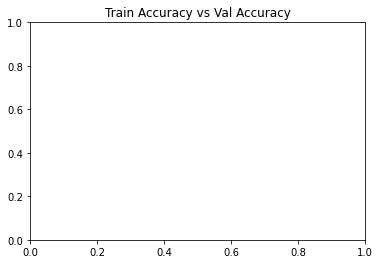

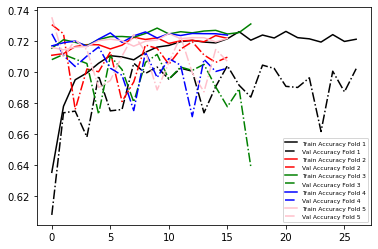

In [15]:
# ACCURACIES

plt.title('Train Accuracy vs Val Accuracy')
plt.show()
# fold 1
plt.show()
plt.plot(parallel_model_history[0].history['accuracy'], label='Train Accuracy Fold 1', color='black')
plt.plot(parallel_model_history[0].history['val_accuracy'], label='Val Accuracy Fold 1', color='black', linestyle="dashdot")
# fold 2
plt.plot(parallel_model_history[1].history['accuracy'], label='Train Accuracy Fold 2', color='red')
plt.plot(parallel_model_history[1].history['val_accuracy'], label='Val Accuracy Fold 2', color='red', linestyle="dashdot")
# fold 3
plt.plot(parallel_model_history[2].history['accuracy'], label='Train Accuracy Fold 3', color='green')
plt.plot(parallel_model_history[2].history['val_accuracy'], label='Val Accuracy Fold 3', color='green', linestyle="dashdot")
# fold 4
plt.plot(parallel_model_history[3].history['accuracy'], label='Train Accuracy Fold 4', color='blue')
plt.plot(parallel_model_history[3].history['val_accuracy'], label='Val Accuracy Fold 4', color='blue', linestyle="dashdot")
# fold 5
plt.plot(parallel_model_history[4].history['accuracy'], label='Train Accuracy Fold 5', color='pink')
plt.plot(parallel_model_history[4].history['val_accuracy'], label='Val Accuracy Fold 5', color='pink', linestyle="dashdot")
plt.legend(prop={'size': 6})
plt.savefig('MC_TL_acc.pdf')
plt.show()

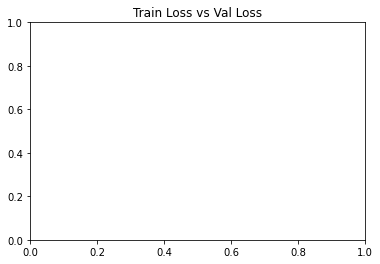

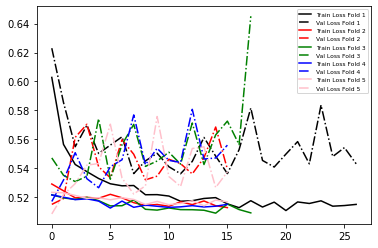

In [16]:
# LOSSES
plt.title('Train Loss vs Val Loss')
plt.show()
# fold 1
plt.show()
plt.plot(parallel_model_history[0].history['loss'], label='Train Loss Fold 1', color='black')
plt.plot(parallel_model_history[0].history['val_loss'], label='Val Loss Fold 1', color='black', linestyle="dashdot")
# fold 2
plt.plot(parallel_model_history[1].history['loss'], label='Train Loss Fold 2', color='red')
plt.plot(parallel_model_history[1].history['val_loss'], label='Val Loss Fold 2', color='red', linestyle="dashdot")
# fold 3
plt.plot(parallel_model_history[2].history['loss'], label='Train Loss Fold 3', color='green')
plt.plot(parallel_model_history[2].history['val_loss'], label='Val Loss Fold 3', color='green', linestyle="dashdot")
# fold 4
plt.plot(parallel_model_history[3].history['loss'], label='Train Loss Fold 4', color='blue')
plt.plot(parallel_model_history[3].history['val_loss'], label='Val Loss Fold 4', color='blue', linestyle="dashdot")
# fold 5
plt.plot(parallel_model_history[4].history['loss'], label='Train Loss Fold 5', color='pink')
plt.plot(parallel_model_history[4].history['val_loss'], label='Val Loss Fold 5', color='pink', linestyle="dashdot")
plt.legend(prop={'size': 6})
plt.savefig('MC_TL_loss.pdf')
plt.show()

In [17]:
def preprocess_test(path):
    img_size = (224, 224, 3)
    n_test = 6395
    test_images = np.zeros([n_test, img_size[0], img_size[1], img_size[2]], dtype=np.uint8)
    test_labels = np.zeros([n_test], dtype=np.uint8)
    i = 0

    all_folders = os.listdir(path)
    print(all_folders)
    for folder in all_folders:
        print(folder)
        for file in os.listdir('/home/ec2-user/SageMaker/Approach 3/test/{}'.format(folder)):
            img_path = os.path.join(path, folder + '/', file)
            print(img_path)
            img = load_img(img_path, target_size=(img_size[0], img_size[1]), color_mode='rgb')
            test_images[i] = img
            test_labels[i] = classes_dict[folder]
            print(test_labels)
            i += 1
            print(i)

    return test_images, test_labels

In [18]:
test_x, test_y = preprocess_test(test_dir)

['positive', 'negative']
positive
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_1721551.jpg
[1 0 0 ... 0 0 0]
1
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_16894784.jpg
[1 1 0 ... 0 0 0]
2
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_11281040.jpg
[1 1 1 ... 0 0 0]
3
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_25236872.jpg
[1 1 1 ... 0 0 0]
4
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_41655835.jpg
[1 1 1 ... 0 0 0]
5
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_51439.jpg
[1 1 1 ... 0 0 0]
6
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_8964320.jpg
[1 1 1 ... 0 0 0]
7
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_94559519.jpg
[1 1 1 ... 0 0 0]
8
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_81549796.jpg
[1 1 1 ... 0 0 0]
9
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_65112748.jpg
[1 1 1 ... 0 0 0]
10
/home/ec2-user/SageMaker/A

[1 1 1 ... 0 0 0]
176
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_36188560.jpg
[1 1 1 ... 0 0 0]
177
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_11503793.jpg
[1 1 1 ... 0 0 0]
178
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_6008295.jpg
[1 1 1 ... 0 0 0]
179
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_31668661.jpg
[1 1 1 ... 0 0 0]
180
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_29338334.jpg
[1 1 1 ... 0 0 0]
181
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_72320360.jpg
[1 1 1 ... 0 0 0]
182
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_76109223.jpg
[1 1 1 ... 0 0 0]
183
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_67177661.jpg
[1 1 1 ... 0 0 0]
184
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_21311296.jpg
[1 1 1 ... 0 0 0]
185
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_66651438.jpg
[1 1 1 ... 0 0 0]
186
/home/ec2-use

[1 1 1 ... 0 0 0]
290
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_83985015.jpg
[1 1 1 ... 0 0 0]
291
/home/ec2-user/SageMaker/Approach 3/test/positive/faces_12.4.jpg
[1 1 1 ... 0 0 0]
292
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_81433022.jpg
[1 1 1 ... 0 0 0]
293
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_69738419.jpg
[1 1 1 ... 0 0 0]
294
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_79401634.jpg
[1 1 1 ... 0 0 0]
295
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_62373679.jpg
[1 1 1 ... 0 0 0]
296
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_5600364.jpg
[1 1 1 ... 0 0 0]
297
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_45784121.jpg
[1 1 1 ... 0 0 0]
298
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_66337101.jpg
[1 1 1 ... 0 0 0]
299
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_71422115.jpg
[1 1 1 ... 0 0 0]
300
/home/ec2-user/SageMa

[1 1 1 ... 0 0 0]
396
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_37742296.jpg
[1 1 1 ... 0 0 0]
397
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_62399551.jpg
[1 1 1 ... 0 0 0]
398
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_81700311.jpg
[1 1 1 ... 0 0 0]
399
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_86444127.jpg
[1 1 1 ... 0 0 0]
400
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_91128943.jpg
[1 1 1 ... 0 0 0]
401
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_80906126.jpg
[1 1 1 ... 0 0 0]
402
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_68918593.jpg
[1 1 1 ... 0 0 0]
403
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_19825526.jpg
[1 1 1 ... 0 0 0]
404
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_82553712.jpg
[1 1 1 ... 0 0 0]
405
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_81689390.jpg
[1 1 1 ... 0 0 0]
406
/home/ec2-user/

[1 1 1 ... 0 0 0]
512
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_15146220.jpg
[1 1 1 ... 0 0 0]
513
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_19492189.jpg
[1 1 1 ... 0 0 0]
514
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_3564144.jpg
[1 1 1 ... 0 0 0]
515
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_30513151.jpg
[1 1 1 ... 0 0 0]
516
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_52634620.jpg
[1 1 1 ... 0 0 0]
517
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_14704134.jpg
[1 1 1 ... 0 0 0]
518
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_8091029.jpg
[1 1 1 ... 0 0 0]
519
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_68085838.jpg
[1 1 1 ... 0 0 0]
520
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_88221371.jpg
[1 1 1 ... 0 0 0]
521
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_38572832.jpg
[1 1 1 ... 0 0 0]
522
/home/ec2-user/

[1 1 1 ... 0 0 0]
598
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_71762673.jpg
[1 1 1 ... 0 0 0]
599
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_45144753.jpg
[1 1 1 ... 0 0 0]
600
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_9049242.jpg
[1 1 1 ... 0 0 0]
601
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_28388726.jpg
[1 1 1 ... 0 0 0]
602
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_51418951.jpg
[1 1 1 ... 0 0 0]
603
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_43360059.jpg
[1 1 1 ... 0 0 0]
604
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_3881907.jpg
[1 1 1 ... 0 0 0]
605
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_12208844.jpg
[1 1 1 ... 0 0 0]
606
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_30557630.jpg
[1 1 1 ... 0 0 0]
607
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_29873933.jpg
[1 1 1 ... 0 0 0]
608
/home/ec2-use

[1 1 1 ... 0 0 0]
691
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_14444813.jpg
[1 1 1 ... 0 0 0]
692
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_35073896.jpg
[1 1 1 ... 0 0 0]
693
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_23479421.jpg
[1 1 1 ... 0 0 0]
694
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_74596575.jpg
[1 1 1 ... 0 0 0]
695
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_96323620.jpg
[1 1 1 ... 0 0 0]
696
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_35952657.jpg
[1 1 1 ... 0 0 0]
697
/home/ec2-user/SageMaker/Approach 3/test/positive/BM29NES.JPG
[1 1 1 ... 0 0 0]
698
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_97376000.jpg
[1 1 1 ... 0 0 0]
699
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_18251492.jpg
[1 1 1 ... 0 0 0]
700
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_22024521.jpg
[1 1 1 ... 0 0 0]
701
/home/ec2-user/SageMaker/Ap

[1 1 1 ... 0 0 0]
865
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_92868884.jpg
[1 1 1 ... 0 0 0]
866
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_33571817.jpg
[1 1 1 ... 0 0 0]
867
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_66132334.jpg
[1 1 1 ... 0 0 0]
868
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_29642839.jpg
[1 1 1 ... 0 0 0]
869
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_66892564.jpg
[1 1 1 ... 0 0 0]
870
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_17864346.jpg
[1 1 1 ... 0 0 0]
871
/home/ec2-user/SageMaker/Approach 3/test/positive/Rafd090_32_Caucasian_female_happy_right.jpg
[1 1 1 ... 0 0 0]
872
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_58849515.jpg
[1 1 1 ... 0 0 0]
873
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_52264422.jpg
[1 1 1 ... 0 0 0]
874
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_16752382.jpg
[1 1 1 ... 0 0

[1 1 1 ... 0 0 0]
999
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_99849498.jpg
[1 1 1 ... 0 0 0]
1000
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_90974681.jpg
[1 1 1 ... 0 0 0]
1001
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_23631554.jpg
[1 1 1 ... 0 0 0]
1002
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_24407679.jpg
[1 1 1 ... 0 0 0]
1003
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_47631580.jpg
[1 1 1 ... 0 0 0]
1004
/home/ec2-user/SageMaker/Approach 3/test/positive/Cristina_Saralegui+KDEF_AM13NES.png
[1 1 1 ... 0 0 0]
1005
/home/ec2-user/SageMaker/Approach 3/test/positive/Rafd090_27_Caucasian_female_happy_frontal.jpg
[1 1 1 ... 0 0 0]
1006
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_11262548.jpg
[1 1 1 ... 0 0 0]
1007
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_4325988.jpg
[1 1 1 ... 0 0 0]
1008
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_793990

[1 1 1 ... 0 0 0]
1130
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_37003270.jpg
[1 1 1 ... 0 0 0]
1131
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_57005696.jpg
[1 1 1 ... 0 0 0]
1132
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_61728861.jpg
[1 1 1 ... 0 0 0]
1133
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_75856274.jpg
[1 1 1 ... 0 0 0]
1134
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_40041446.jpg
[1 1 1 ... 0 0 0]
1135
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_97619865.jpg
[1 1 1 ... 0 0 0]
1136
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_71760509.jpg
[1 1 1 ... 0 0 0]
1137
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_84572004.jpg
[1 1 1 ... 0 0 0]
1138
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_43093737.jpg
[1 1 1 ... 0 0 0]
1139
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_17105398.jpg
[1 1 1 ... 0 0 0]
1140

[1 1 1 ... 0 0 0]
1252
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_59102222.jpg
[1 1 1 ... 0 0 0]
1253
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_11939741.jpg
[1 1 1 ... 0 0 0]
1254
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_99626406.jpg
[1 1 1 ... 0 0 0]
1255
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_94303398.jpg
[1 1 1 ... 0 0 0]
1256
/home/ec2-user/SageMaker/Approach 3/test/positive/faces_5.4.jpg
[1 1 1 ... 0 0 0]
1257
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_37663840.jpg
[1 1 1 ... 0 0 0]
1258
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_79427116.jpg
[1 1 1 ... 0 0 0]
1259
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_63078236.jpg
[1 1 1 ... 0 0 0]
1260
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_39819887.jpg
[1 1 1 ... 0 0 0]
1261
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_62184911.jpg
[1 1 1 ... 0 0 0]
1262
/home/ec2-us

[1 1 1 ... 0 0 0]
1356
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_21141582.jpg
[1 1 1 ... 0 0 0]
1357
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_42875973.jpg
[1 1 1 ... 0 0 0]
1358
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_36699377.jpg
[1 1 1 ... 0 0 0]
1359
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_80833405.jpg
[1 1 1 ... 0 0 0]
1360
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_95357685.jpg
[1 1 1 ... 0 0 0]
1361
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_72335984.jpg
[1 1 1 ... 0 0 0]
1362
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_8174867.jpg
[1 1 1 ... 0 0 0]
1363
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_14365414.jpg
[1 1 1 ... 0 0 0]
1364
/home/ec2-user/SageMaker/Approach 3/test/positive/Rafd090_36_Caucasian_male_happy_right.jpg
[1 1 1 ... 0 0 0]
1365
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_33390774.jpg
[1 1 

[1 1 1 ... 0 0 0]
1468
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_93645615.jpg
[1 1 1 ... 0 0 0]
1469
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_56061331.jpg
[1 1 1 ... 0 0 0]
1470
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_91470334.jpg
[1 1 1 ... 0 0 0]
1471
/home/ec2-user/SageMaker/Approach 3/test/positive/Rafd135_65_Kid_female_neutral_right.jpg
[1 1 1 ... 0 0 0]
1472
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_73298203.jpg
[1 1 1 ... 0 0 0]
1473
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_53296753.jpg
[1 1 1 ... 0 0 0]
1474
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_77519151.jpg
[1 1 1 ... 0 0 0]
1475
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_64684639.jpg
[1 1 1 ... 0 0 0]
1476
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_78090705.jpg
[1 1 1 ... 0 0 0]
1477
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_88760955.jpg
[1 1 1 ..

[1 1 1 ... 0 0 0]
1620
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_38780269.jpg
[1 1 1 ... 0 0 0]
1621
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_60521672.jpg
[1 1 1 ... 0 0 0]
1622
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_70973642.jpg
[1 1 1 ... 0 0 0]
1623
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_92911055.jpg
[1 1 1 ... 0 0 0]
1624
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_31839947.jpg
[1 1 1 ... 0 0 0]
1625
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_24612063.jpg
[1 1 1 ... 0 0 0]
1626
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_58842420.jpg
[1 1 1 ... 0 0 0]
1627
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_6876358.jpg
[1 1 1 ... 0 0 0]
1628
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_1895428.jpg
[1 1 1 ... 0 0 0]
1629
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_57526339.jpg
[1 1 1 ... 0 0 0]
1630
/ho

[1 1 1 ... 0 0 0]
1709
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_83826586.jpg
[1 1 1 ... 0 0 0]
1710
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_47046591.jpg
[1 1 1 ... 0 0 0]
1711
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_45715095.jpg
[1 1 1 ... 0 0 0]
1712
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_43734039.jpg
[1 1 1 ... 0 0 0]
1713
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_98722467.jpg
[1 1 1 ... 0 0 0]
1714
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_89947622.jpg
[1 1 1 ... 0 0 0]
1715
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_17071390.jpg
[1 1 1 ... 0 0 0]
1716
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_82288545.jpg
[1 1 1 ... 0 0 0]
1717
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_87589012.jpg
[1 1 1 ... 0 0 0]
1718
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_59818994.jpg
[1 1 1 ... 0 0 0]
1719

[1 1 1 ... 0 0 0]
1892
/home/ec2-user/SageMaker/Approach 3/test/positive/Rafd090_14_Caucasian_female_happy_left.jpg
[1 1 1 ... 0 0 0]
1893
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_49758740.jpg
[1 1 1 ... 0 0 0]
1894
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_46912406.jpg
[1 1 1 ... 0 0 0]
1895
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_22397103.jpg
[1 1 1 ... 0 0 0]
1896
/home/ec2-user/SageMaker/Approach 3/test/positive/Candie_Kung+KDEF_AF17NES.png
[1 1 1 ... 0 0 0]
1897
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_82161877.jpg
[1 1 1 ... 0 0 0]
1898
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_77723397.jpg
[1 1 1 ... 0 0 0]
1899
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_95912665.jpg
[1 1 1 ... 0 0 0]
1900
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_84039346.jpg
[1 1 1 ... 0 0 0]
1901
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_74825222.jpg
[1

/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_74292053.jpg
[1 1 1 ... 0 0 0]
2073
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_28591237.jpg
[1 1 1 ... 0 0 0]
2074
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_98506083.jpg
[1 1 1 ... 0 0 0]
2075
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_26362776.jpg
[1 1 1 ... 0 0 0]
2076
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_87314736.jpg
[1 1 1 ... 0 0 0]
2077
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_89777490.jpg
[1 1 1 ... 0 0 0]
2078
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_37842132.jpg
[1 1 1 ... 0 0 0]
2079
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_11480715.jpg
[1 1 1 ... 0 0 0]
2080
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_32785534.jpg
[1 1 1 ... 0 0 0]
2081
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_95879410.jpg
[1 1 1 ... 0 0 0]
2082
/home/ec2-user/SageMaker/Ap

[1 1 1 ... 0 0 0]
2252
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_91724364.jpg
[1 1 1 ... 0 0 0]
2253
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_51894055.jpg
[1 1 1 ... 0 0 0]
2254
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_92514405.jpg
[1 1 1 ... 0 0 0]
2255
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_77267942.jpg
[1 1 1 ... 0 0 0]
2256
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_50540977.jpg
[1 1 1 ... 0 0 0]
2257
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_48951404.jpg
[1 1 1 ... 0 0 0]
2258
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_88480035.jpg
[1 1 1 ... 0 0 0]
2259
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_72738387.jpg
[1 1 1 ... 0 0 0]
2260
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_43059561.jpg
[1 1 1 ... 0 0 0]
2261
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_62426646.jpg
[1 1 1 ... 0 0 0]
2262

[1 1 1 ... 0 0 0]
2394
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_75809662.jpg
[1 1 1 ... 0 0 0]
2395
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_90324891.jpg
[1 1 1 ... 0 0 0]
2396
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_29716850.jpg
[1 1 1 ... 0 0 0]
2397
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_94261904.jpg
[1 1 1 ... 0 0 0]
2398
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_5186732.jpg
[1 1 1 ... 0 0 0]
2399
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_89496782.jpg
[1 1 1 ... 0 0 0]
2400
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_75889655.jpg
[1 1 1 ... 0 0 0]
2401
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_89522352.jpg
[1 1 1 ... 0 0 0]
2402
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_96351143.jpg
[1 1 1 ... 0 0 0]
2403
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_90773419.jpg
[1 1 1 ... 0 0 0]
2404
/h

[1 1 1 ... 0 0 0]
2485
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_21515821.jpg
[1 1 1 ... 0 0 0]
2486
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_40964978.jpg
[1 1 1 ... 0 0 0]
2487
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_8943009.jpg
[1 1 1 ... 0 0 0]
2488
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_23578691.jpg
[1 1 1 ... 0 0 0]
2489
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_2921450.jpg
[1 1 1 ... 0 0 0]
2490
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_99802225.jpg
[1 1 1 ... 0 0 0]
2491
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_40251698.jpg
[1 1 1 ... 0 0 0]
2492
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_85325911.jpg
[1 1 1 ... 0 0 0]
2493
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_89950479.jpg
[1 1 1 ... 0 0 0]
2494
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_5648996.jpg
[1 1 1 ... 0 0 0]
2495
/ho

[1 1 1 ... 0 0 0]
2596
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_52181196.jpg
[1 1 1 ... 0 0 0]
2597
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_15603414.jpg
[1 1 1 ... 0 0 0]
2598
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_14734177.jpg
[1 1 1 ... 0 0 0]
2599
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_71233422.jpg
[1 1 1 ... 0 0 0]
2600
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_71379924.jpg
[1 1 1 ... 0 0 0]
2601
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_81147127.jpg
[1 1 1 ... 0 0 0]
2602
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_18968304.jpg
[1 1 1 ... 0 0 0]
2603
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_76185285.jpg
[1 1 1 ... 0 0 0]
2604
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_2790951.jpg
[1 1 1 ... 0 0 0]
2605
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_64512674.jpg
[1 1 1 ... 0 0 0]
2606
/h

/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_22154496.jpg
[1 1 1 ... 0 0 0]
2744
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_29140052.jpg
[1 1 1 ... 0 0 0]
2745
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_8398615.jpg
[1 1 1 ... 0 0 0]
2746
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_31399969.jpg
[1 1 1 ... 0 0 0]
2747
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_99462811.jpg
[1 1 1 ... 0 0 0]
2748
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_65732845.jpg
[1 1 1 ... 0 0 0]
2749
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_99764146.jpg
[1 1 1 ... 0 0 0]
2750
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_91067995.jpg
[1 1 1 ... 0 0 0]
2751
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_22978039.jpg
[1 1 1 ... 0 0 0]
2752
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_81755073.jpg
[1 1 1 ... 0 0 0]
2753
/home/ec2-user/SageMaker/

[1 1 1 ... 0 0 0]
2846
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_10998240.jpg
[1 1 1 ... 0 0 0]
2847
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_83097075.jpg
[1 1 1 ... 0 0 0]
2848
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_13888087.jpg
[1 1 1 ... 0 0 0]
2849
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_86728952.jpg
[1 1 1 ... 0 0 0]
2850
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_91696872.jpg
[1 1 1 ... 0 0 0]
2851
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_2569530.jpg
[1 1 1 ... 0 0 0]
2852
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_54165289.jpg
[1 1 1 ... 0 0 0]
2853
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_29663397.jpg
[1 1 1 ... 0 0 0]
2854
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_98367611.jpg
[1 1 1 ... 0 0 0]
2855
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_99250082.jpg
[1 1 1 ... 0 0 0]
2856
/hom

[1 1 1 ... 0 0 0]
2965
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_57066855.jpg
[1 1 1 ... 0 0 0]
2966
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_17599960.jpg
[1 1 1 ... 0 0 0]
2967
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_76810954.jpg
[1 1 1 ... 0 0 0]
2968
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_93332316.jpg
[1 1 1 ... 0 0 0]
2969
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_1580581.jpg
[1 1 1 ... 0 0 0]
2970
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_6518376.jpg
[1 1 1 ... 0 0 0]
2971
/home/ec2-user/SageMaker/Approach 3/test/positive/PublicTest_29858208.jpg
[1 1 1 ... 0 0 0]
2972
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_64664253.jpg
[1 1 1 ... 0 0 0]
2973
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_40374609.jpg
[1 1 1 ... 0 0 0]
2974
/home/ec2-user/SageMaker/Approach 3/test/positive/PrivateTest_96415029.jpg
[1 1 1 ... 0 0 0]
2975
/h

[1 1 1 ... 0 0 0]
3050
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_68427103.jpg
[1 1 1 ... 0 0 0]
3051
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_82977464.jpg
[1 1 1 ... 0 0 0]
3052
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_60781650.jpg
[1 1 1 ... 0 0 0]
3053
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_42482040.jpg
[1 1 1 ... 0 0 0]
3054
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_29660027.jpg
[1 1 1 ... 0 0 0]
3055
/home/ec2-user/SageMaker/Approach 3/test/negative/Rafd090_07_Caucasian_male_fearful_frontal.jpg
[1 1 1 ... 0 0 0]
3056
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_36640748.jpg
[1 1 1 ... 0 0 0]
3057
/home/ec2-user/SageMaker/Approach 3/test/negative/UY.DI2.150.tiff
[1 1 1 ... 0 0 0]
3058
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_64229828.jpg
[1 1 1 ... 0 0 0]
3059
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_86483004.jpg
[1 1 1 ... 

[1 1 1 ... 0 0 0]
3188
/home/ec2-user/SageMaker/Approach 3/test/negative/Rafd090_51_Moroccan_male_disgusted_frontal.jpg
[1 1 1 ... 0 0 0]
3189
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_83776498.jpg
[1 1 1 ... 0 0 0]
3190
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_47244745.jpg
[1 1 1 ... 0 0 0]
3191
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_7577600.jpg
[1 1 1 ... 0 0 0]
3192
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_47096185.jpg
[1 1 1 ... 0 0 0]
3193
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_79830173.jpg
[1 1 1 ... 0 0 0]
3194
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_9116046.jpg
[1 1 1 ... 0 0 0]
3195
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_88420742.jpg
[1 1 1 ... 0 0 0]
3196
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_77928280.jpg
[1 1 1 ... 0 0 0]
3197
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_17923343.jpg
[1 1 1

[1 1 1 ... 0 0 0]
3321
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_84380648.jpg
[1 1 1 ... 0 0 0]
3322
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_43804431.jpg
[1 1 1 ... 0 0 0]
3323
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_20224413.jpg
[1 1 1 ... 0 0 0]
3324
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_36659344.jpg
[1 1 1 ... 0 0 0]
3325
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_76999798.jpg
[1 1 1 ... 0 0 0]
3326
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_71733747.jpg
[1 1 1 ... 0 0 0]
3327
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_84970524.jpg
[1 1 1 ... 0 0 0]
3328
/home/ec2-user/SageMaker/Approach 3/test/negative/Rafd045_22_Caucasian_female_angry_left - Copy.jpg
[1 1 1 ... 0 0 0]
3329
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_54239825.jpg
[1 1 1 ... 0 0 0]
3330
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_71457188.jpg
[

[1 1 1 ... 0 0 0]
3424
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_91502575.jpg
[1 1 1 ... 0 0 0]
3425
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_73462902.jpg
[1 1 1 ... 0 0 0]
3426
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_10247676.jpg
[1 1 1 ... 0 0 0]
3427
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_65657538.jpg
[1 1 1 ... 0 0 0]
3428
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_8089222.jpg
[1 1 1 ... 0 0 0]
3429
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_23751697.jpg
[1 1 1 ... 0 0 0]
3430
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_23248169.jpg
[1 1 1 ... 0 0 0]
3431
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_93505568.jpg
[1 1 1 ... 0 0 0]
3432
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_46533021.jpg
[1 1 1 ... 0 0 0]
3433
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_93235151.jpg
[1 1 1 ... 0 0 0]
3434
/ho

[1 1 1 ... 0 0 0]
3521
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_98810281.jpg
[1 1 1 ... 0 0 0]
3522
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_76242706.jpg
[1 1 1 ... 0 0 0]
3523
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_89884834.jpg
[1 1 1 ... 0 0 0]
3524
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_91336201.jpg
[1 1 1 ... 0 0 0]
3525
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_79260979.jpg
[1 1 1 ... 0 0 0]
3526
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_98143629.jpg
[1 1 1 ... 0 0 0]
3527
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_91481838.jpg
[1 1 1 ... 0 0 0]
3528
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_65696296.jpg
[1 1 1 ... 0 0 0]
3529
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_57154065.jpg
[1 1 1 ... 0 0 0]
3530
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_29755784.jpg
[1 1 1 ... 0 0 0]
3531
/ho

[1 1 1 ... 0 0 0]
3658
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_47601588.jpg
[1 1 1 ... 0 0 0]
3659
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_61495817.jpg
[1 1 1 ... 0 0 0]
3660
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_9227570.jpg
[1 1 1 ... 0 0 0]
3661
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_23975491.jpg
[1 1 1 ... 0 0 0]
3662
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_60467387.jpg
[1 1 1 ... 0 0 0]
3663
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_91000842.jpg
[1 1 1 ... 0 0 0]
3664
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_28336133.jpg
[1 1 1 ... 0 0 0]
3665
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_46006300.jpg
[1 1 1 ... 0 0 0]
3666
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_99757533.jpg
[1 1 1 ... 0 0 0]
3667
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_42711133.jpg
[1 1 1 ... 0 0 0]
3668
/home/

[1 1 1 ... 0 0 0]
3780
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_86498201.jpg
[1 1 1 ... 0 0 0]
3781
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_15348300.jpg
[1 1 1 ... 0 0 0]
3782
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_54325763.jpg
[1 1 1 ... 0 0 0]
3783
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_6998820.jpg
[1 1 1 ... 0 0 0]
3784
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_33267203.jpg
[1 1 1 ... 0 0 0]
3785
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_89077668.jpg
[1 1 1 ... 0 0 0]
3786
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_97520714.jpg
[1 1 1 ... 0 0 0]
3787
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_32923630.jpg
[1 1 1 ... 0 0 0]
3788
/home/ec2-user/SageMaker/Approach 3/test/negative/Rafd045_52_Moroccan_male_disgusted_frontal.jpg
[1 1 1 ... 0 0 0]
3789
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_28415725.jpg
[1 1 1 

[1 1 1 ... 0 0 0]
3956
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_89771874.jpg
[1 1 1 ... 0 0 0]
3957
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_2212492.jpg
[1 1 1 ... 0 0 0]
3958
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_37810242.jpg
[1 1 1 ... 0 0 0]
3959
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_71769170.jpg
[1 1 1 ... 0 0 0]
3960
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_96885227.jpg
[1 1 1 ... 0 0 0]
3961
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_8276334.jpg
[1 1 1 ... 0 0 0]
3962
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_18682426.jpg
[1 1 1 ... 0 0 0]
3963
/home/ec2-user/SageMaker/Approach 3/test/negative/faces_10.3.jpg
[1 1 1 ... 0 0 0]
3964
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_2326190.jpg
[1 1 1 ... 0 0 0]
3965
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_96199564.jpg
[1 1 1 ... 0 0 0]
3966
/home/ec2-user/

[1 1 1 ... 0 0 0]
4052
/home/ec2-user/SageMaker/Approach 3/test/negative/UY.AN2.147.tiff
[1 1 1 ... 0 0 0]
4053
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_66494063.jpg
[1 1 1 ... 0 0 0]
4054
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_33408688.jpg
[1 1 1 ... 0 0 0]
4055
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_17560953.jpg
[1 1 1 ... 0 0 0]
4056
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_39135751.jpg
[1 1 1 ... 0 0 0]
4057
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_34725898.jpg
[1 1 1 ... 0 0 0]
4058
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_30164595.jpg
[1 1 1 ... 0 0 0]
4059
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_99743122.jpg
[1 1 1 ... 0 0 0]
4060
/home/ec2-user/SageMaker/Approach 3/test/negative/Rafd045_29_Moroccan_male_angry_left - Copy.jpg
[1 1 1 ... 0 0 0]
4061
/home/ec2-user/SageMaker/Approach 3/test/negative/MK.FE2.132.tiff
[1 1 1 ... 0 0 0]
406

[1 1 1 ... 0 0 0]
4136
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_54158185.jpg
[1 1 1 ... 0 0 0]
4137
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_45742840.jpg
[1 1 1 ... 0 0 0]
4138
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_59458907.jpg
[1 1 1 ... 0 0 0]
4139
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_99116679.jpg
[1 1 1 ... 0 0 0]
4140
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_36935160.jpg
[1 1 1 ... 0 0 0]
4141
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_35627075.jpg
[1 1 1 ... 0 0 0]
4142
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_63017102.jpg
[1 1 1 ... 0 0 0]
4143
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_69293811.jpg
[1 1 1 ... 0 0 0]
4144
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_47502306.jpg
[1 1 1 ... 0 0 0]
4145
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_59509827.jpg
[1 1 1 ... 0 0 0]
4146
/hom

[1 1 1 ... 0 0 0]
4231
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_92907981.jpg
[1 1 1 ... 0 0 0]
4232
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_24550940.jpg
[1 1 1 ... 0 0 0]
4233
/home/ec2-user/SageMaker/Approach 3/test/negative/Rafd090_52_Moroccan_male_disgusted_right.jpg
[1 1 1 ... 0 0 0]
4234
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_41813428.jpg
[1 1 1 ... 0 0 0]
4235
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_31565397.jpg
[1 1 1 ... 0 0 0]
4236
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_36147518.jpg
[1 1 1 ... 0 0 0]
4237
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_36424712.jpg
[1 1 1 ... 0 0 0]
4238
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_80310868.jpg
[1 1 1 ... 0 0 0]
4239
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_91618618.jpg
[1 1 1 ... 0 0 0]
4240
/home/ec2-user/SageMaker/Approach 3/test/negative/KL.FE2.175.tiff
[1 1 1 ..

[1 1 1 ... 0 0 0]
4346
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_52177909.jpg
[1 1 1 ... 0 0 0]
4347
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_20464211.jpg
[1 1 1 ... 0 0 0]
4348
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_55564530.jpg
[1 1 1 ... 0 0 0]
4349
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_14883248.jpg
[1 1 1 ... 0 0 0]
4350
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_36830391.jpg
[1 1 1 ... 0 0 0]
4351
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_74487623.jpg
[1 1 1 ... 0 0 0]
4352
/home/ec2-user/SageMaker/Approach 3/test/negative/BM17SAHR.JPG
[1 1 1 ... 0 0 0]
4353
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_66344219.jpg
[1 1 1 ... 0 0 0]
4354
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_79462333.jpg
[1 1 1 ... 0 0 0]
4355
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_33585800.jpg
[1 1 1 ... 0 0 0]
4356
/home/ec2-us

[1 1 1 ... 0 0 0]
4435
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_43997808.jpg
[1 1 1 ... 0 0 0]
4436
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_42381351.jpg
[1 1 1 ... 0 0 0]
4437
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_67261410.jpg
[1 1 1 ... 0 0 0]
4438
/home/ec2-user/SageMaker/Approach 3/test/negative/YM.AN1.61.tiff
[1 1 1 ... 0 0 0]
4439
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_81239026.jpg
[1 1 1 ... 0 0 0]
4440
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_18509921.jpg
[1 1 1 ... 0 0 0]
4441
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_2311869.jpg
[1 1 1 ... 0 0 0]
4442
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_4263322.jpg
[1 1 1 ... 0 0 0]
4443
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_72420658.jpg
[1 1 1 ... 0 0 0]
4444
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_53979011.jpg
[1 1 1 ... 0 0 0]
4445
/home/ec2-user/

[1 1 1 ... 0 0 0]
4552
/home/ec2-user/SageMaker/Approach 3/test/negative/NA.AN3.213.tiff
[1 1 1 ... 0 0 0]
4553
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_6035852.jpg
[1 1 1 ... 0 0 0]
4554
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_14029039.jpg
[1 1 1 ... 0 0 0]
4555
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_40423206.jpg
[1 1 1 ... 0 0 0]
4556
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_4791295.jpg
[1 1 1 ... 0 0 0]
4557
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_12008383.jpg
[1 1 1 ... 0 0 0]
4558
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_88038124.jpg
[1 1 1 ... 0 0 0]
4559
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_84583336.jpg
[1 1 1 ... 0 0 0]
4560
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_96057304.jpg
[1 1 1 ... 0 0 0]
4561
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_88910113.jpg
[1 1 1 ... 0 0 0]
4562
/home/ec2-us

[1 1 1 ... 0 0 0]
4681
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_44233912.jpg
[1 1 1 ... 0 0 0]
4682
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_8892314.jpg
[1 1 1 ... 0 0 0]
4683
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_45792830.jpg
[1 1 1 ... 0 0 0]
4684
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_20887918.jpg
[1 1 1 ... 0 0 0]
4685
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_11015881.jpg
[1 1 1 ... 0 0 0]
4686
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_1414350.jpg
[1 1 1 ... 0 0 0]
4687
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_23835267.jpg
[1 1 1 ... 0 0 0]
4688
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_63836308.jpg
[1 1 1 ... 0 0 0]
4689
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_50859184.jpg
[1 1 1 ... 0 0 0]
4690
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_64803509.jpg
[1 1 1 ... 0 0 0]
4691
/hom

[1 1 1 ... 0 0 0]
4783
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_28892368.jpg
[1 1 1 ... 0 0 0]
4784
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_92653992.jpg
[1 1 1 ... 0 0 0]
4785
/home/ec2-user/SageMaker/Approach 3/test/negative/Cristina_Saralegui+KDEF_AF28ANS.png
[1 1 1 ... 0 0 0]
4786
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_98025862.jpg
[1 1 1 ... 0 0 0]
4787
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_87767900.jpg
[1 1 1 ... 0 0 0]
4788
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_68625027.jpg
[1 1 1 ... 0 0 0]
4789
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_78701123.jpg
[1 1 1 ... 0 0 0]
4790
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_89849264.jpg
[1 1 1 ... 0 0 0]
4791
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_46420872.jpg
[1 1 1 ... 0 0 0]
4792
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_76316786.jpg
[1 1 1 ...

/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_36469706.jpg
[1 1 1 ... 0 0 0]
4930
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_19679720.jpg
[1 1 1 ... 0 0 0]
4931
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_28144831.jpg
[1 1 1 ... 0 0 0]
4932
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_31058193.jpg
[1 1 1 ... 0 0 0]
4933
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_15498246.jpg
[1 1 1 ... 0 0 0]
4934
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_52601919.jpg
[1 1 1 ... 0 0 0]
4935
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_81069536.jpg
[1 1 1 ... 0 0 0]
4936
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_42755313.jpg
[1 1 1 ... 0 0 0]
4937
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_26441514.jpg
[1 1 1 ... 0 0 0]
4938
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_34426922.jpg
[1 1 1 ... 0 0 0]
4939
/home/ec2-user/SageMaker/A

[1 1 1 ... 0 0 0]
5016
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_70410925.jpg
[1 1 1 ... 0 0 0]
5017
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_34526396.jpg
[1 1 1 ... 0 0 0]
5018
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_18802845.jpg
[1 1 1 ... 0 0 0]
5019
/home/ec2-user/SageMaker/Approach 3/test/negative/Rafd045_58_Caucasian_female_angry_right.jpg
[1 1 1 ... 0 0 0]
5020
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_2918667.jpg
[1 1 1 ... 0 0 0]
5021
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_77142981.jpg
[1 1 1 ... 0 0 0]
5022
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_28203384.jpg
[1 1 1 ... 0 0 0]
5023
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_55949412.jpg
[1 1 1 ... 0 0 0]
5024
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_33469617.jpg
[1 1 1 ... 0 0 0]
5025
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_75763309.jpg
[1 1 1

[1 1 1 ... 0 0 0]
5136
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_35030861.jpg
[1 1 1 ... 0 0 0]
5137
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_45083333.jpg
[1 1 1 ... 0 0 0]
5138
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_76233862.jpg
[1 1 1 ... 0 0 0]
5139
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_31013095.jpg
[1 1 1 ... 0 0 0]
5140
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_24599099.jpg
[1 1 1 ... 0 0 0]
5141
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_46931060.jpg
[1 1 1 ... 0 0 0]
5142
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_53140409.jpg
[1 1 1 ... 0 0 0]
5143
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_5798618.jpg
[1 1 1 ... 0 0 0]
5144
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_79887521.jpg
[1 1 1 ... 0 0 0]
5145
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_13843698.jpg
[1 1 1 ... 0 0 0]
5146
/h

[1 1 1 ... 0 0 0]
5274
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_62630976.jpg
[1 1 1 ... 0 0 0]
5275
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_71924149.jpg
[1 1 1 ... 0 0 0]
5276
/home/ec2-user/SageMaker/Approach 3/test/negative/Candie_Kung+KDEF_BF08DIS.png
[1 1 1 ... 0 0 0]
5277
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_42117104.jpg
[1 1 1 ... 0 0 0]
5278
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_71943432.jpg
[1 1 1 ... 0 0 0]
5279
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_46821137.jpg
[1 1 1 ... 0 0 0]
5280
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_13434826.jpg
[1 1 1 ... 0 0 0]
5281
/home/ec2-user/SageMaker/Approach 3/test/negative/Candie_Kung+KDEF_BF14DIS.png
[1 1 1 ... 0 0 0]
5282
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_24586863.jpg
[1 1 1 ... 0 0 0]
5283
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_32322308.jpg
[1 1 1 ... 0 0 0

/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_50055739.jpg
[1 1 1 ... 0 0 0]
5447
/home/ec2-user/SageMaker/Approach 3/test/negative/Rafd045_43_Kid_female_sad_right.jpg
[1 1 1 ... 0 0 0]
5448
/home/ec2-user/SageMaker/Approach 3/test/negative/Rafd090_08_Caucasian_female_sad_left.jpg
[1 1 1 ... 0 0 0]
5449
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_50175956.jpg
[1 1 1 ... 0 0 0]
5450
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_91459478.jpg
[1 1 1 ... 0 0 0]
5451
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_49962615.jpg
[1 1 1 ... 0 0 0]
5452
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_1701224.jpg
[1 1 1 ... 0 0 0]
5453
/home/ec2-user/SageMaker/Approach 3/test/negative/AF29ANS.JPG
[1 1 1 ... 0 0 0]
5454
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_43202166.jpg
[1 1 1 ... 0 0 0]
5455
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_54736675.jpg
[1 1 1 ... 0 0 0]
5456
/home/ec2-use

[1 1 1 ... 0 0 0]
5586
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_18131739.jpg
[1 1 1 ... 0 0 0]
5587
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_56379288.jpg
[1 1 1 ... 0 0 0]
5588
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_80832037.jpg
[1 1 1 ... 0 0 0]
5589
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_77365224.jpg
[1 1 1 ... 0 0 0]
5590
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_69698407.jpg
[1 1 1 ... 0 0 0]
5591
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_64496362.jpg
[1 1 1 ... 0 0 0]
5592
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_82700651.jpg
[1 1 1 ... 0 0 0]
5593
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_70796670.jpg
[1 1 1 ... 0 0 0]
5594
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_3787629.jpg
[1 1 1 ... 0 0 0]
5595
/home/ec2-user/SageMaker/Approach 3/test/negative/Rafd090_01_Caucasian_female_fearful_right.jpg
[1 1 1

[1 1 1 ... 0 0 0]
5699
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_74674322.jpg
[1 1 1 ... 0 0 0]
5700
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_79892729.jpg
[1 1 1 ... 0 0 0]
5701
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_4129990.jpg
[1 1 1 ... 0 0 0]
5702
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_73918107.jpg
[1 1 1 ... 0 0 0]
5703
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_73408654.jpg
[1 1 1 ... 0 0 0]
5704
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_63119077.jpg
[1 1 1 ... 0 0 0]
5705
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_34922989.jpg
[1 1 1 ... 0 0 0]
5706
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_79694110.jpg
[1 1 1 ... 0 0 0]
5707
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_99123958.jpg
[1 1 1 ... 0 0 0]
5708
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_69589440.jpg
[1 1 1 ... 0 0 0]
5709
/ho

[1 1 1 ... 0 0 0]
5833
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_376099.jpg
[1 1 1 ... 0 0 0]
5834
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_81420955.jpg
[1 1 1 ... 0 0 0]
5835
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_13317897.jpg
[1 1 1 ... 0 0 0]
5836
/home/ec2-user/SageMaker/Approach 3/test/negative/BM35ANS.JPG
[1 1 1 ... 0 0 0]
5837
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_22003953.jpg
[1 1 1 ... 0 0 0]
5838
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_5341847.jpg
[1 1 1 ... 0 0 0]
5839
/home/ec2-user/SageMaker/Approach 3/test/negative/72_6.jpg
[1 1 1 ... 0 0 0]
5840
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_86177043.jpg
[1 1 1 ... 0 0 0]
5841
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_55505039.jpg
[1 1 1 ... 0 0 0]
5842
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_30137315.jpg
[1 1 1 ... 0 0 0]
5843
/home/ec2-user/SageMaker/Approach

/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_39274805.jpg
[1 1 1 ... 0 0 0]
5955
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_3344932.jpg
[1 1 1 ... 0 0 0]
5956
/home/ec2-user/SageMaker/Approach 3/test/negative/Candie_Kung+KDEF_BF18DIS.png
[1 1 1 ... 0 0 0]
5957
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_15987805.jpg
[1 1 1 ... 0 0 0]
5958
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_92794448.jpg
[1 1 1 ... 0 0 0]
5959
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_29191497.jpg
[1 1 1 ... 0 0 0]
5960
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_64927607.jpg
[1 1 1 ... 0 0 0]
5961
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_52543058.jpg
[1 1 1 ... 0 0 0]
5962
/home/ec2-user/SageMaker/Approach 3/test/negative/Rafd090_37_Caucasian_female_angry_right.jpg
[1 1 1 ... 0 0 0]
5963
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_25295850.jpg
[1 1 1 ... 0 0 0]
5964
/h

[1 1 1 ... 0 0 0]
6096
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_76755224.jpg
[1 1 1 ... 0 0 0]
6097
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_98429108.jpg
[1 1 1 ... 0 0 0]
6098
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_43785810.jpg
[1 1 1 ... 0 0 0]
6099
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_1769758.jpg
[1 1 1 ... 0 0 0]
6100
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_1373732.jpg
[1 1 1 ... 0 0 0]
6101
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_4536412.jpg
[1 1 1 ... 0 0 0]
6102
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_44751991.jpg
[1 1 1 ... 0 0 0]
6103
/home/ec2-user/SageMaker/Approach 3/test/negative/AM17AFS.JPG
[1 1 1 ... 0 0 0]
6104
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_45820414.jpg
[1 1 1 ... 0 0 0]
6105
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_96048916.jpg
[1 1 1 ... 0 0 0]
6106
/home/ec2-user/Sa

[1 1 1 ... 0 0 0]
6227
/home/ec2-user/SageMaker/Approach 3/test/negative/Rafd090_10_Caucasian_male_disgusted_frontal.jpg
[1 1 1 ... 0 0 0]
6228
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_36374107.jpg
[1 1 1 ... 0 0 0]
6229
/home/ec2-user/SageMaker/Approach 3/test/negative/Rafd045_51_Moroccan_male_disgusted_left.jpg
[1 1 1 ... 0 0 0]
6230
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_59128405.jpg
[1 1 1 ... 0 0 0]
6231
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_91377915.jpg
[1 1 1 ... 0 0 0]
6232
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_73664955.jpg
[1 1 1 ... 0 0 0]
6233
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_88816412.jpg
[1 1 1 ... 0 0 0]
6234
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_95750691.jpg
[1 1 1 ... 0 0 0]
6235
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_92202830.jpg
[1 1 1 ... 0 0 0]
6236
/home/ec2-user/SageMaker/Approach 3/test/negative/Privat

/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_14740105.jpg
[1 1 1 ... 0 0 0]
6326
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_47434180.jpg
[1 1 1 ... 0 0 0]
6327
/home/ec2-user/SageMaker/Approach 3/test/negative/Candie_Kung+KDEF_AF27AFS.png
[1 1 1 ... 0 0 0]
6328
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_33237326.jpg
[1 1 1 ... 0 0 0]
6329
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_53931951.jpg
[1 1 1 ... 0 0 0]
6330
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_88792453.jpg
[1 1 1 ... 0 0 0]
6331
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_36329908.jpg
[1 1 1 ... 0 0 0]
6332
/home/ec2-user/SageMaker/Approach 3/test/negative/Candie_Kung+KDEF_AM08SAS.png
[1 1 1 ... 0 0 0]
6333
/home/ec2-user/SageMaker/Approach 3/test/negative/PrivateTest_84635755.jpg
[1 1 1 ... 0 0 0]
6334
/home/ec2-user/SageMaker/Approach 3/test/negative/PublicTest_52439734.jpg
[1 1 1 ... 0 0 0]
6335
/home/ec2-user

In [19]:
test_cat_y = to_categorical(test_y)

In [20]:
from tensorflow.keras.models import load_model
model = load_model('models/MC_TL.h5')

In [21]:
preds = model.predict(test_x)

In [22]:
#confusion matrix
y_pred = np.argmax(preds, axis=1)
print(y_pred)

[0 1 0 ... 0 0 0]


tf.Tensor(
[[2447  921]
 [1231 1796]], shape=(2, 2), dtype=int32)


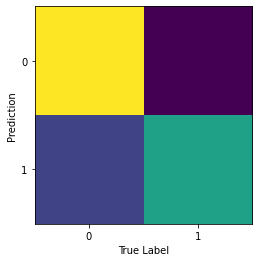

In [23]:
c_matrix = tensorflow.math.confusion_matrix(test_y, y_pred, num_classes=2)
print(c_matrix)
plt.imshow(c_matrix)
plt.xlabel('True Label')
plt.xticks(np.arange(2), [x for x in range(0, 2)])
plt.ylabel('Prediction')
plt.yticks(np.arange(2), [x for x in range(0, 2)])
plt.savefig('MC_TL_CM.pdf')
plt.show()

In [24]:
scores = model.evaluate(test_x, test_cat_y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]))

accuracy: 66.35%
loss: 0.63%
